In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
party_colors = {
    'SPD': 'tab:red',
    'CDU': 'black',
    'AfD': 'tab:blue',
    'FDP': 'gold',
    'Bündnis 90/Die Grünen': 'tab:green',
    'Die Linke': 'tab:purple',
    'CSU': 'tab:cyan',
    'Fraktionslos': 'tab:gray'
}

number_of_top_hashtags = 5
number_of_hashtags_per_party = 5

start_end_date = [['01/1/2020','01/31/2020'],
                  ['02/1/2020', '02/29/2020'],
                  ['03/1/2020', '03/31/2020'],
                  ['04/1/2020', '04/30/2020'],
                  ['05/1/2020', '05/31/2020'],
                  ['06/1/2020', '06/30/2020'],
                  ['07/1/2020', '07/31/2020'],
                  ['08/1/2020', '08/31/2020'],
                  ['09/1/2020', '09/30/2020'],
                  ['10/1/2020', '10/31/2020'],
                  ['11/1/2020', '11/30/2020'],
                  ['12/1/2020', '12/31/2020'],]
                
heidenelkenrot = '#9C004B'
df_hashtags = pd.read_csv('all_tweets/hashtags_all_tweets.csv')
df = pd.DataFrame(df_hashtags)

def get_plot(data, dates):
    plt.figure(figsize=(25,8))
    sns.barplot(data.index, data.values, alpha=0.8, color=heidenelkenrot)
    plt.title(f'Top {number_of_top_hashtags} Hashtags ({dates[0]} - {dates[1]})', fontsize=18)
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Hashtags', fontsize=17)
    plt.tick_params(labelsize=17)

def get_plot_parties(data, dates):
    fig, ax = plt.subplots(figsize=(25,8))
    sns.barplot(x='hashtag', y='count', hue='party', data=data, palette=party_colors)
    plt.title(f'Top {number_of_hashtags_per_party} Hashtags ({dates[0]} - {dates[1]})', fontsize=18)
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Hashtags', fontsize=17)
    plt.tick_params(labelsize=17)
    plt.show()


def plot_for_appendix(data):
    plt.subplots(figsize=(25,8))
    sns.barplot(x='hashtag', y='count', hue='party', data=data, palette=party_colors)
    plt.ylabel('Number of Tweets', fontsize=22)
    plt.xlabel('', fontsize=2)
    plt.tick_params(axis='y', labelsize=19)
    plt.tick_params(axis='x', labelsize=24)
    legend = plt.legend(prop={'size': 19})
    legend.get_texts()[1].set_text('Die Grünen')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(False)
    sns.set_theme(style='whitegrid')
    return plt

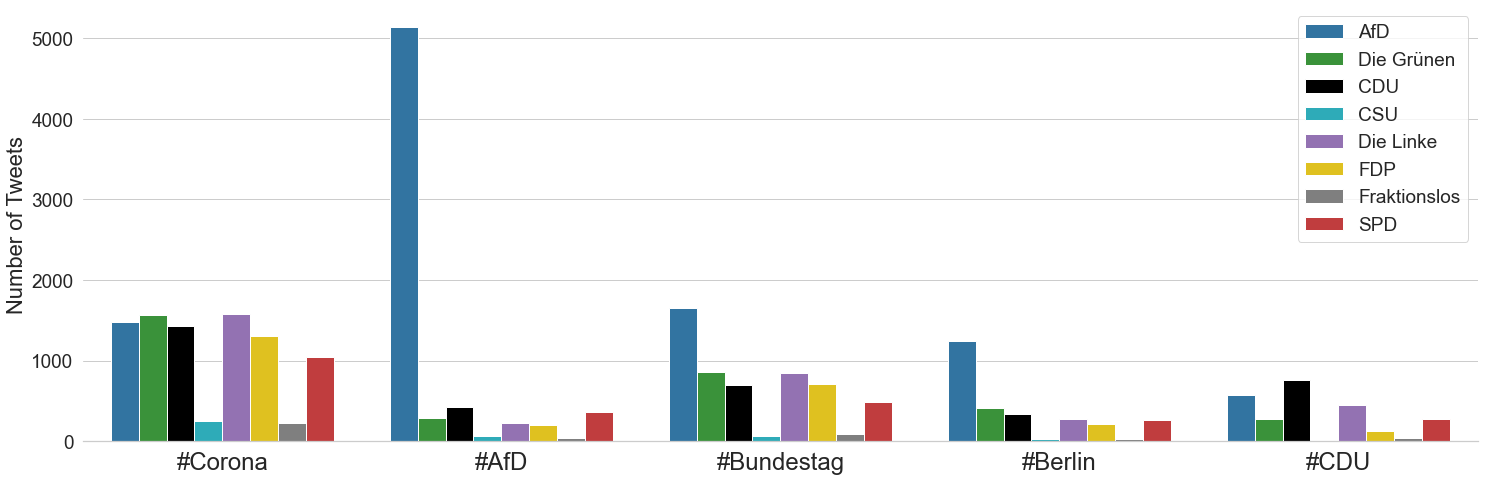

In [41]:
# Top Hashtags used by party whole year

df_copy = df_hashtags.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'screen_name', 'name', 'date'], axis='columns')
top_hashtags = ((df_copy['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)).index.to_list()
df_relevant_columns = df_copy.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
plt = plot_for_appendix(data_top_hashtags)
plt.show()

318554
#Corona         8884
#AfD            6736
#Bundestag      5417
#Berlin         2817
#CDU            2519
#Coronakrise    2413
#EU             2367
#COVID19        2265
#SPD            2222
#Merkel         1855
Name: hashtag, dtype: int64


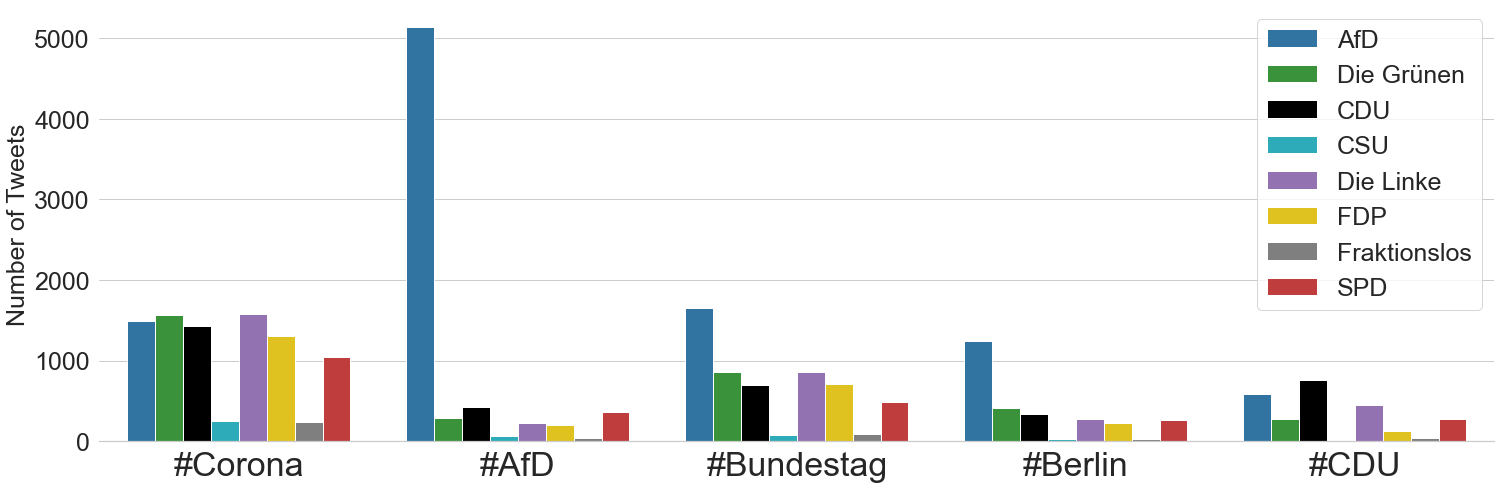

In [10]:
# Top Hashtags used by party whole year for small image

df_copy = df_hashtags.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'screen_name', 'name', 'date'], axis='columns')
print(df_copy.shape[0])
print(((df_copy['hashtag'].value_counts(sort=True, ascending=False)).head(10)))
top_hashtags = ((df_copy['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)).index.to_list()
df_relevant_columns = df_copy.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(x='hashtag', y='count', hue='party', data=data_top_hashtags, palette=party_colors)
#plt.title(f'Top {number_of_top_hashtags} Hashtags in 2020 per party', fontsize=25)
plt.ylabel('Number of Tweets', fontsize=25)
plt.xlabel('', fontsize=2)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=34)
legend = plt.legend(prop={'size': 25})
legend.get_texts()[1].set_text('Die Grünen')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(False)
sns.set_theme(style='whitegrid')
plt.show()


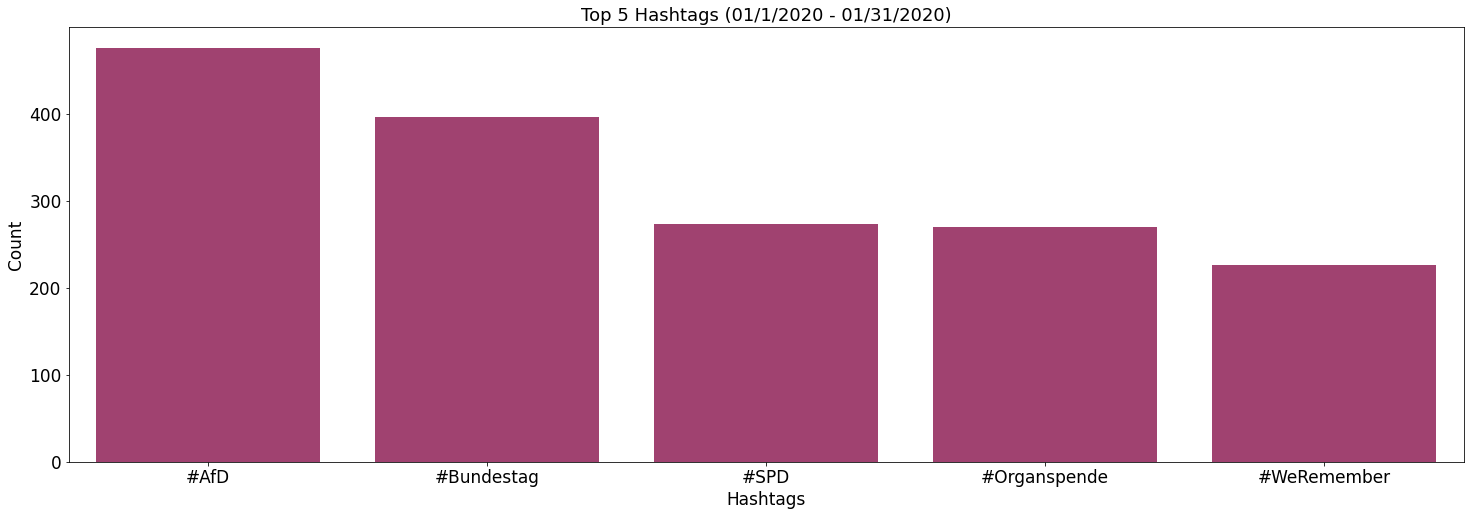

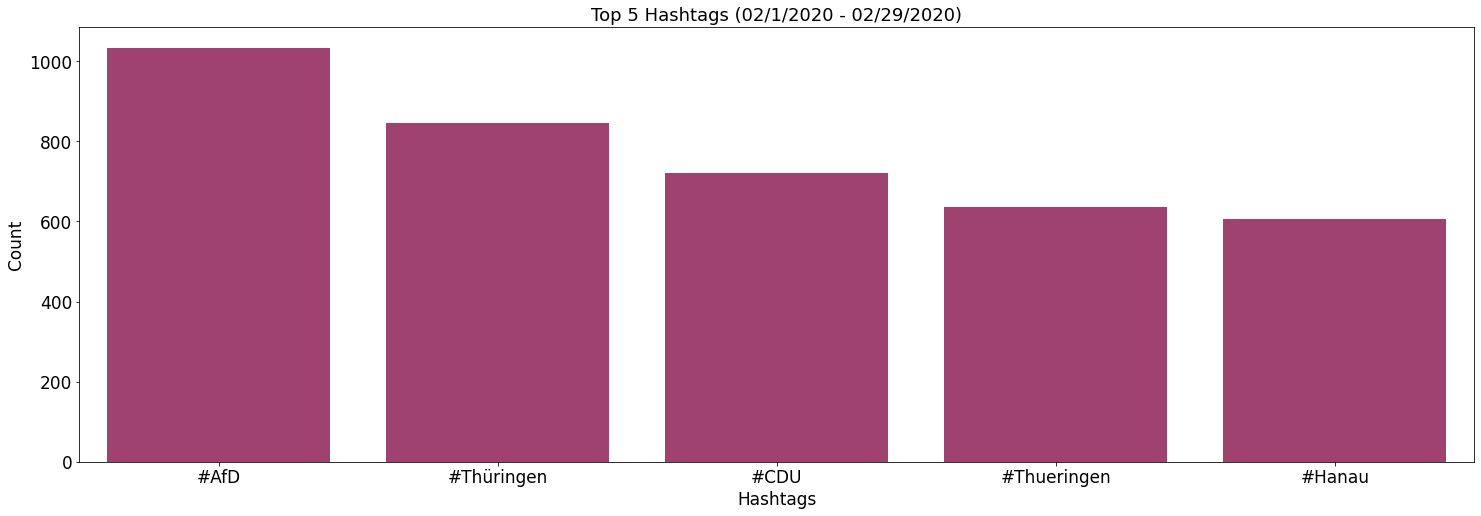

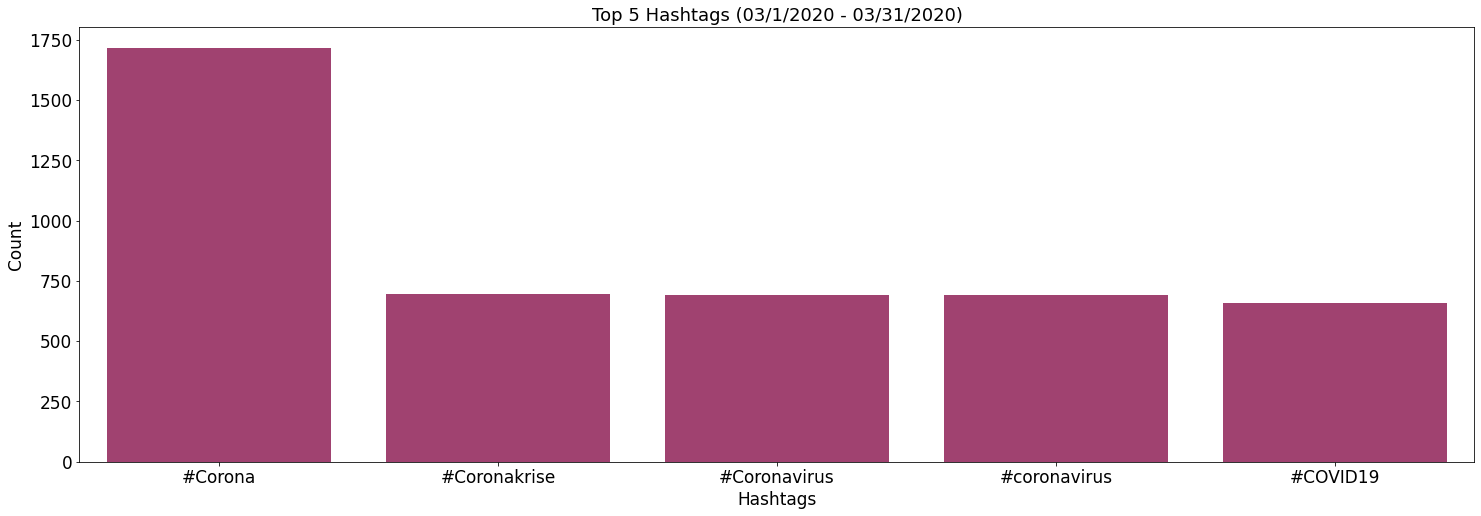

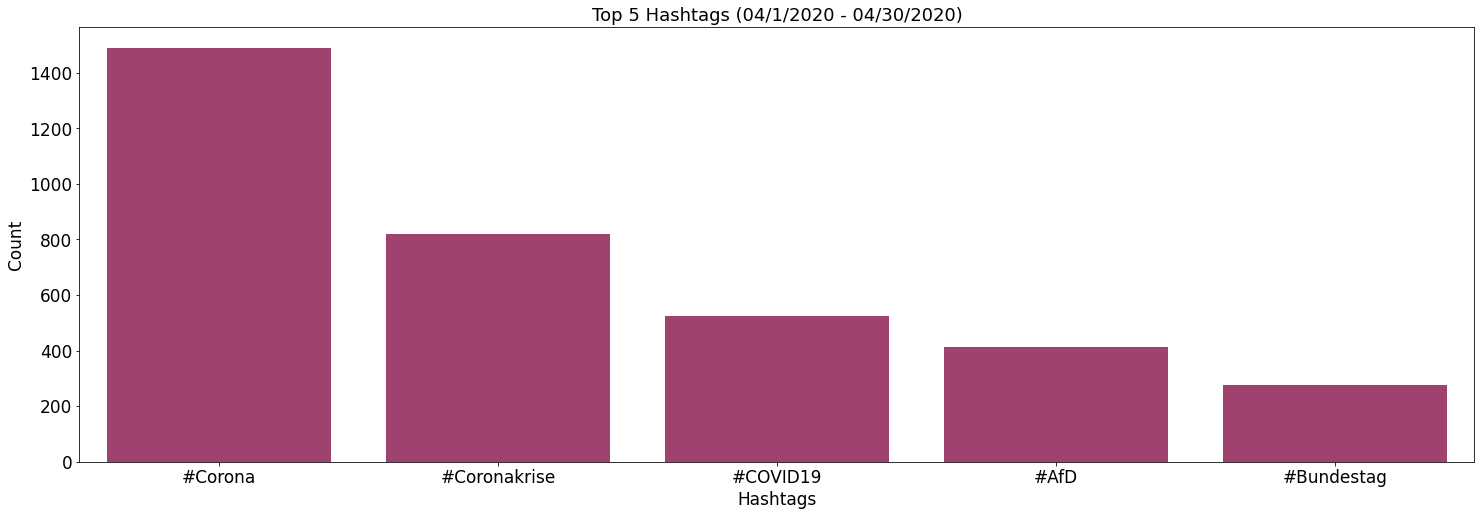

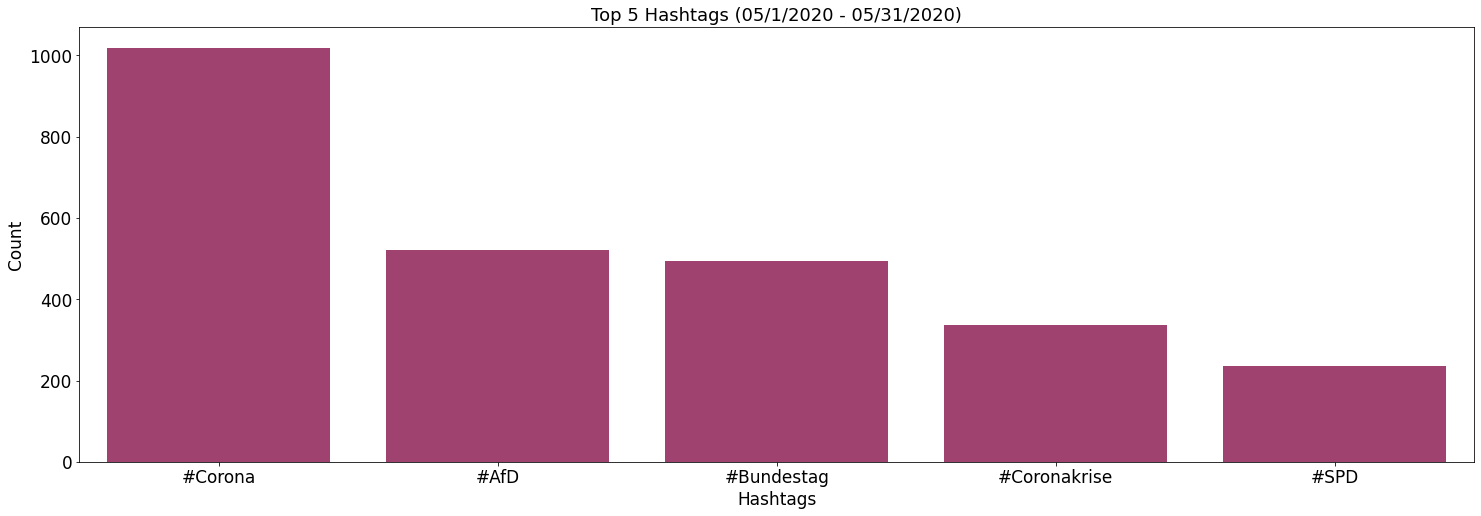

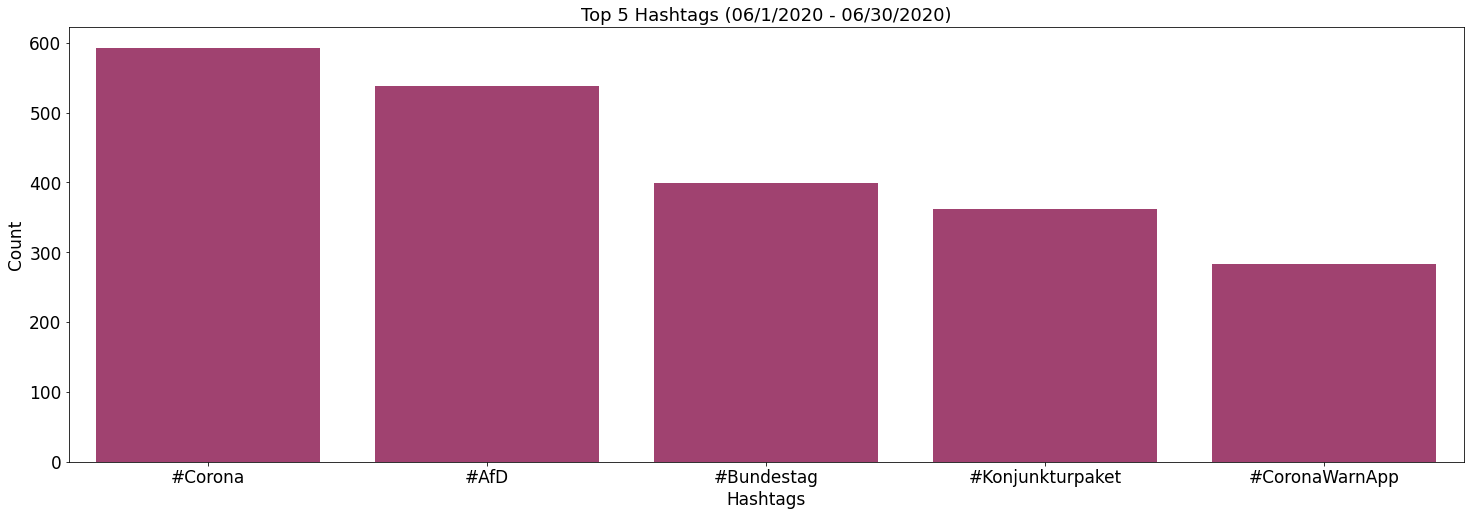

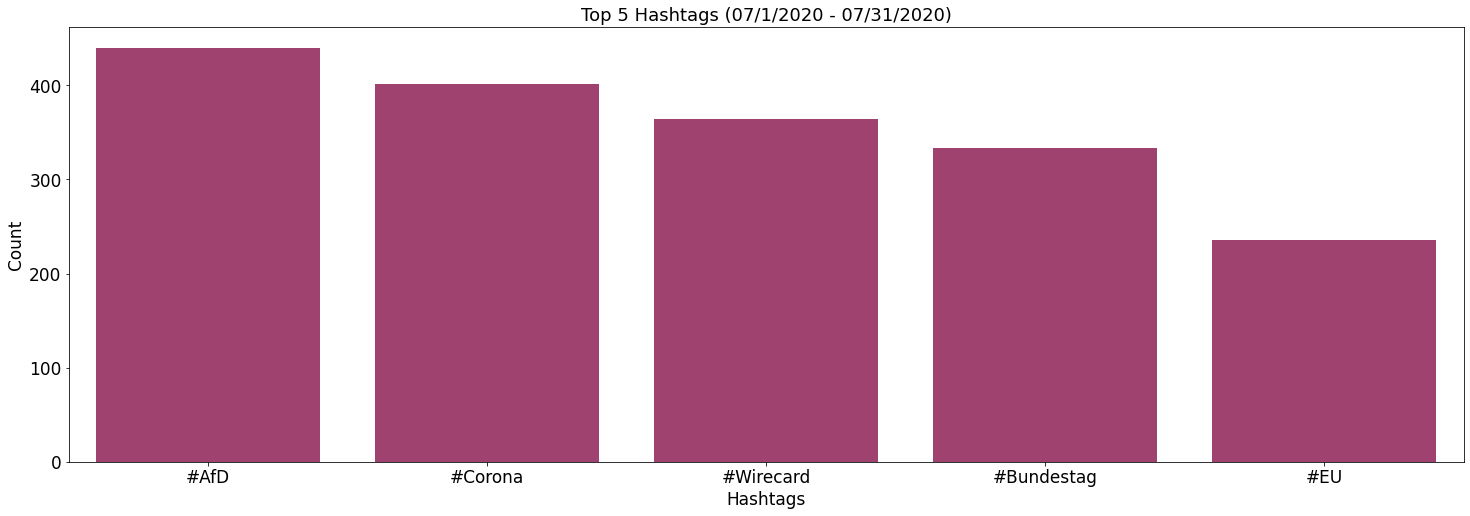

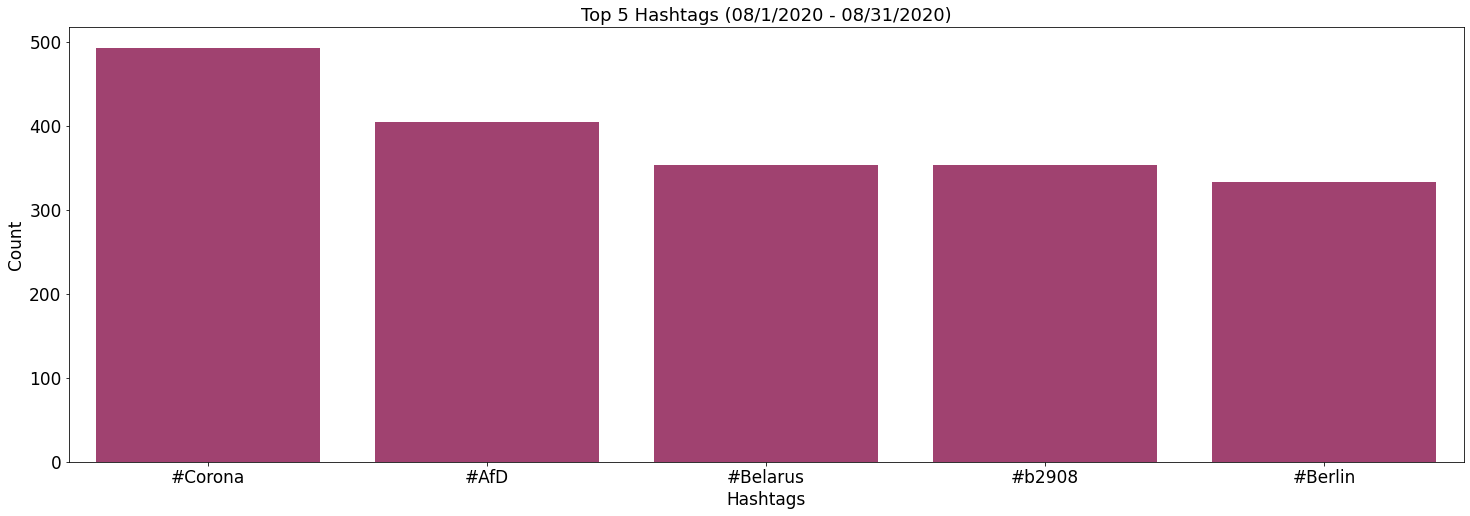

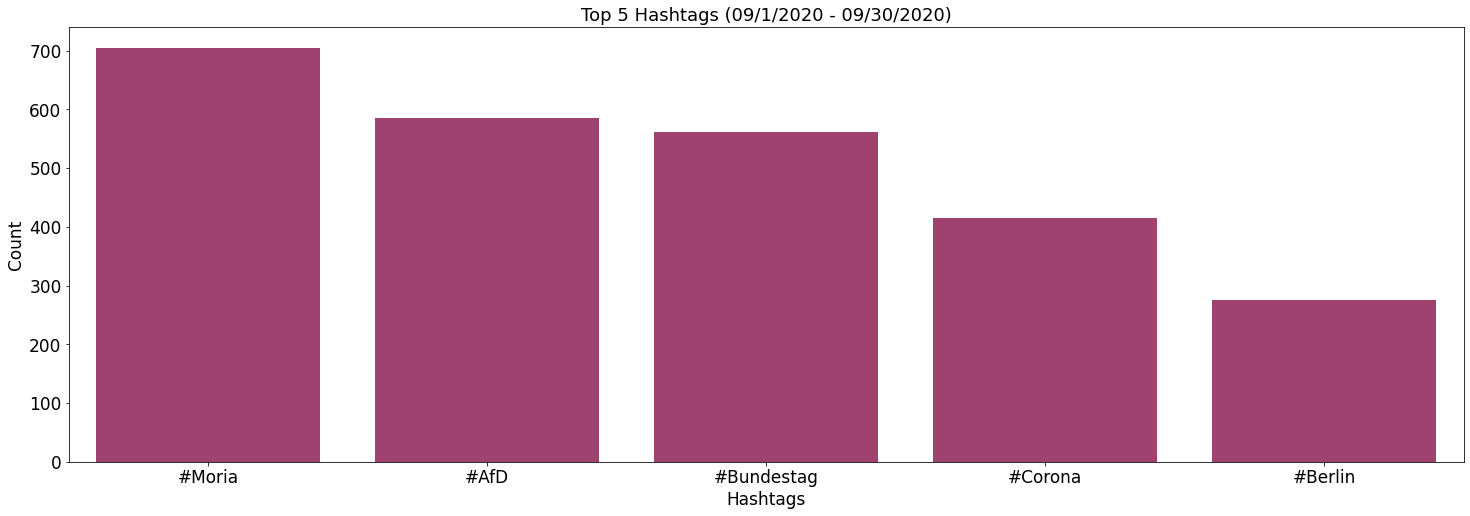

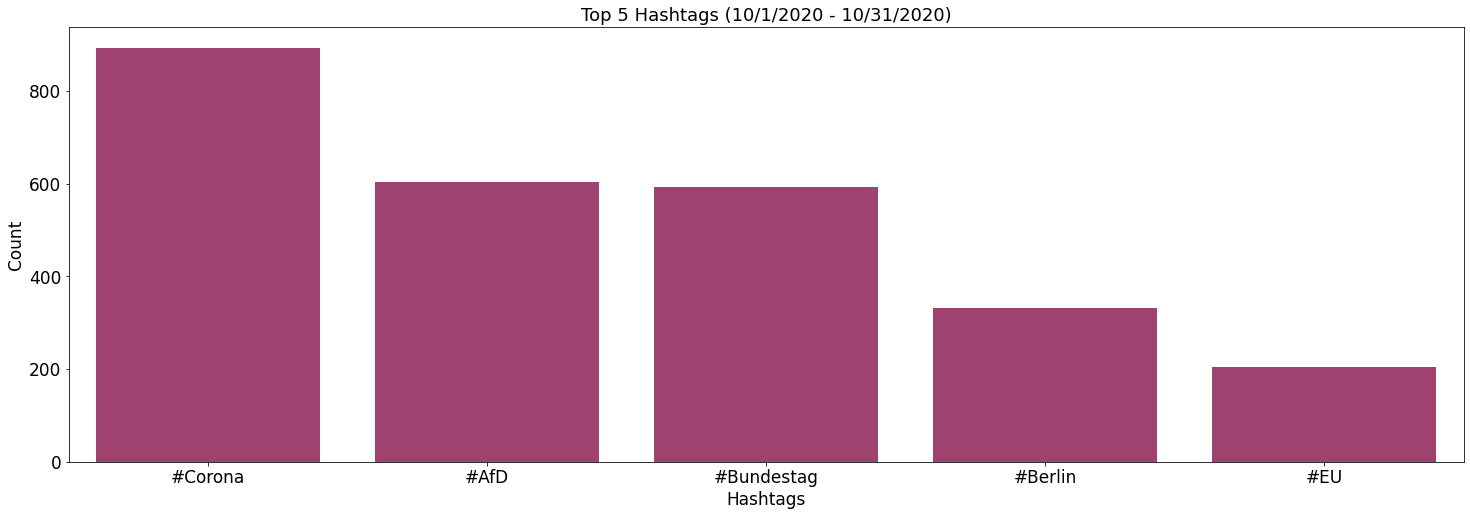

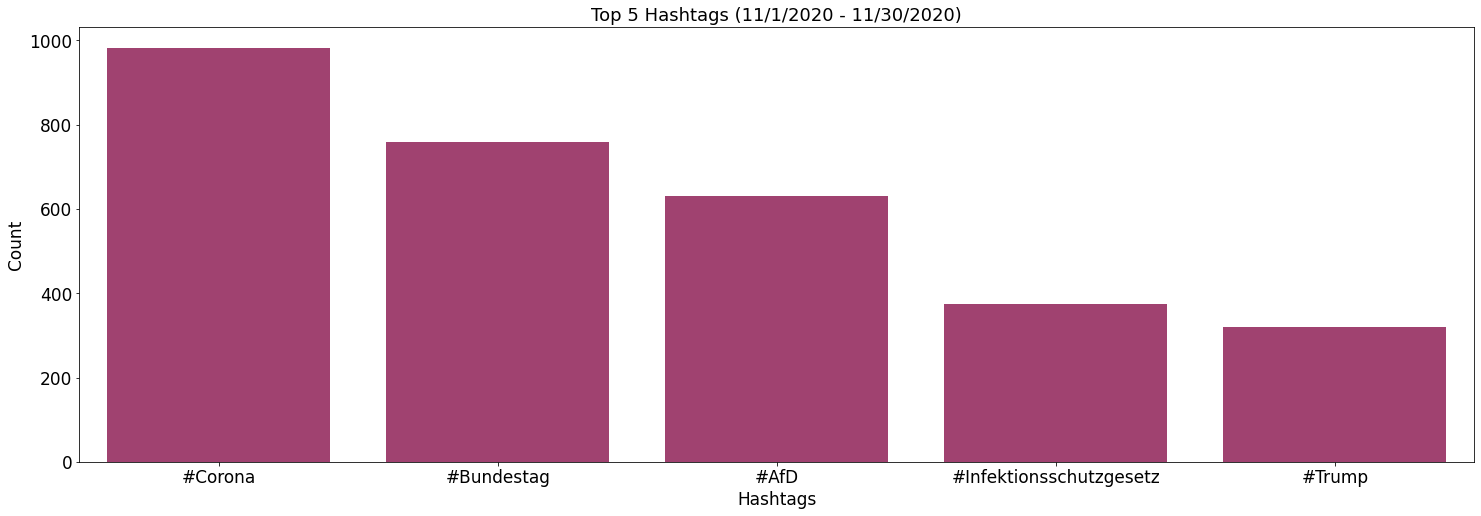

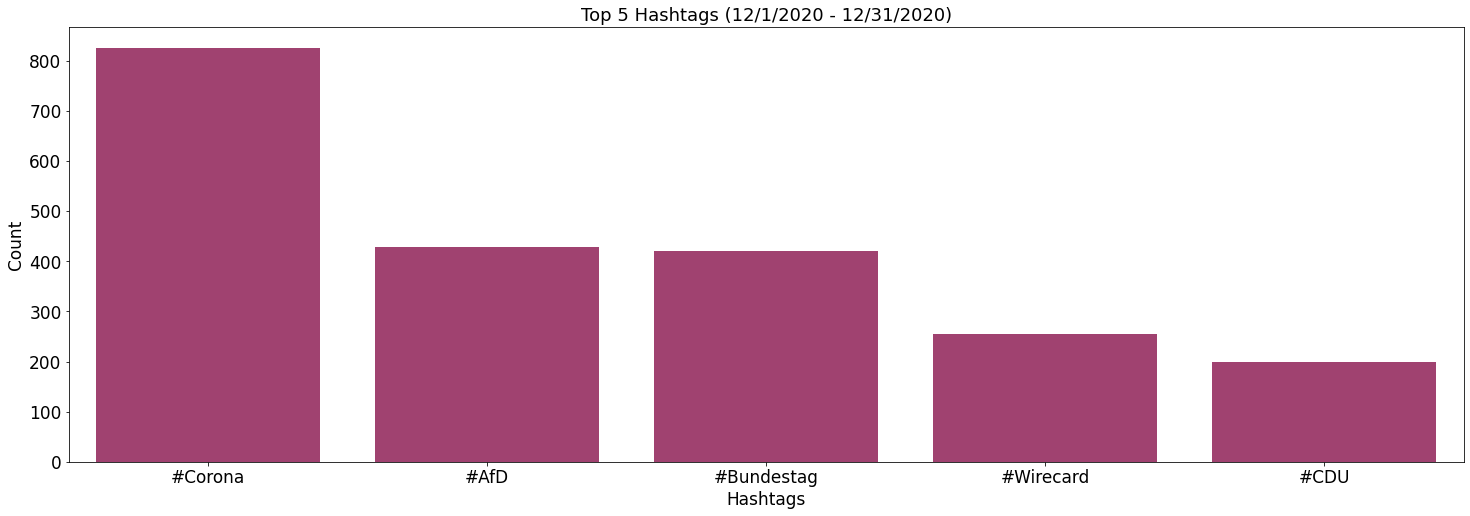

In [48]:
# Top Hashtags throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_top_hashtags = (df_hashtags_per_month['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)
    plt = get_plot(df_top_hashtags, dates)
    plt.show()

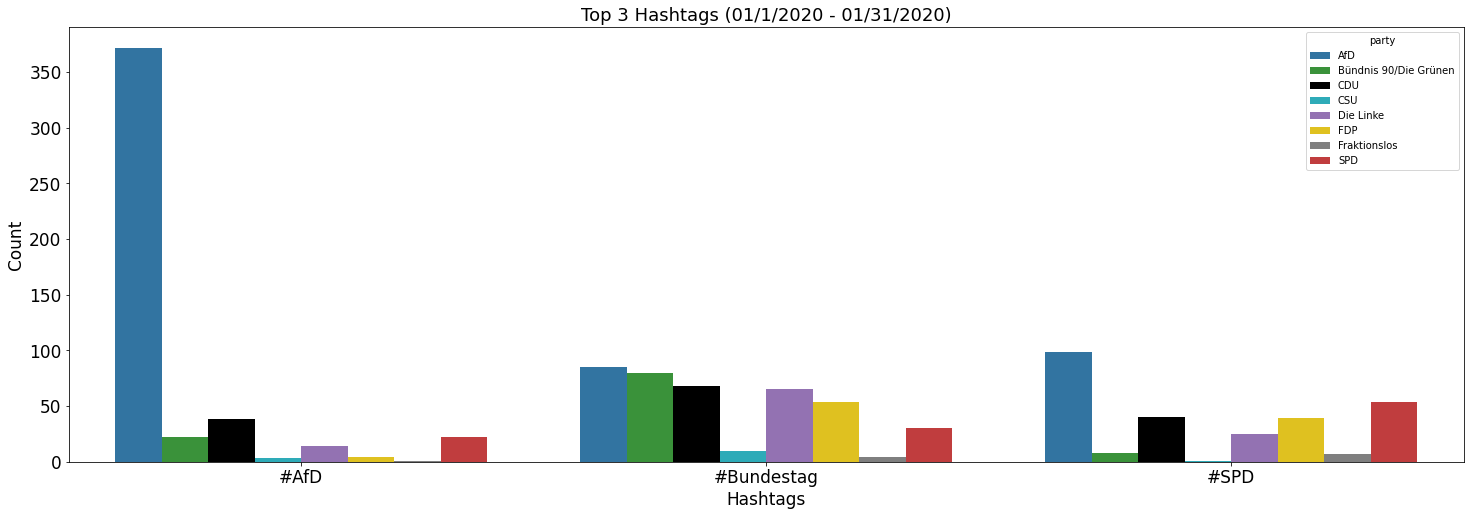

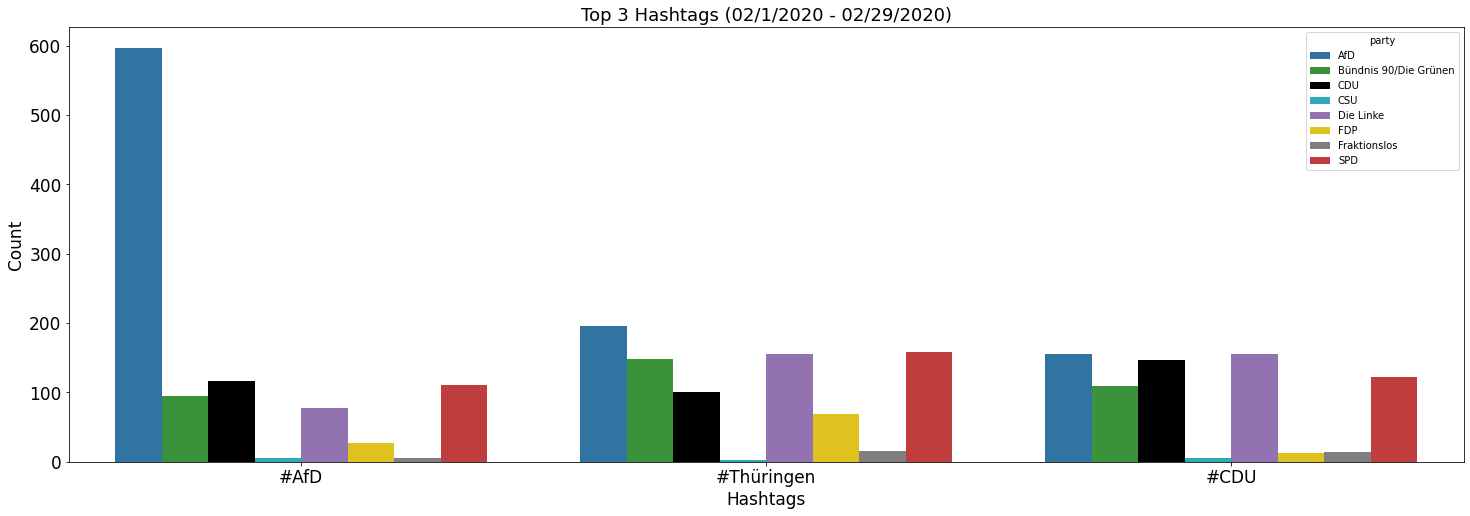

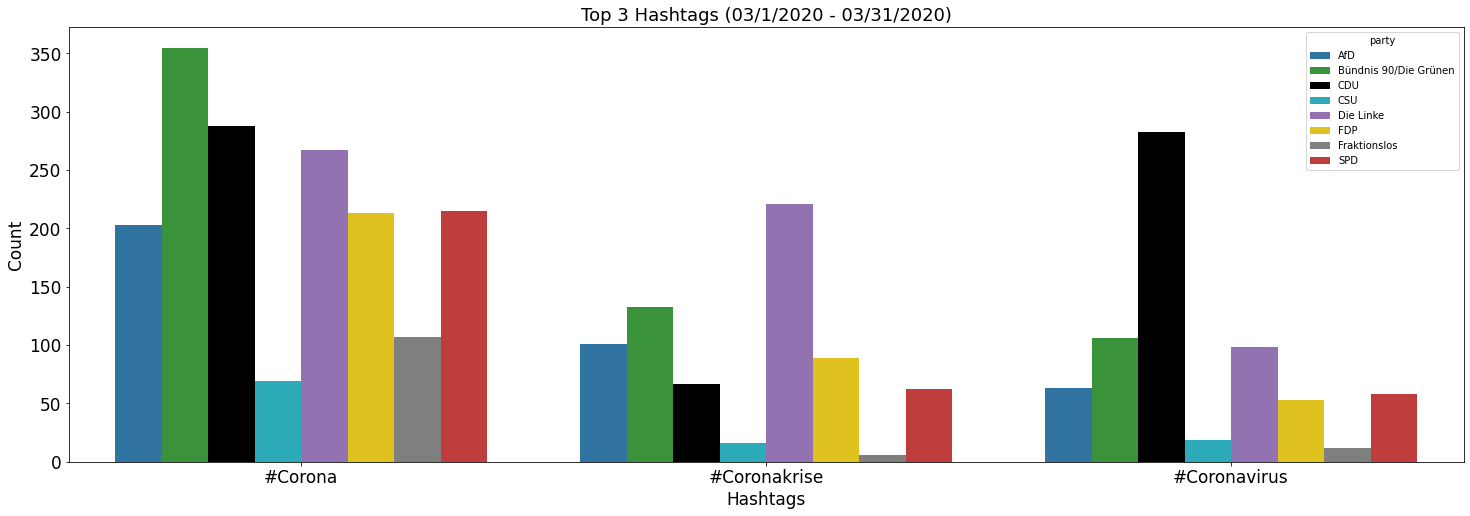

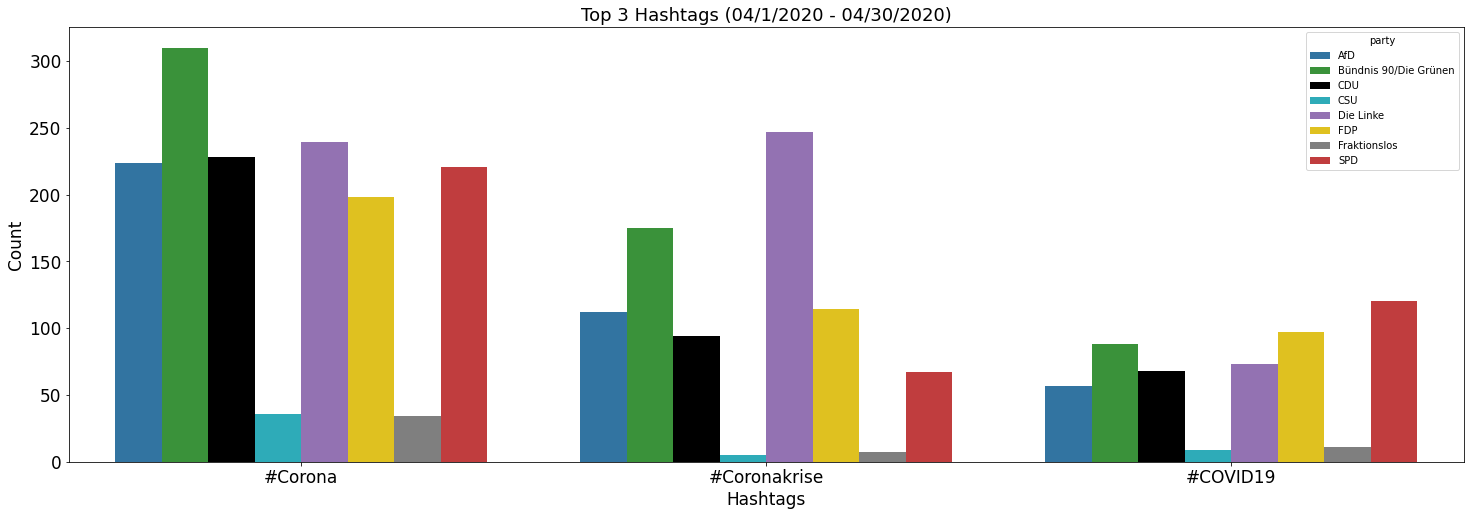

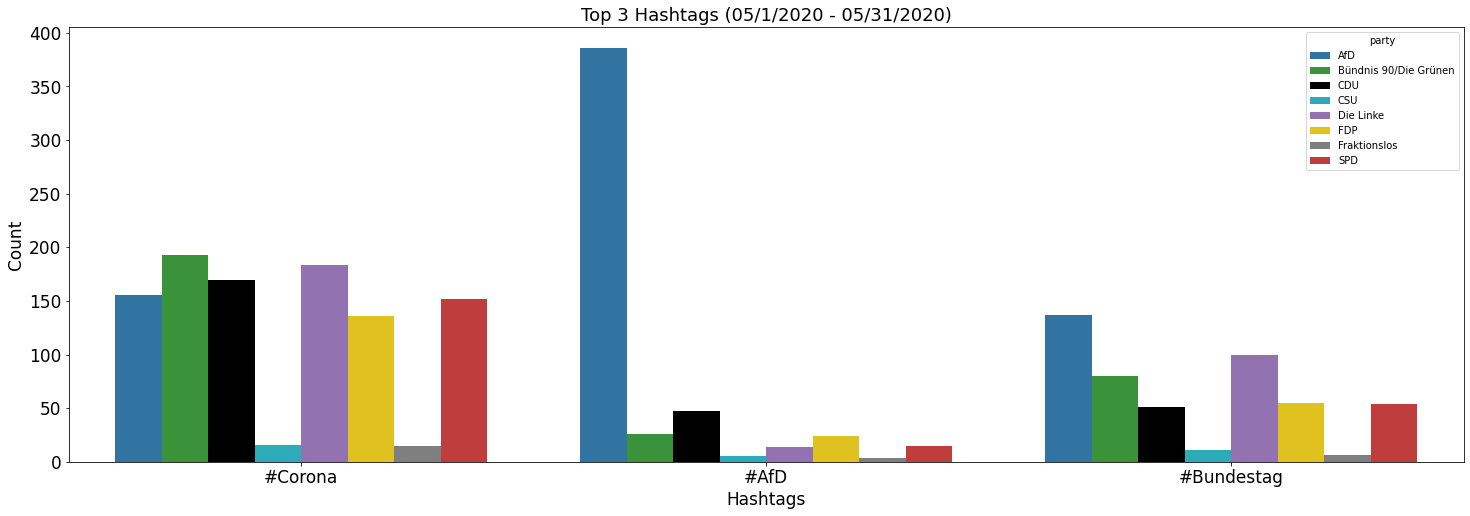

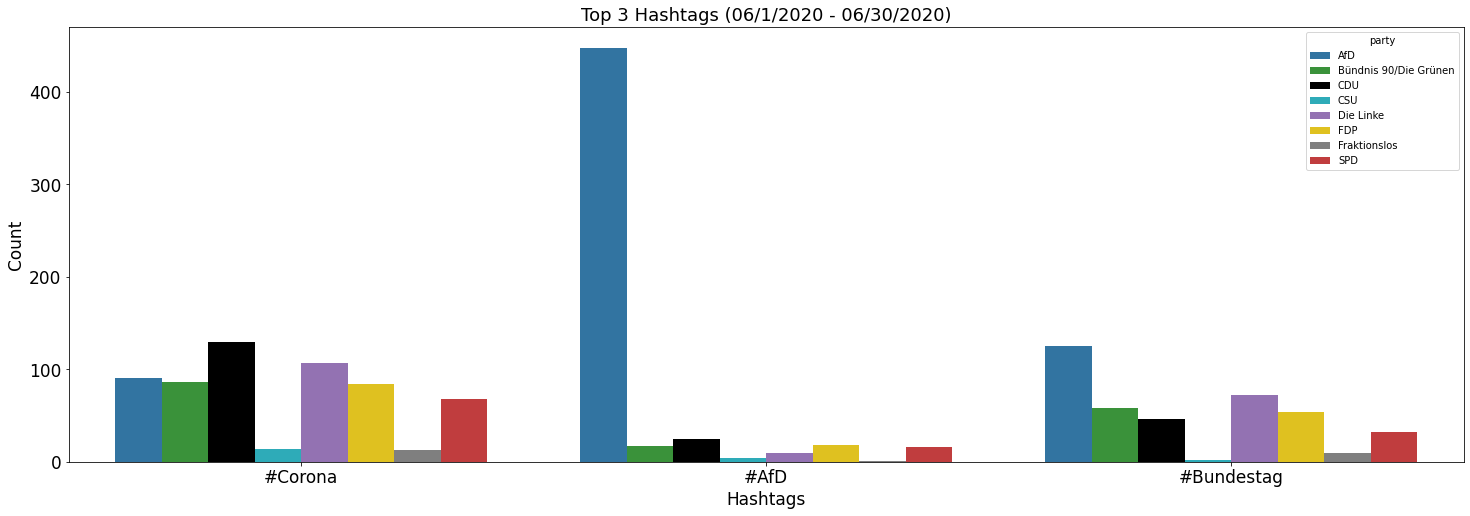

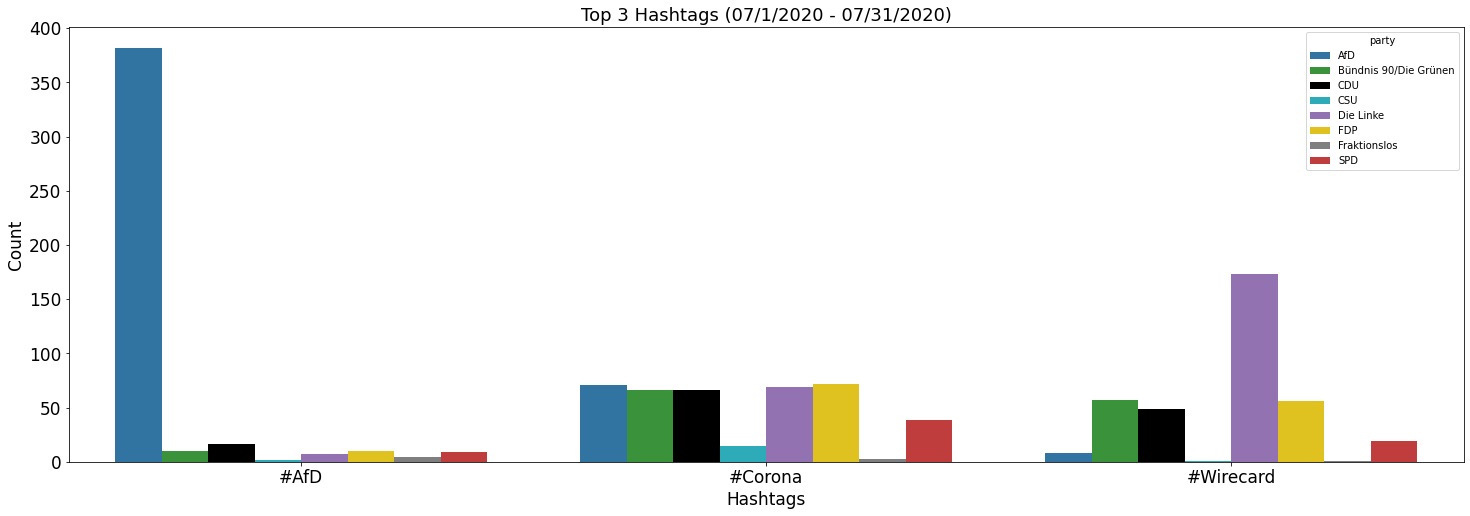

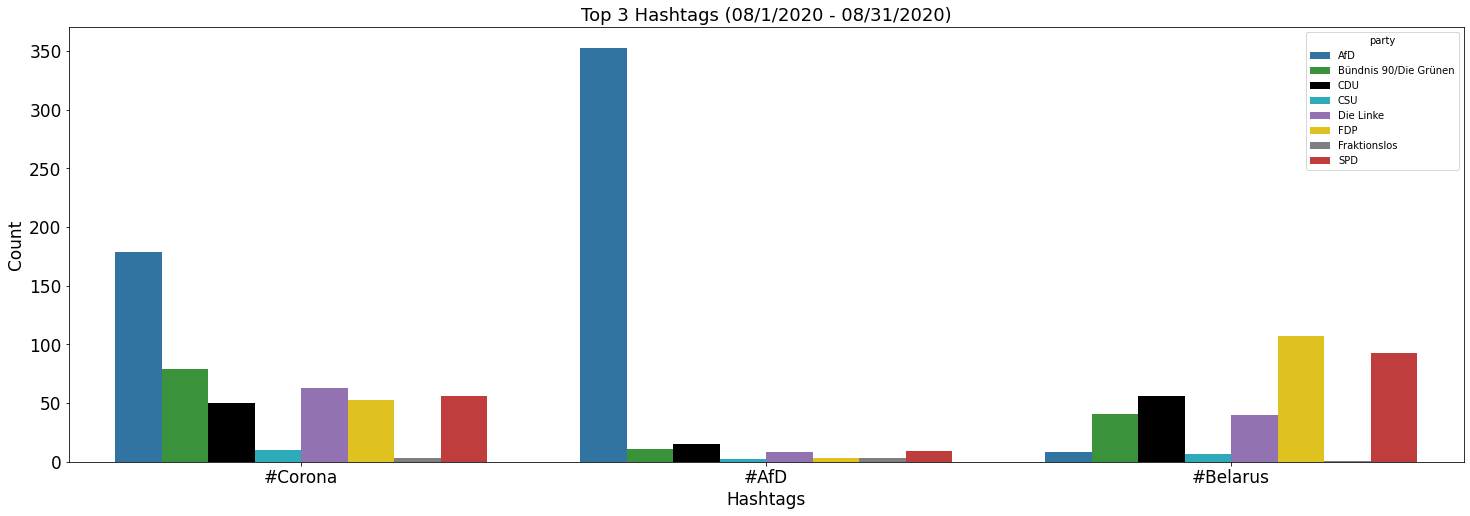

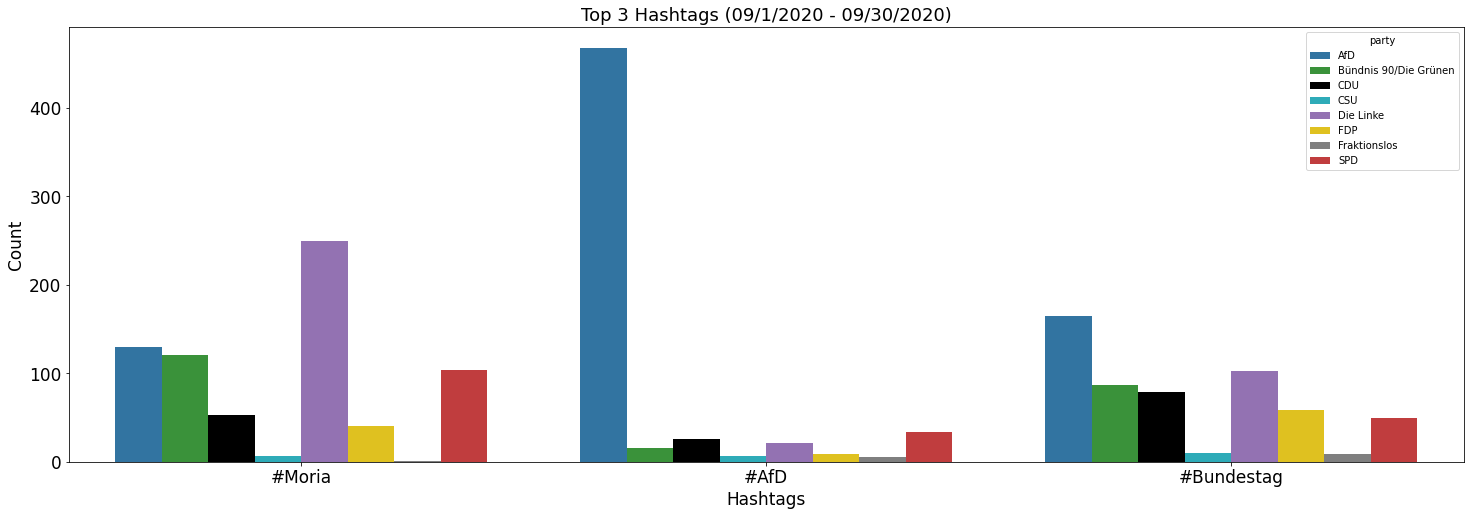

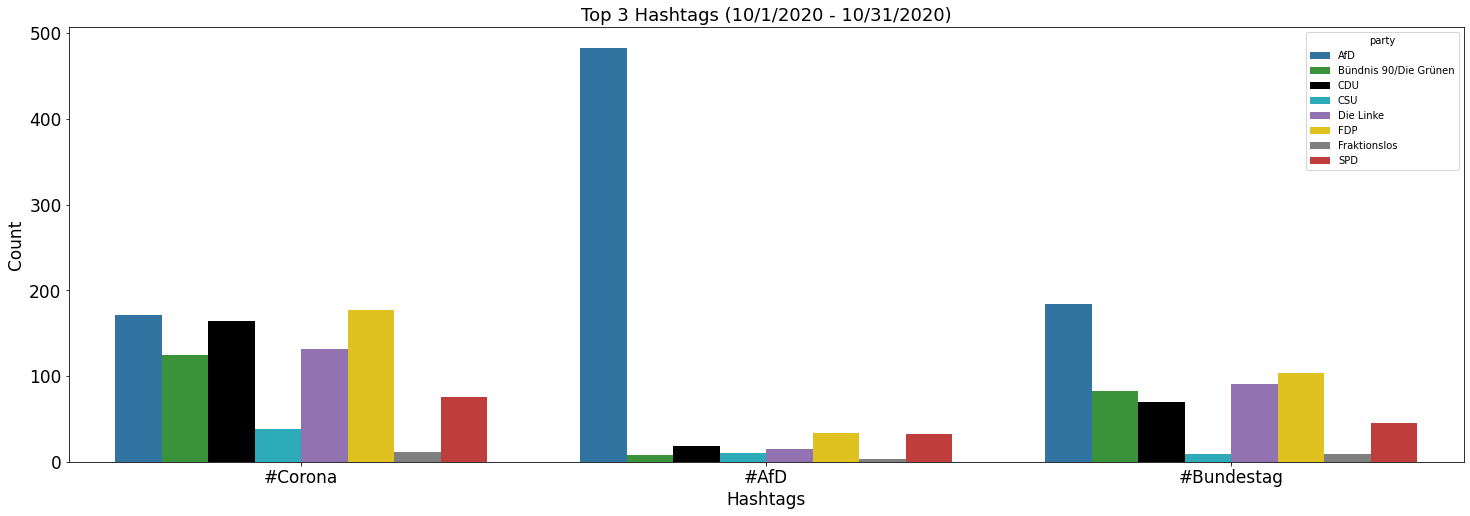

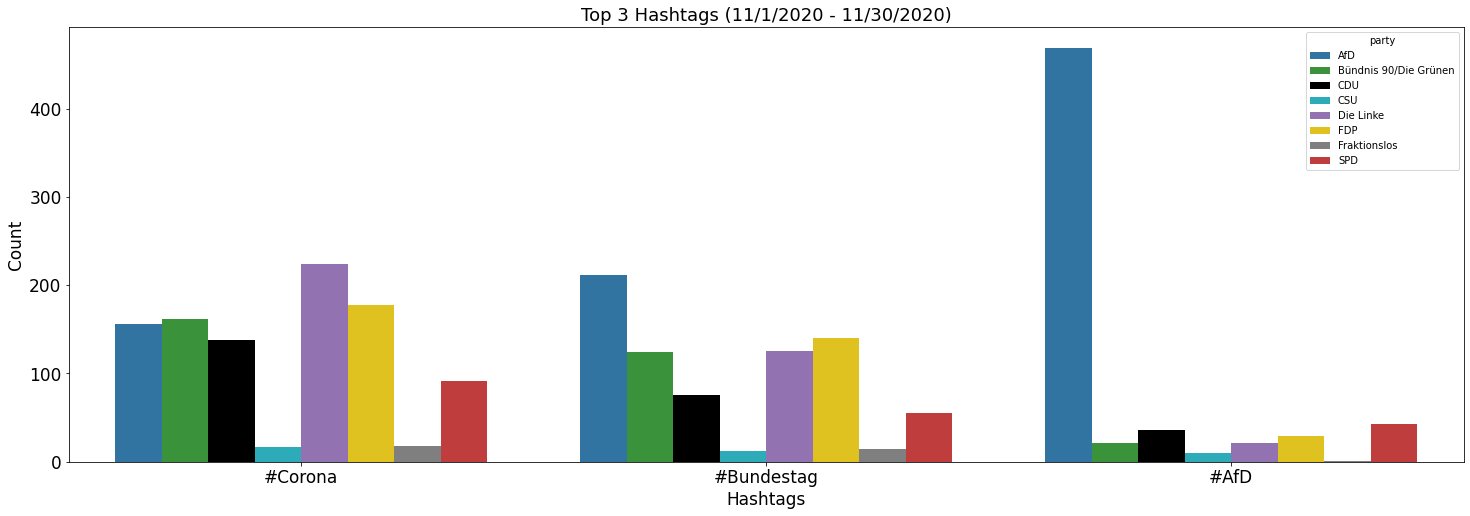

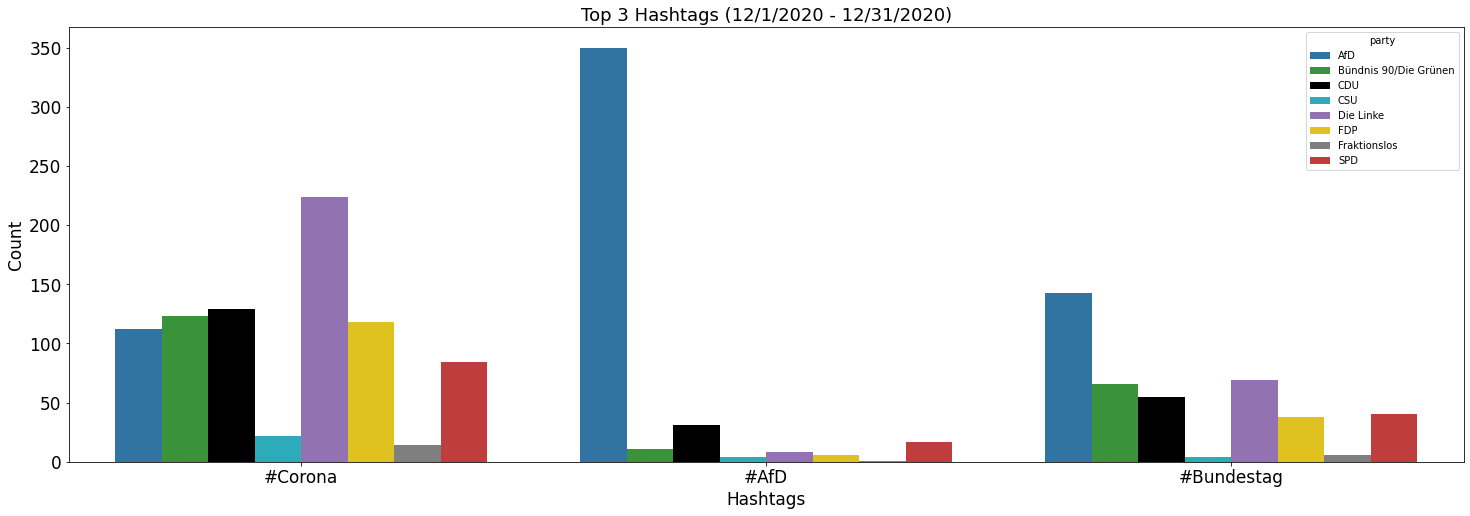

In [49]:
# Top Hashtags used by party throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'screen_name', 'name'], axis='columns')
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_relevant_columns = df_hashtags_per_month.drop('date', axis='columns')
    top_hashtags = ((df_relevant_columns['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_hashtags_per_party)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
    df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
    data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
    plot = get_plot_parties(data_top_hashtags, dates)
    plt.show()

In [17]:
#Functions for Corona-Tweets
import json
CORONA_TWEETS_POLITICIANS = '../filtered_data/covid_tweets_by_politician/'
CORONA_TWEETS_QUOTED = '../filtered_data/quote_covid_tweets/'

def get_politicians_list():
    with open('../../assets/all_politicians.json', 'r', encoding='utf-8') as infile:
        politicians_list = []
        f_content = json.load(infile)
        politicians_list = [p['screen_name'] + '.json' for p in f_content]
        return politicians_list
file_names = get_politicians_list()


def filter_rows_by_values(df, col, values, covid):
    return df[df[col].isin(values) == covid]

def read_tweets(file, entry):
    id_list = []
    f_path = os.path.join(file, entry)
    if os.path.isfile(f_path):
        with open(f_path, 'r', encoding='utf-8') as infile:
            f_content = json.load(infile)
            if f_content != []:
                for tweet in f_content:
                    id_list.append(tweet.get('raw_data').get('id'))
    return id_list

def get_all_covid_tweet_ids():
    ids = []
    for entry in file_names:
        ids += read_tweets(CORONA_TWEETS_POLITICIANS, entry)
        ids += read_tweets(CORONA_TWEETS_QUOTED, entry)
    return ids



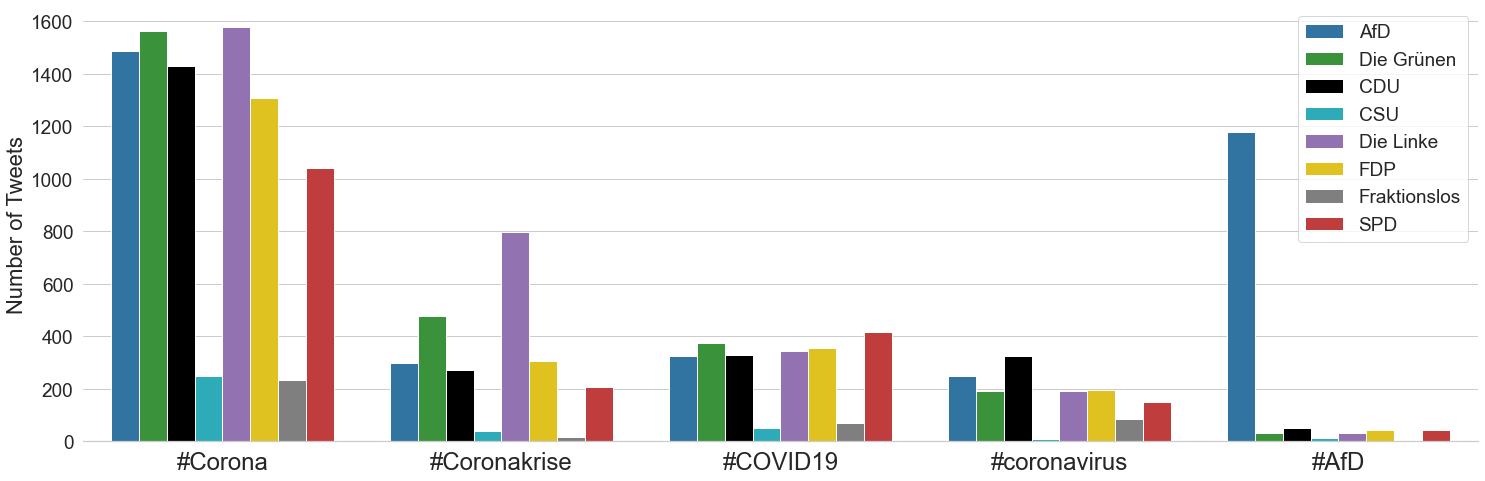

In [42]:
# Covid-Tweets: Top Hashtags used by party whole year

df_copy = df_hashtags.copy()
df_copy = df_copy.drop(['id', 'screen_name', 'name', 'date'], axis='columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), True)
top_hashtags = ((df_copy['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_hashtags_per_party)).index.to_list()
df_relevant_columns = df_copy.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
plt = plot_for_appendix(data_top_hashtags)
plt.show()

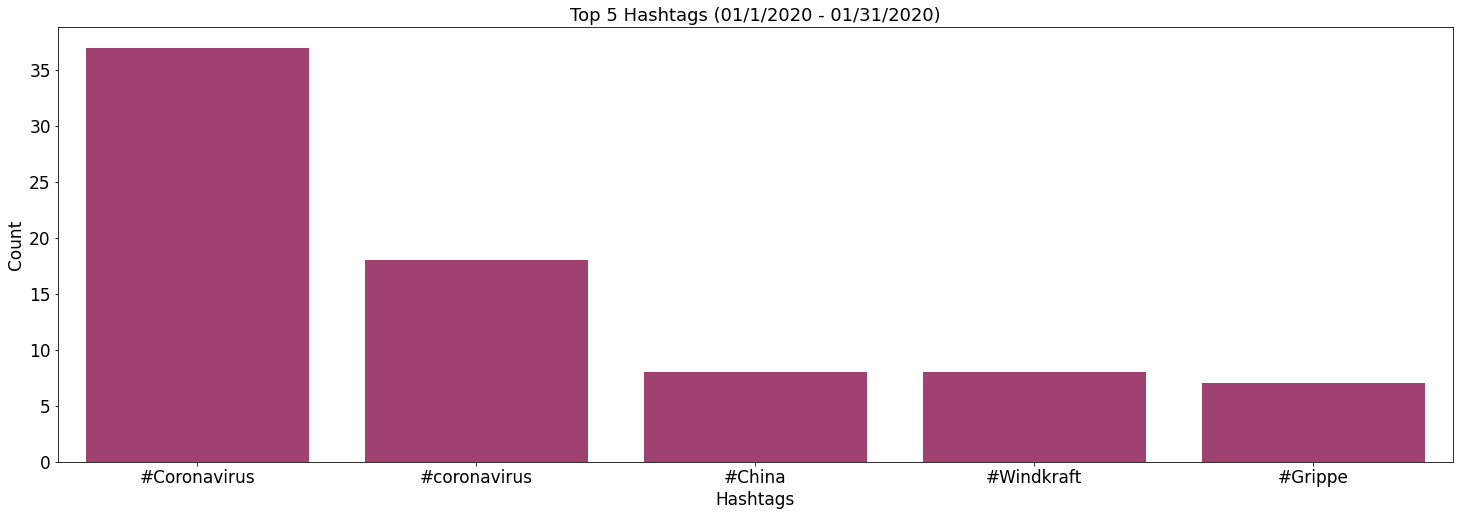

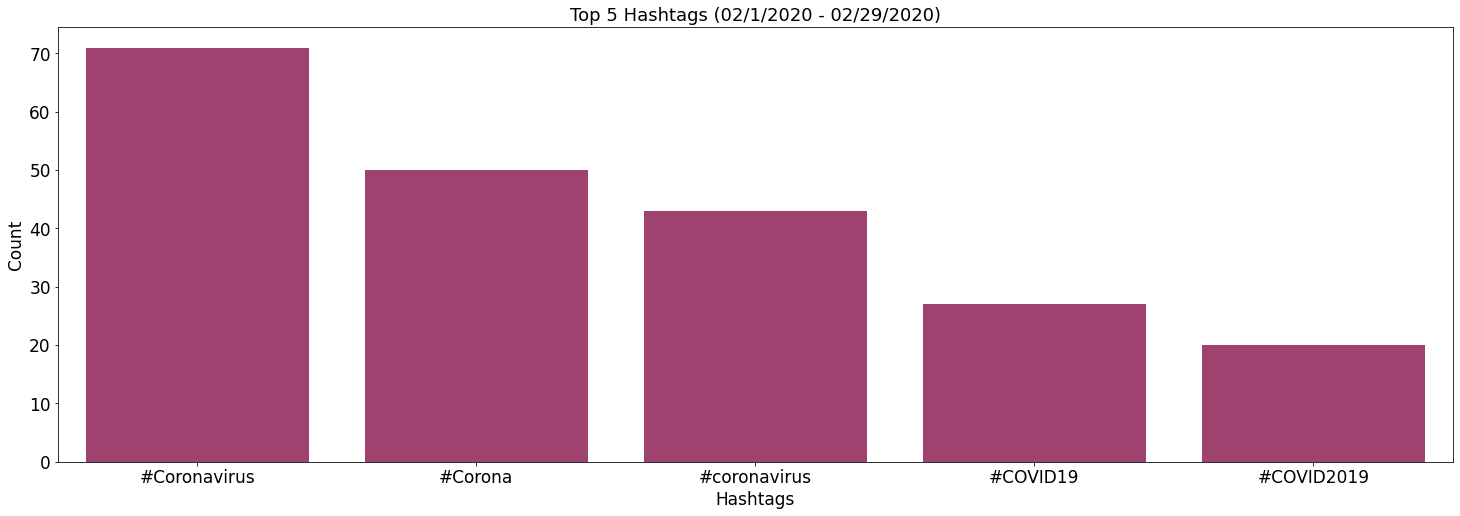

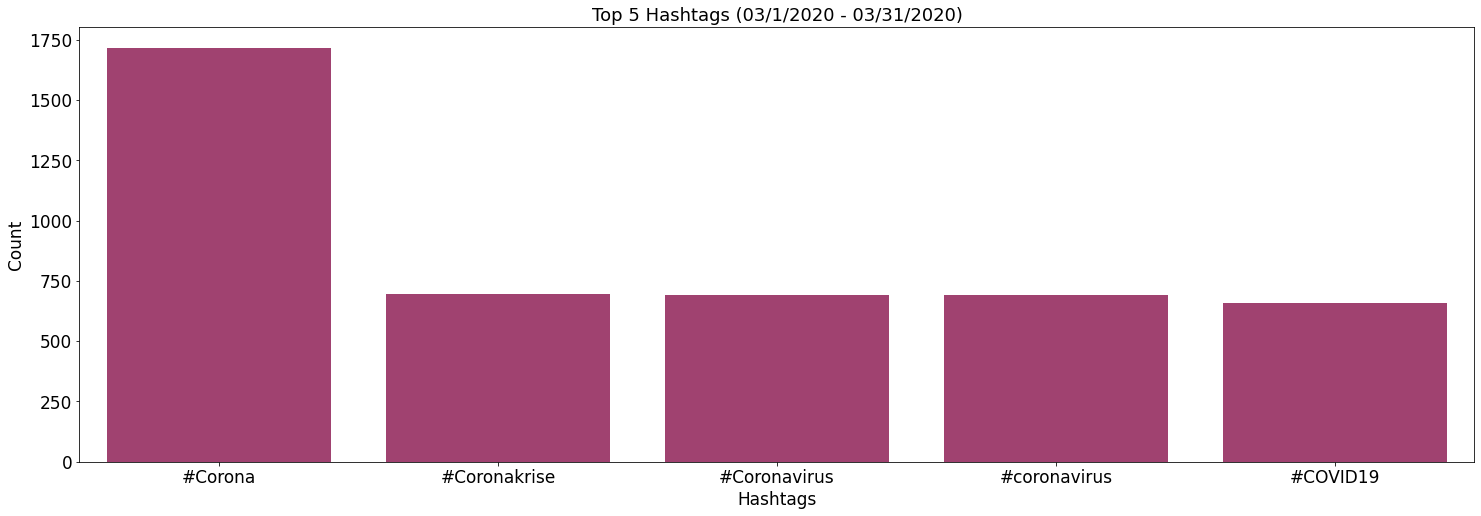

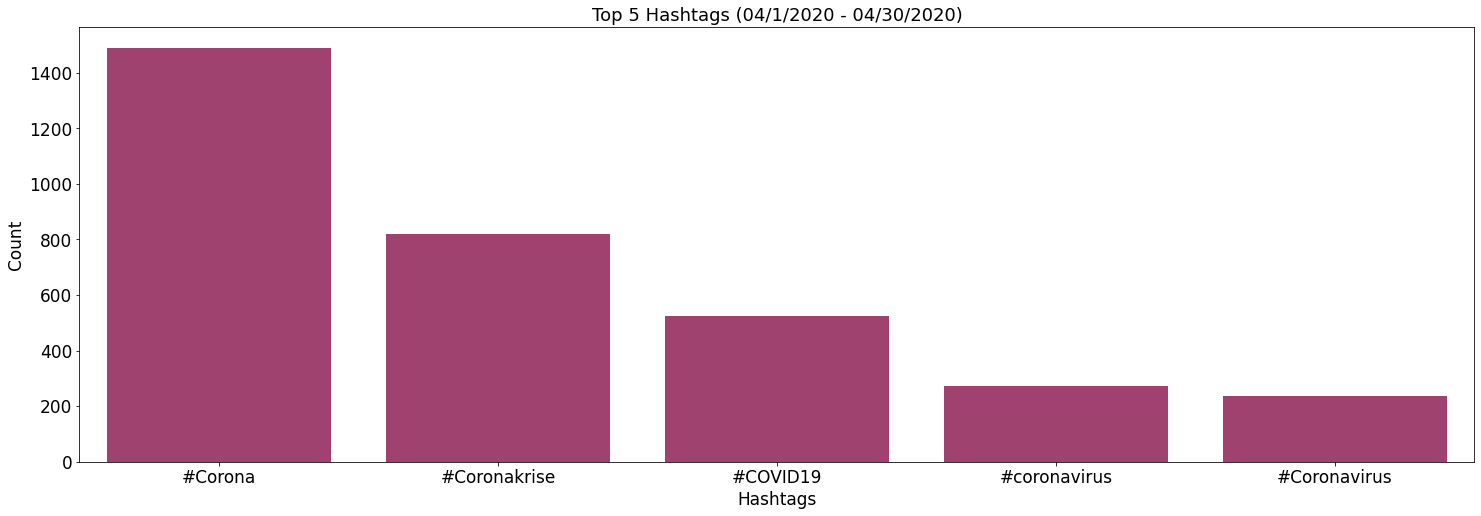

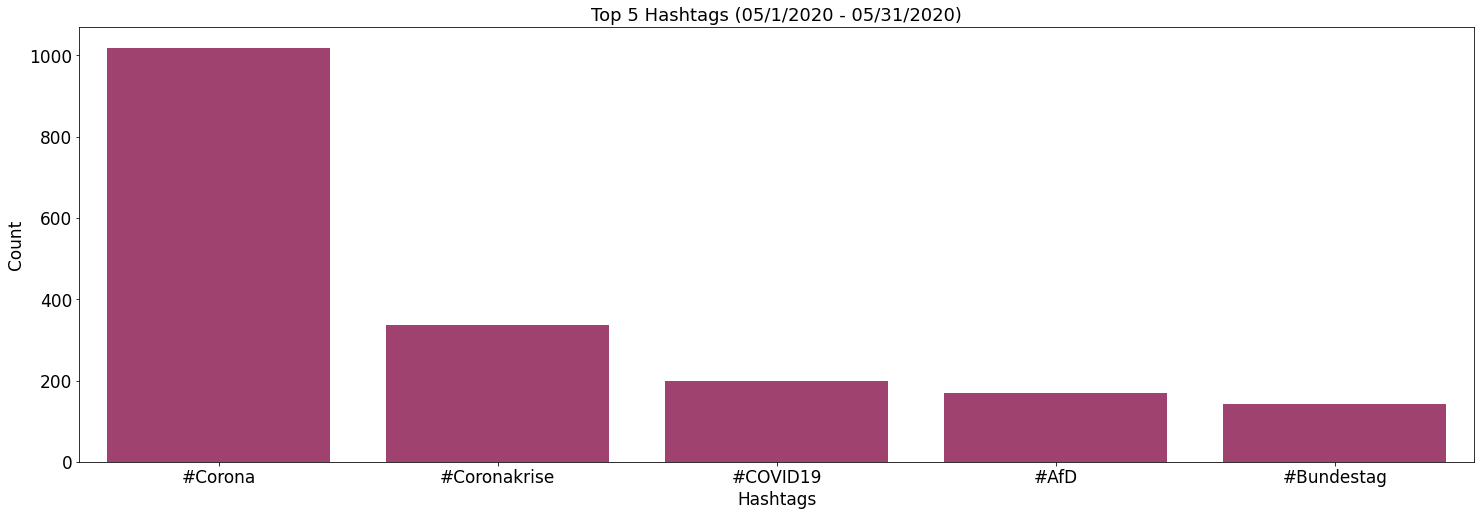

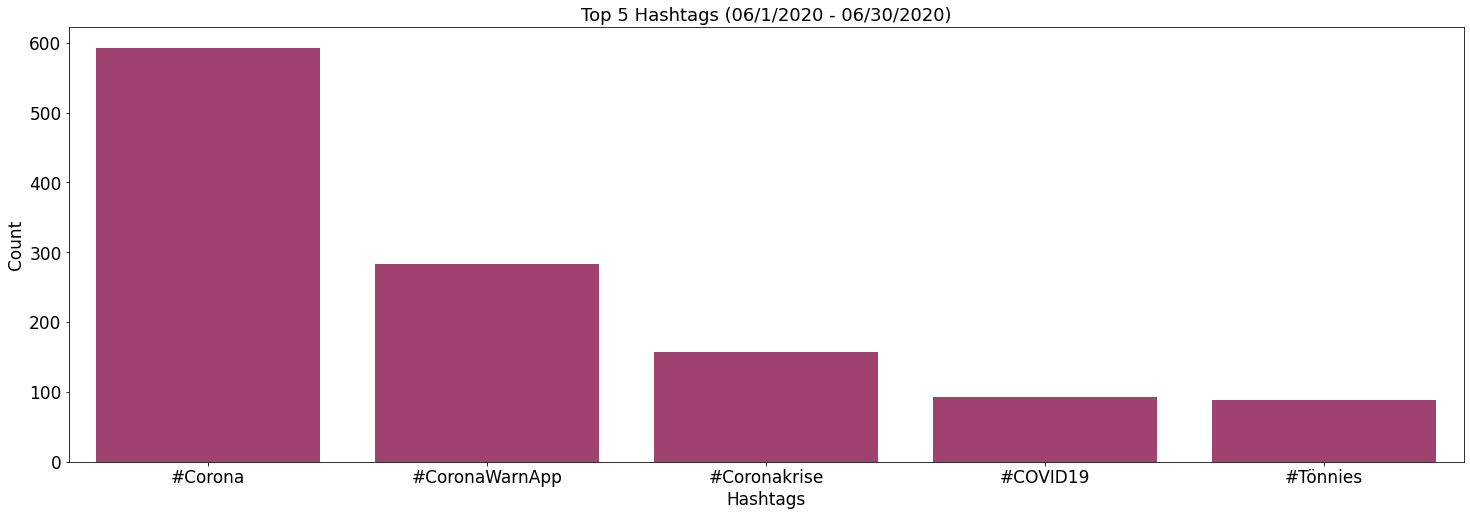

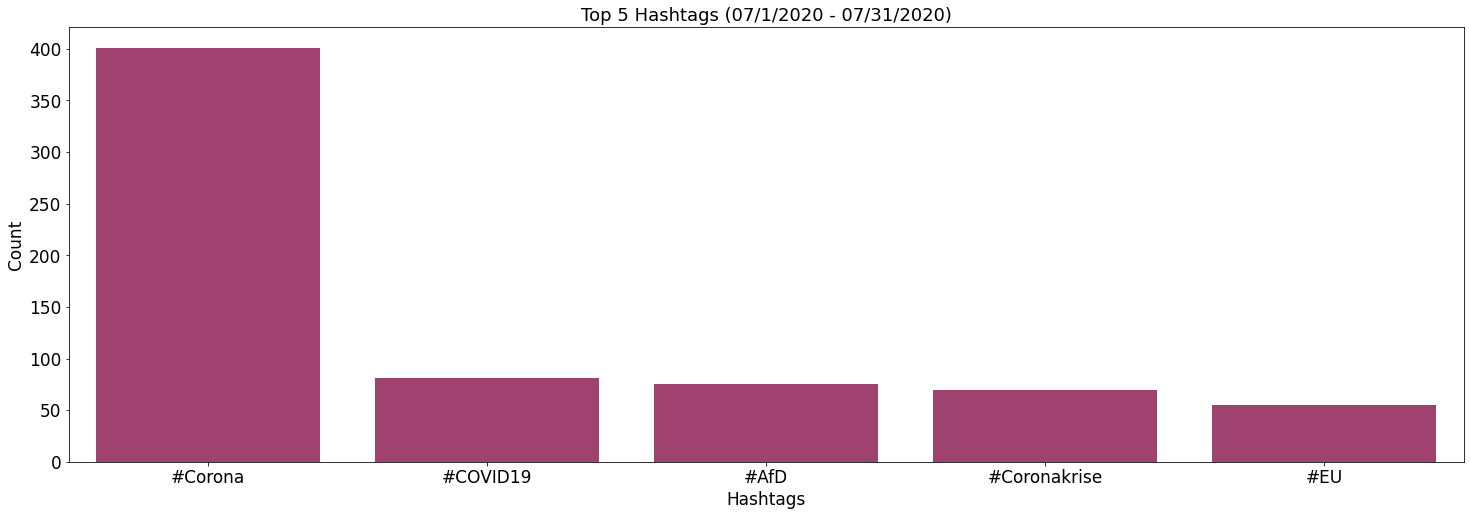

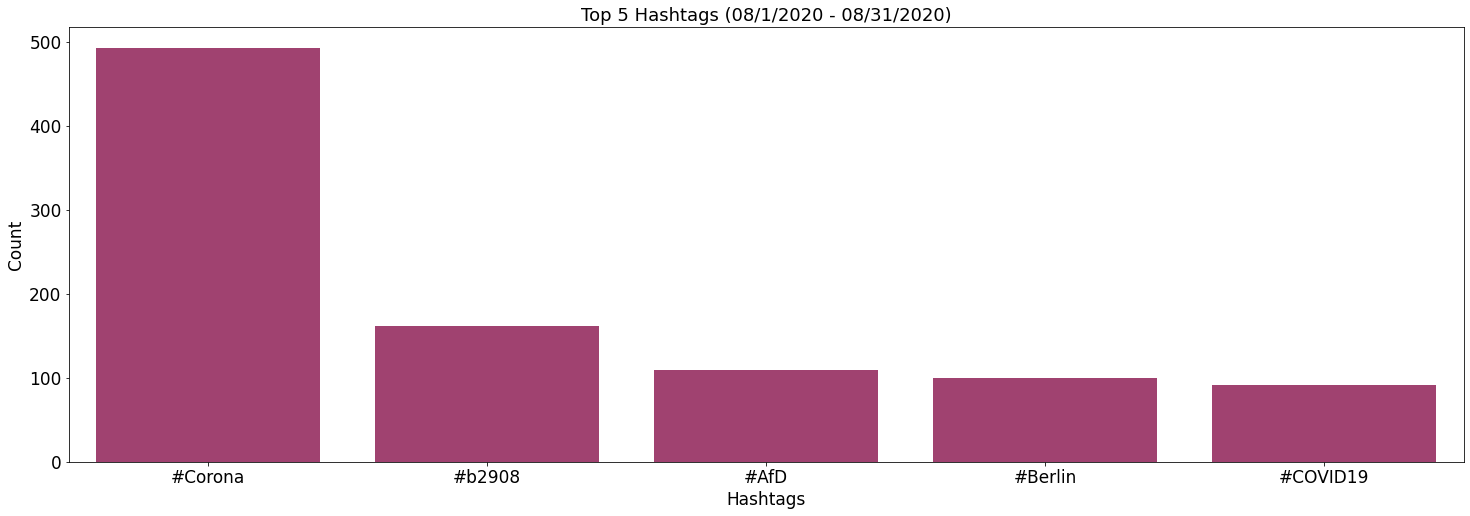

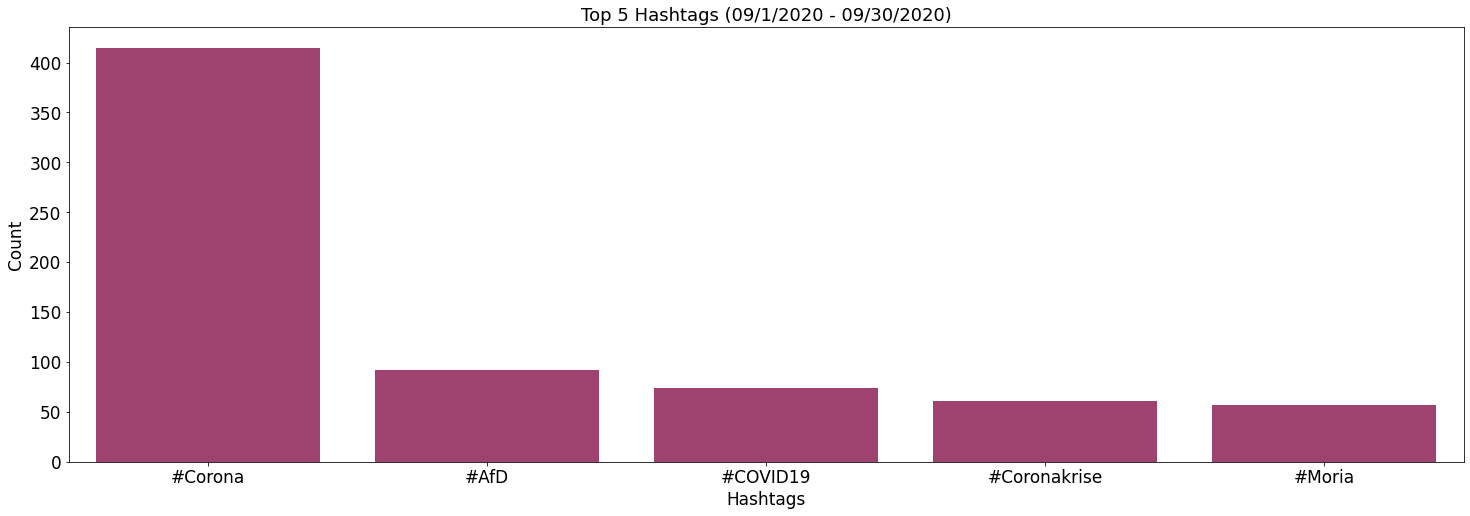

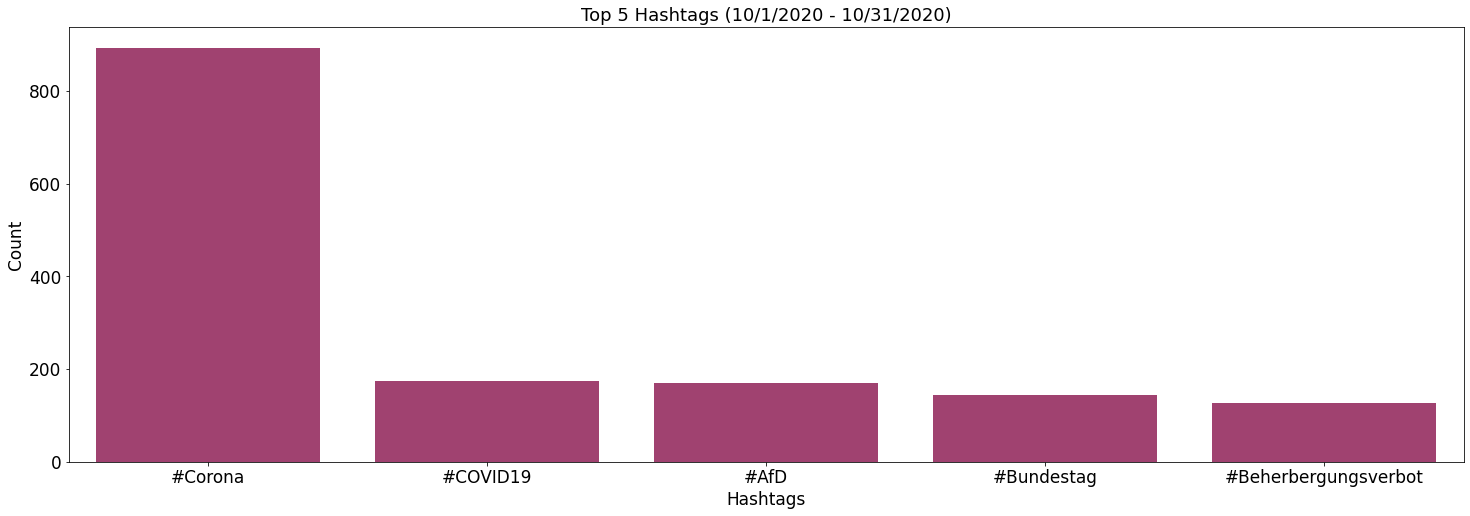

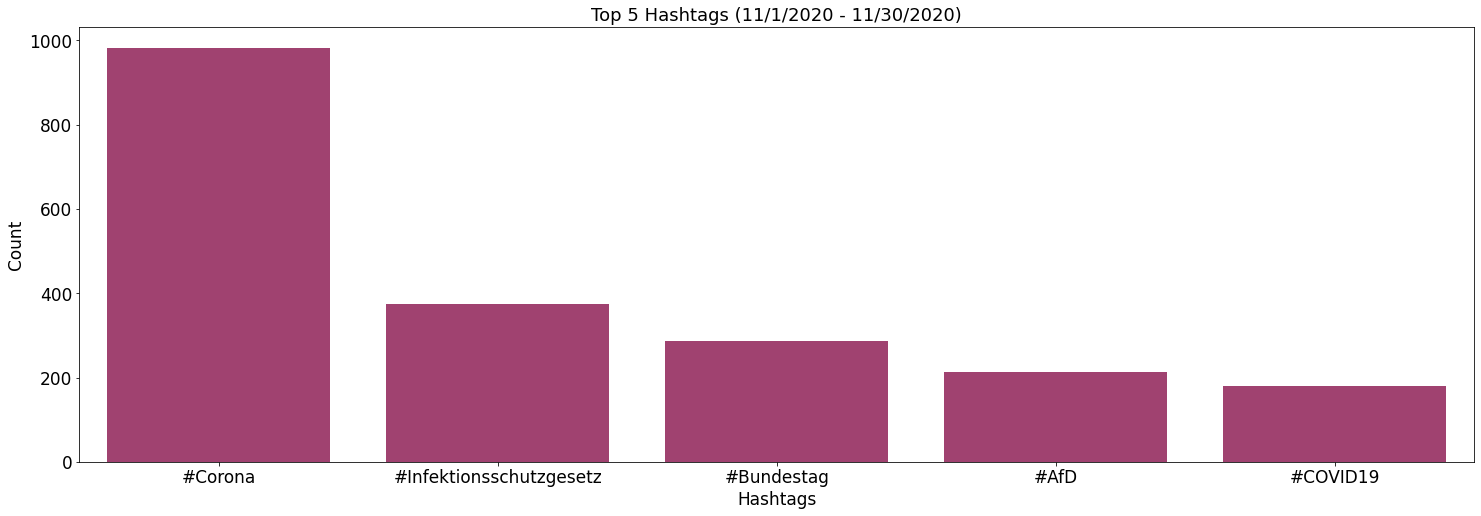

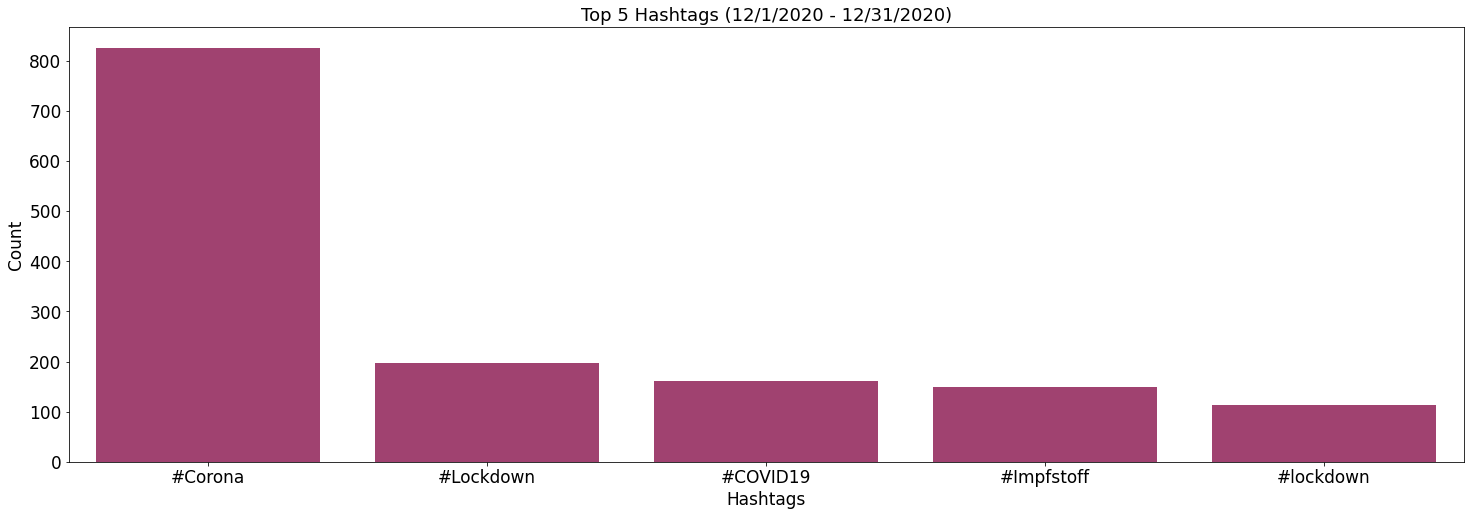

In [52]:
# Covid-Tweets: Top Hashtags throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), True)
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_top_hashtags = (df_hashtags_per_month['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)
    plot = get_plot(df_top_hashtags, dates)
    plt.show()


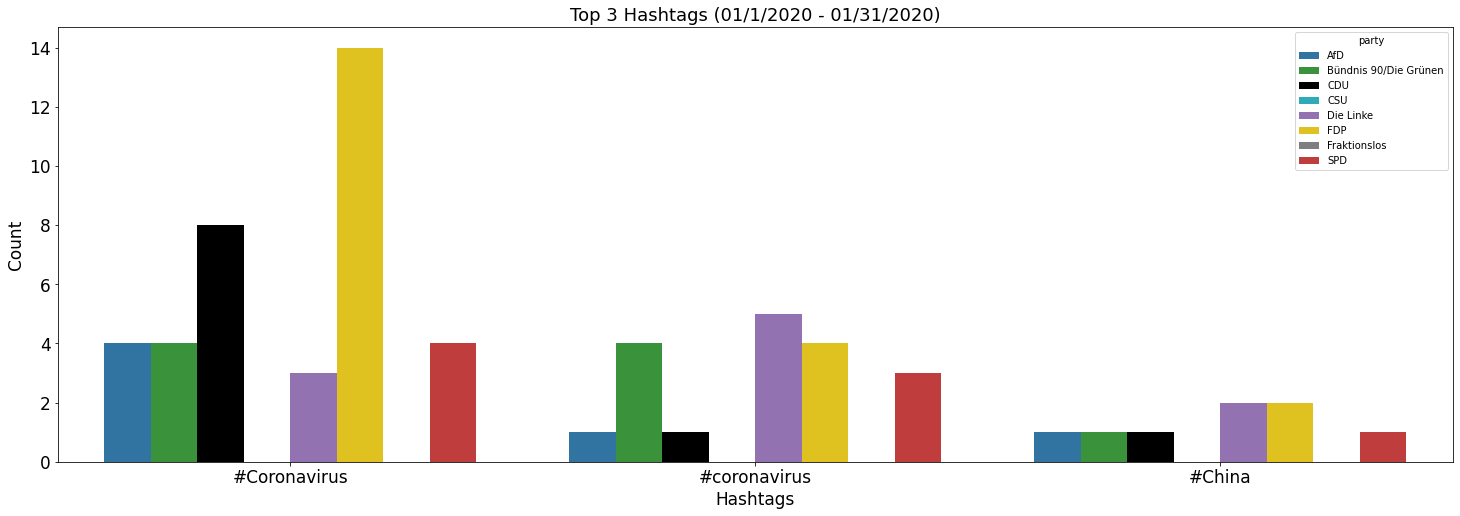

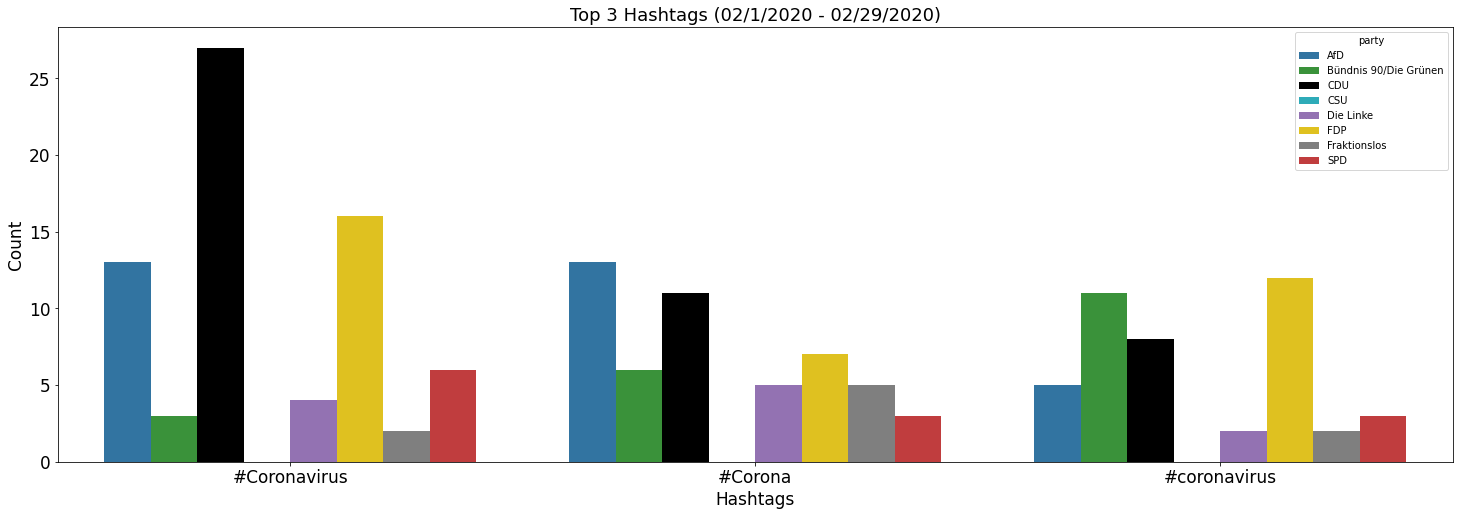

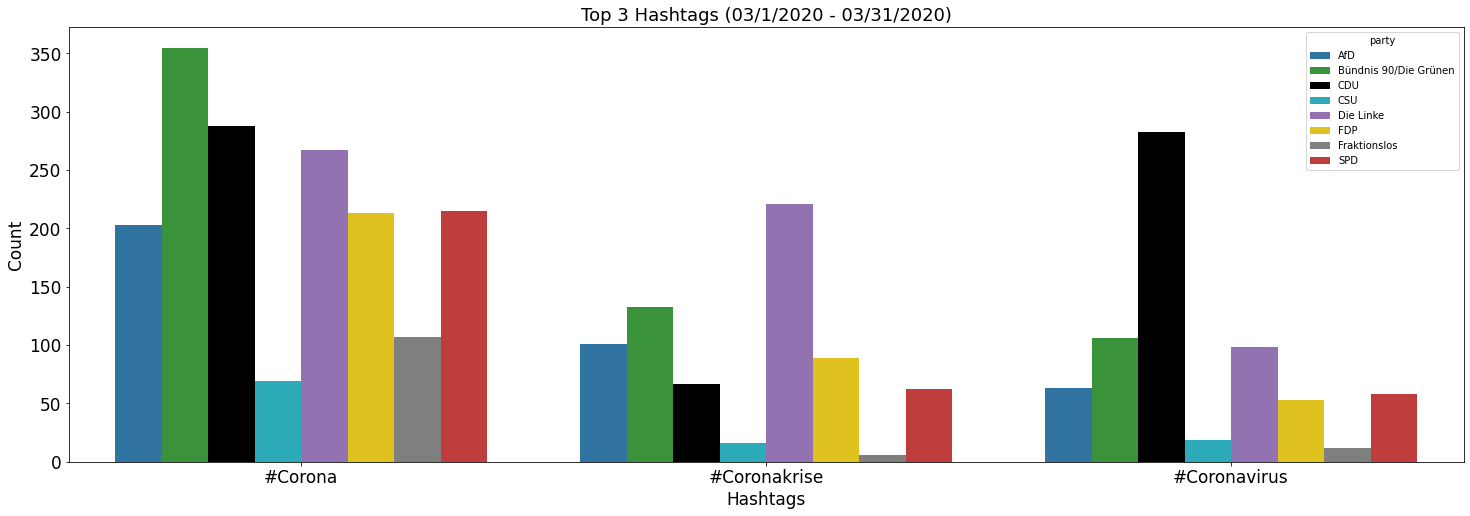

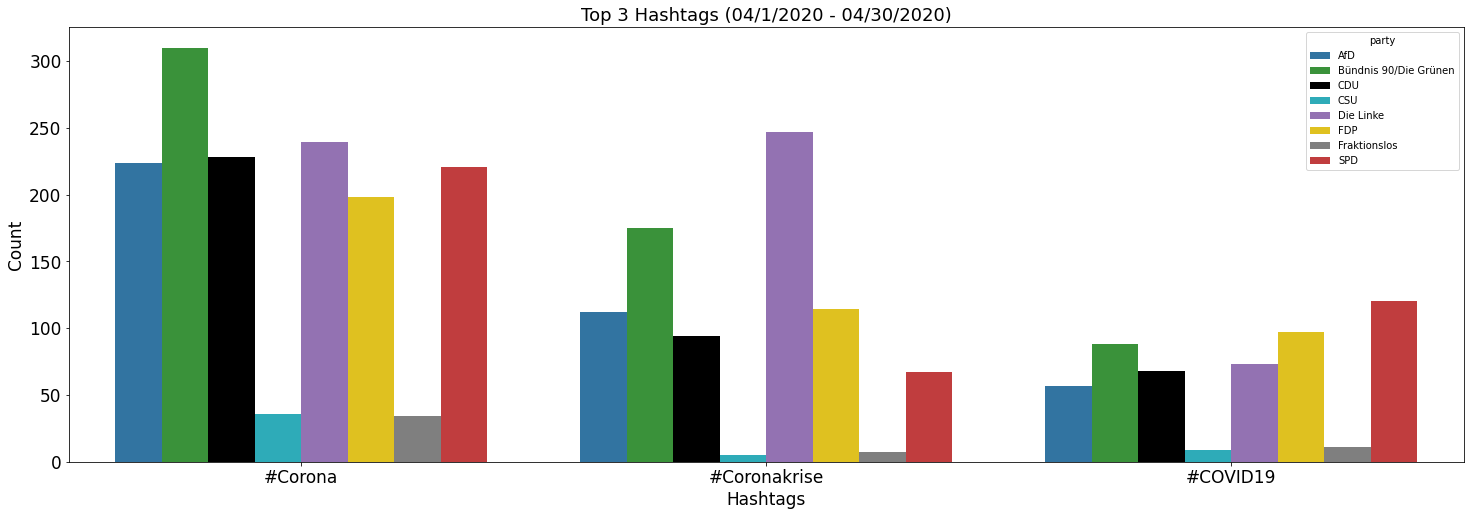

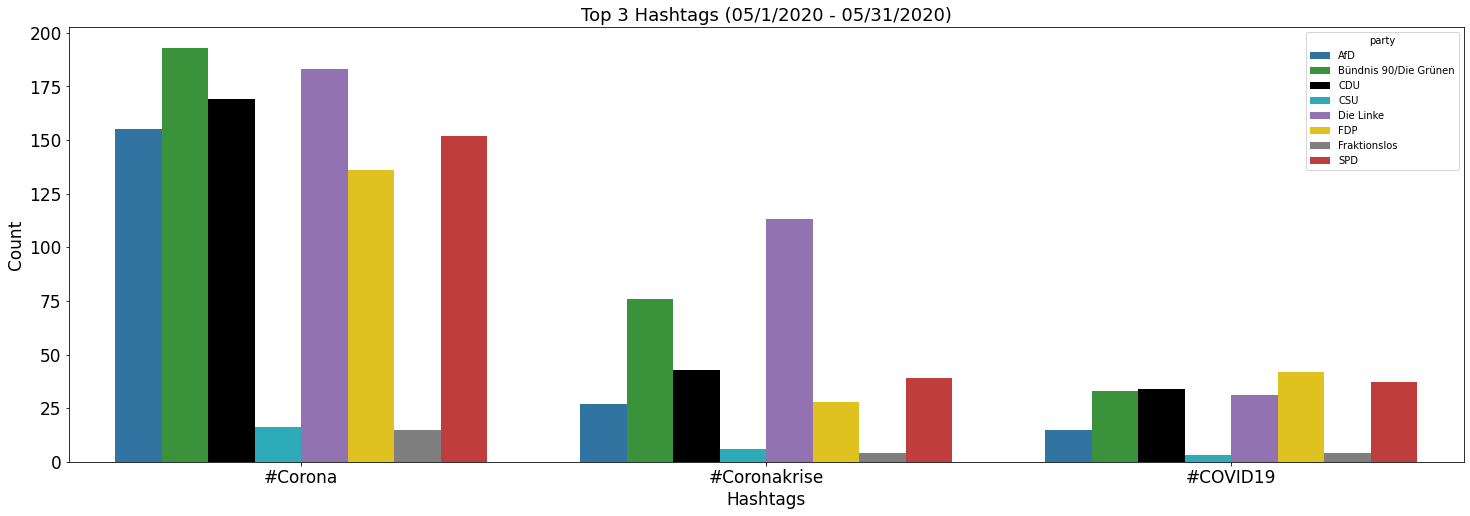

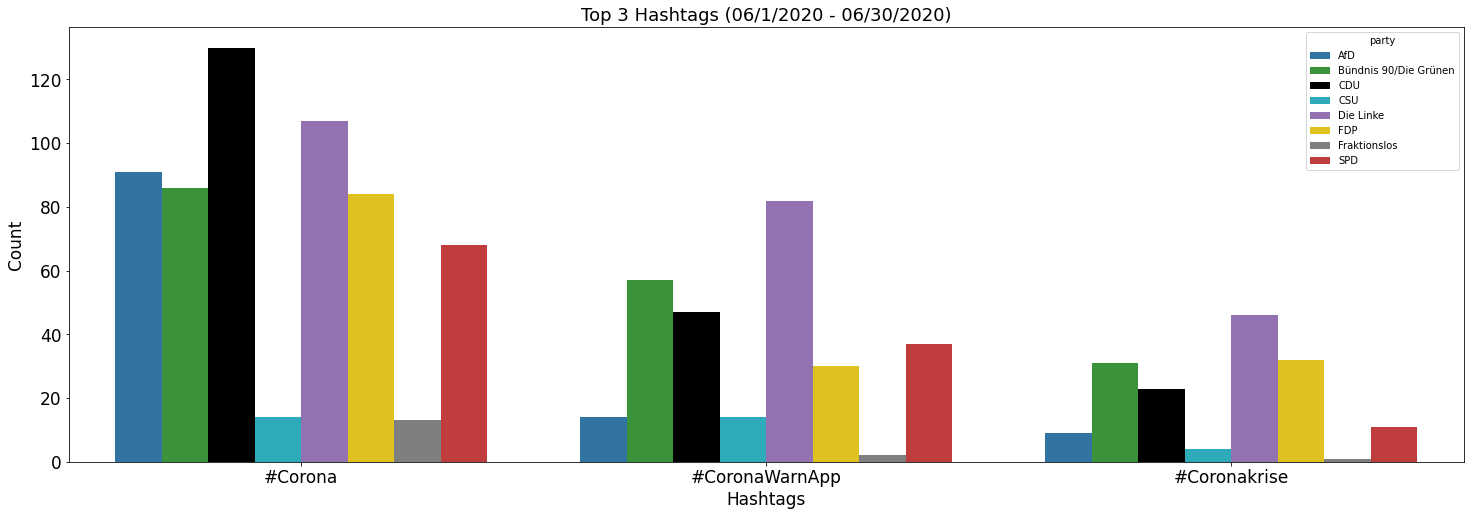

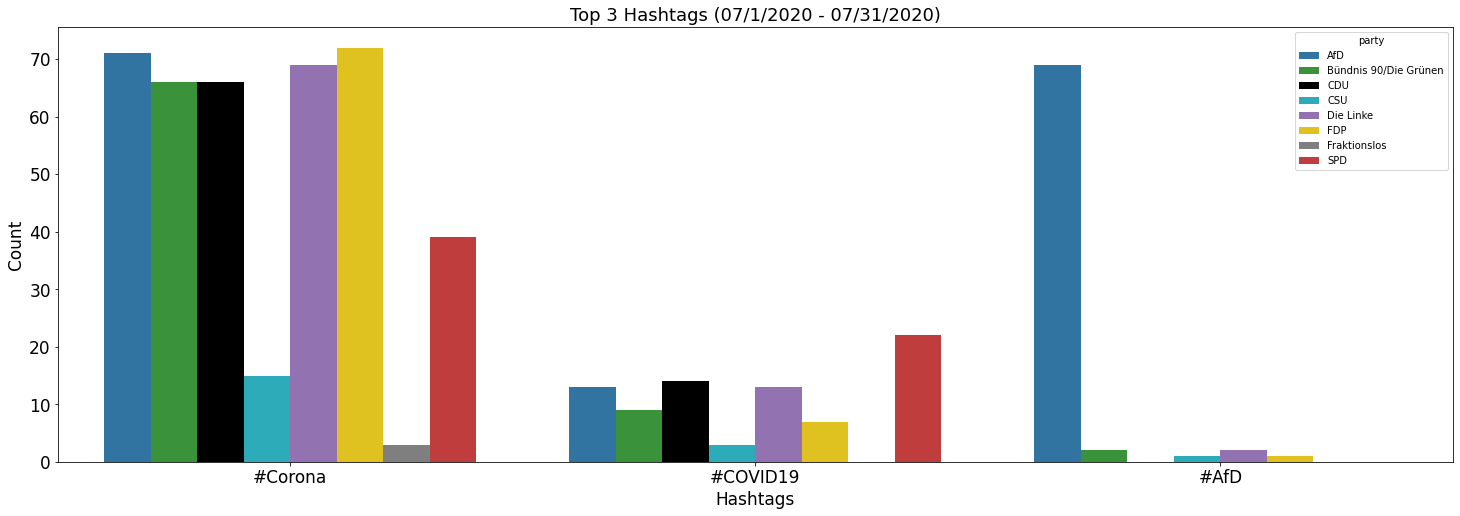

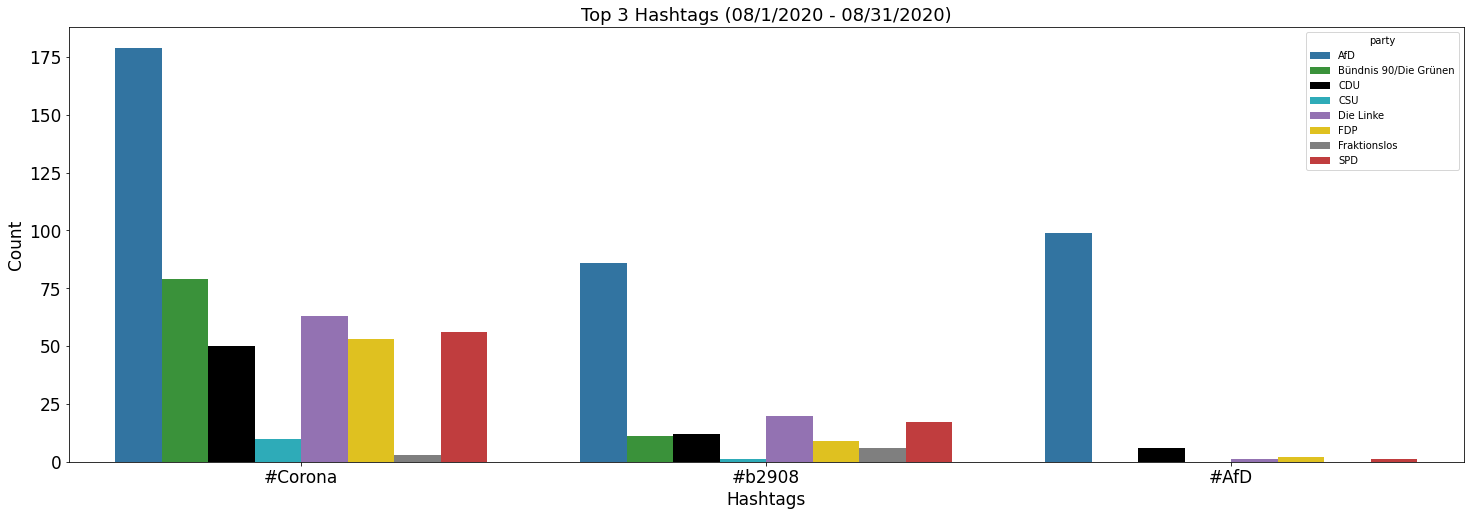

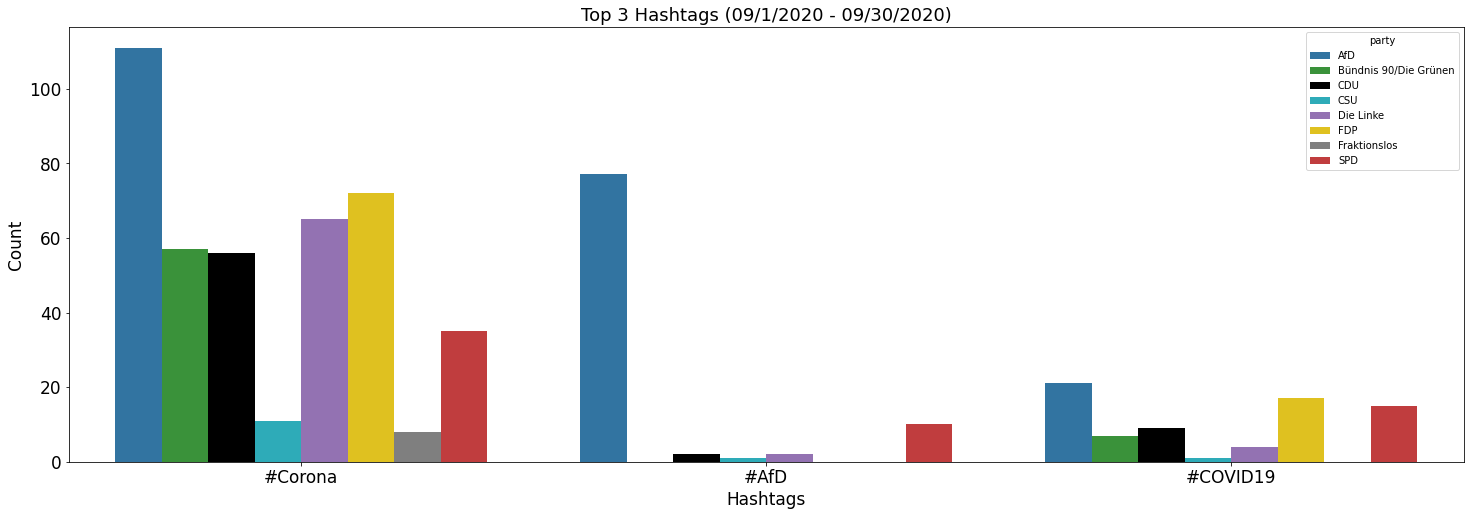

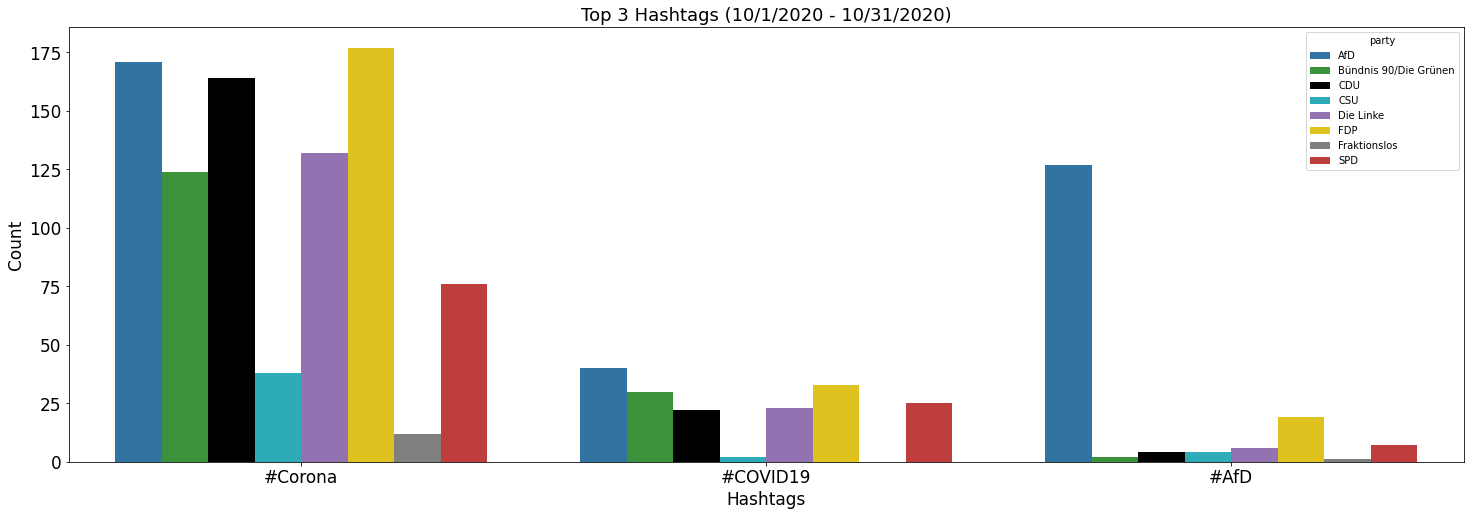

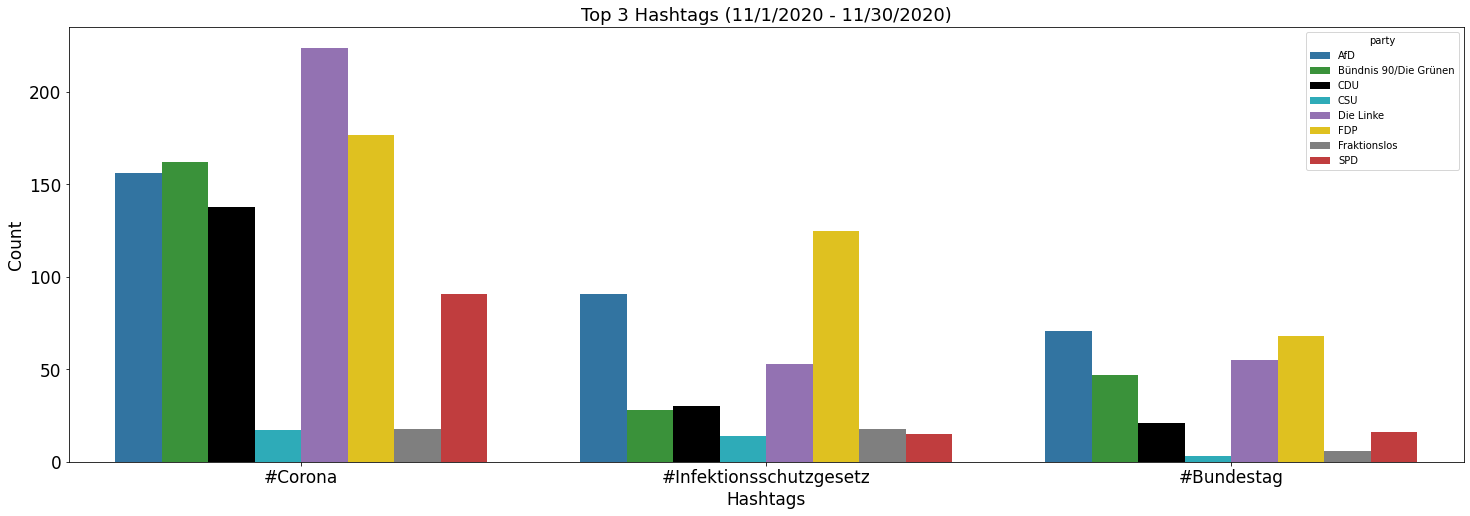

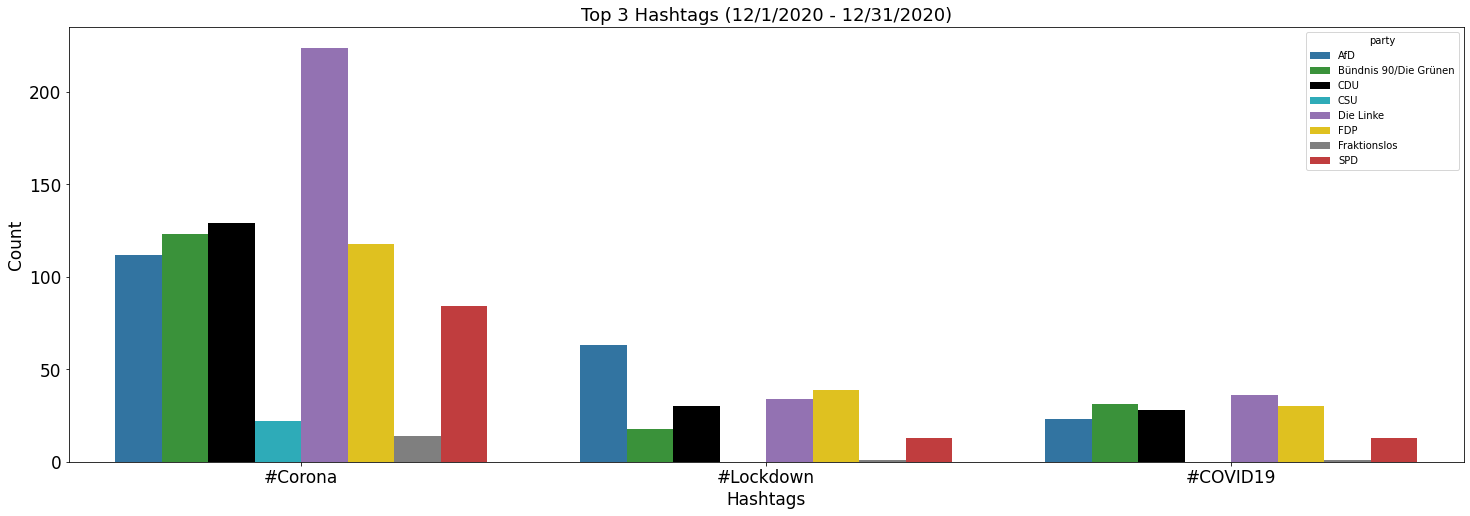

In [53]:
# Covid-Tweets: Top Hashtags used by party throughout the year


df_copy = df.copy()
df_copy = df_copy.drop(['id', 'screen_name', 'name'], axis='columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), True)
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_relevant_columns = df_hashtags_per_month.drop('date', axis='columns')
    top_hashtags = ((df_relevant_columns['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_hashtags_per_party)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
    df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
    data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
    plot = get_plot_parties(data_top_hashtags, dates)
    plt.show()

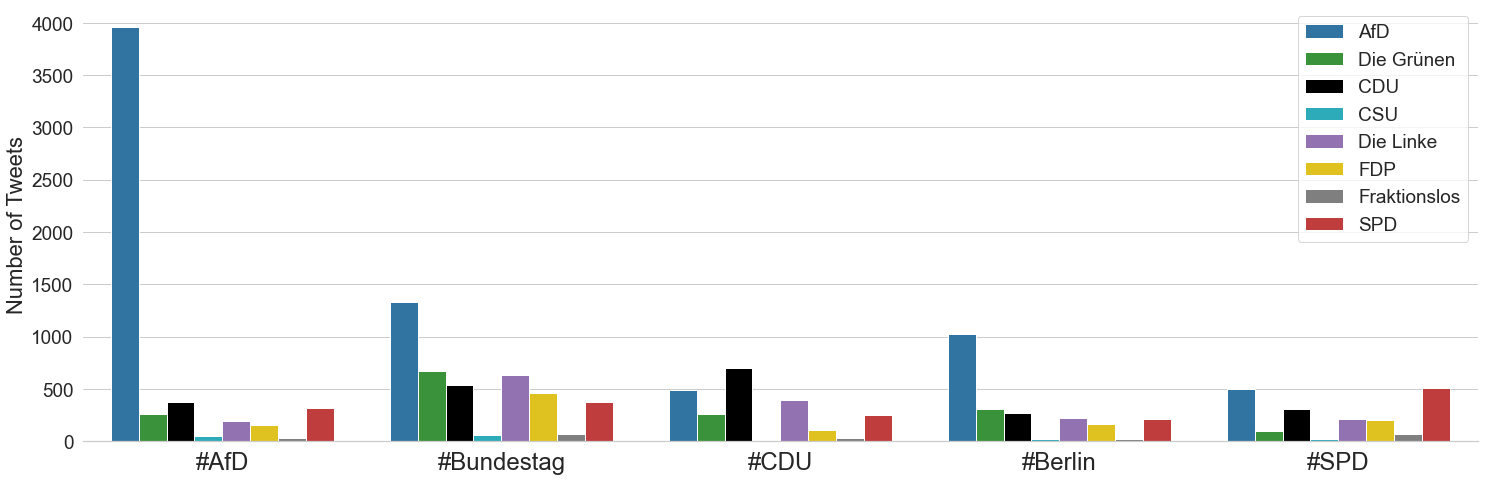

In [40]:
# Non-covid-Tweets: Top Hashtags used by party whole year

df_copy = df_hashtags.copy()
df_copy = df_copy.drop(['id', 'screen_name', 'name', 'date'], axis='columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), False)
top_hashtags = ((df_copy['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_hashtags_per_party)).index.to_list()
df_relevant_columns = df_copy.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
plt = plot_for_appendix(data_top_hashtags)
plt.show()

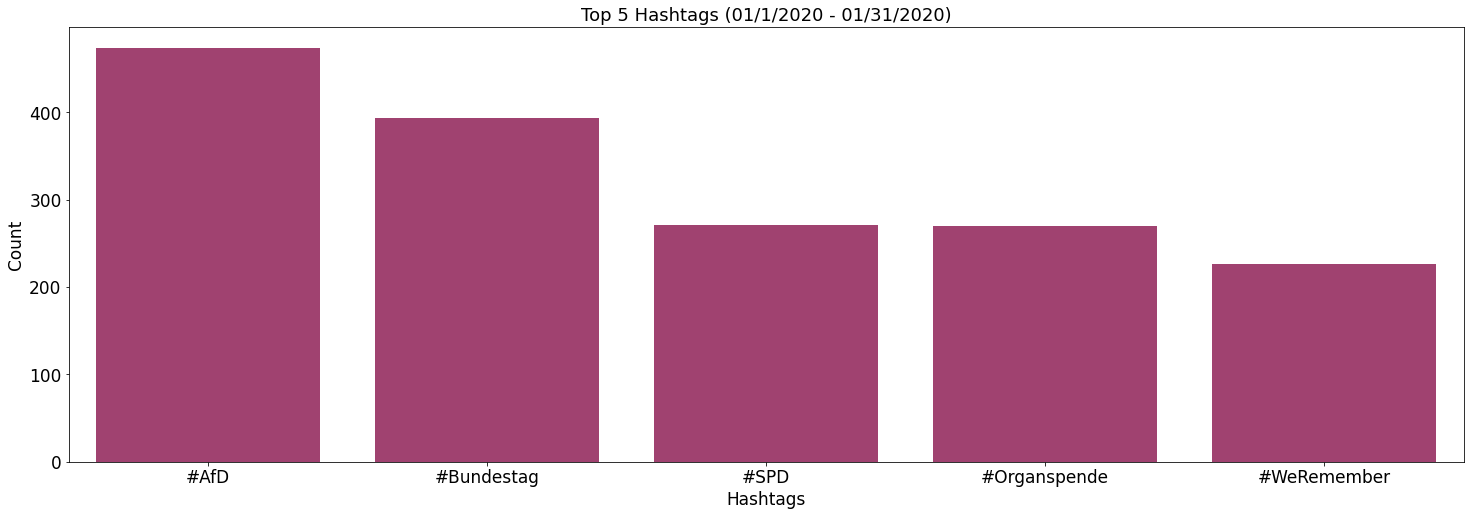

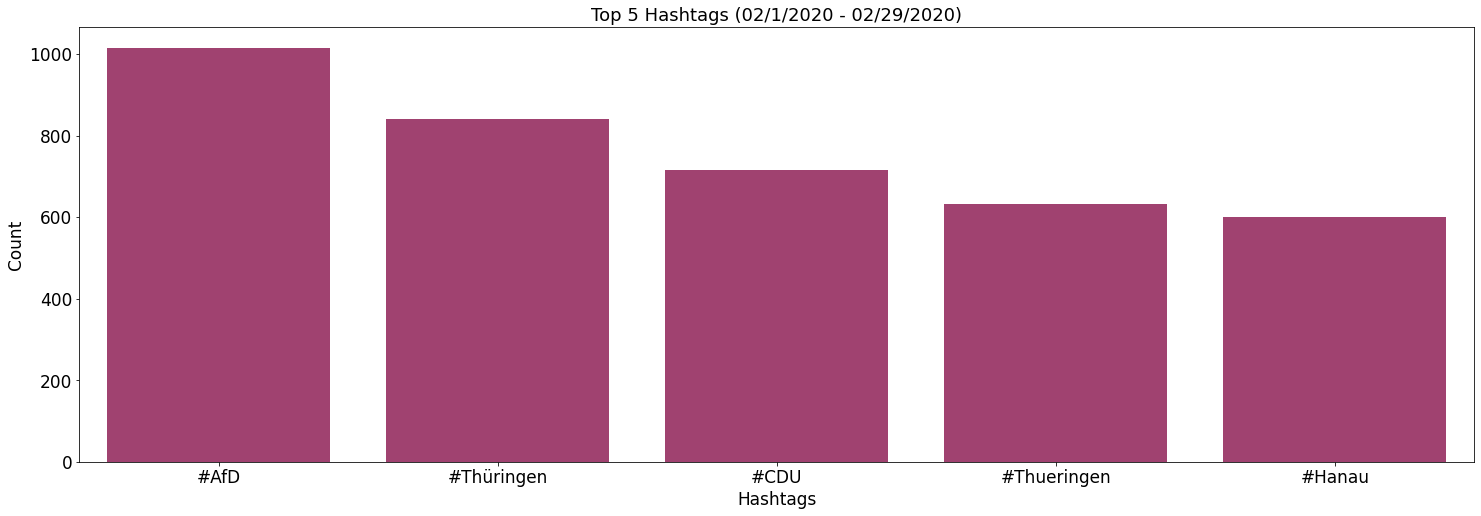

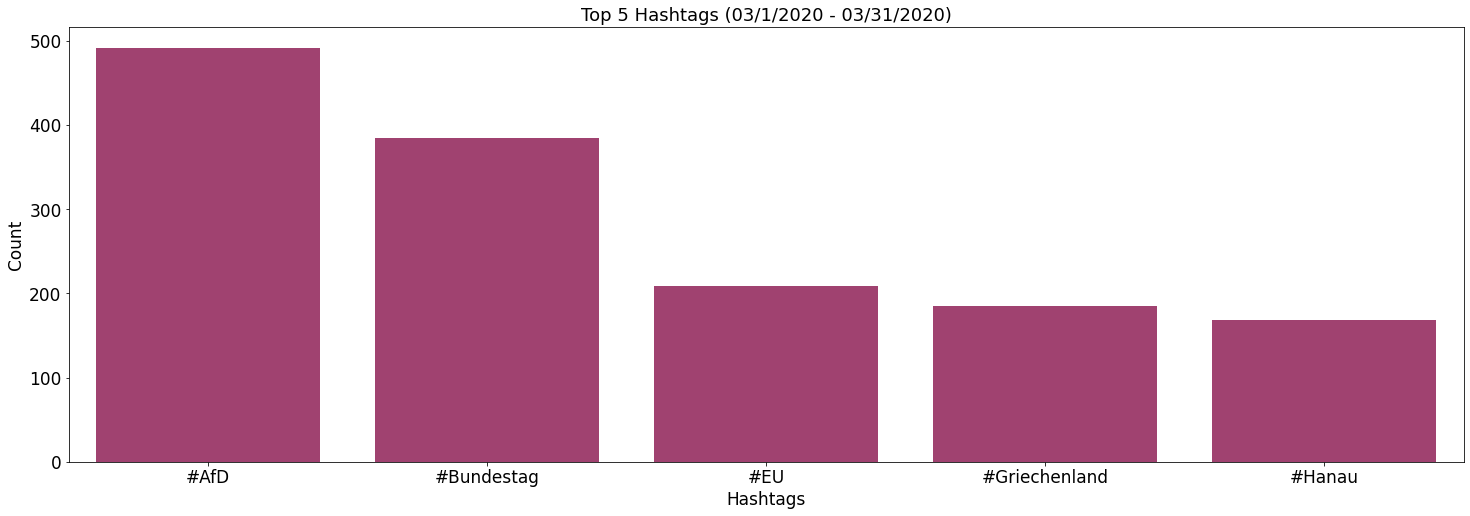

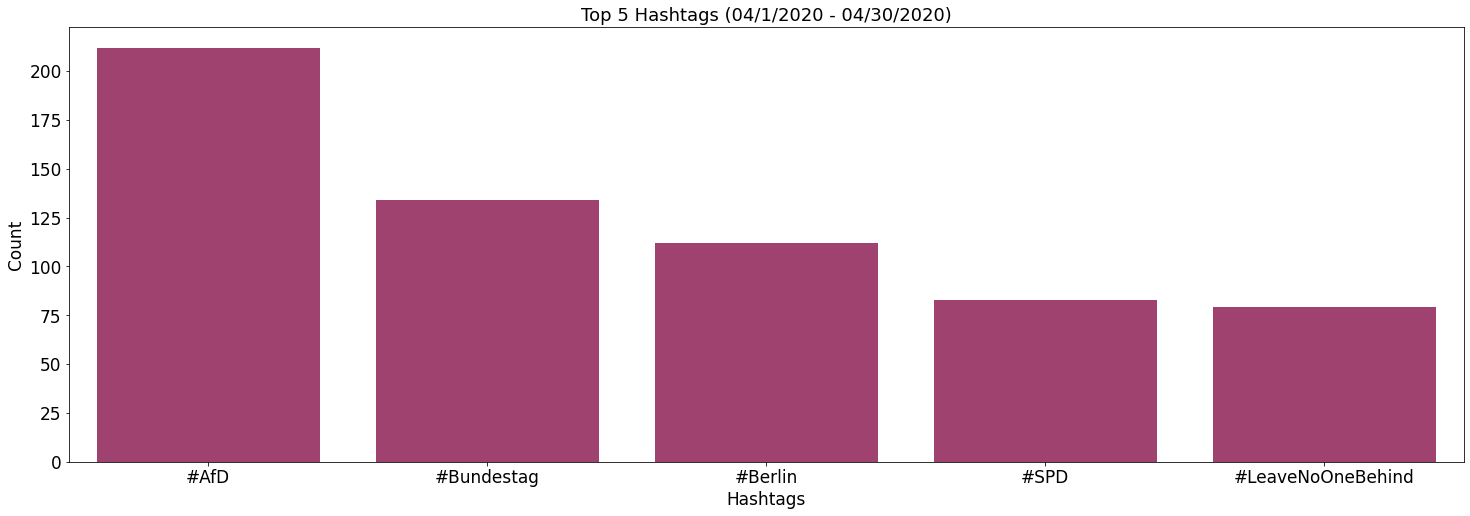

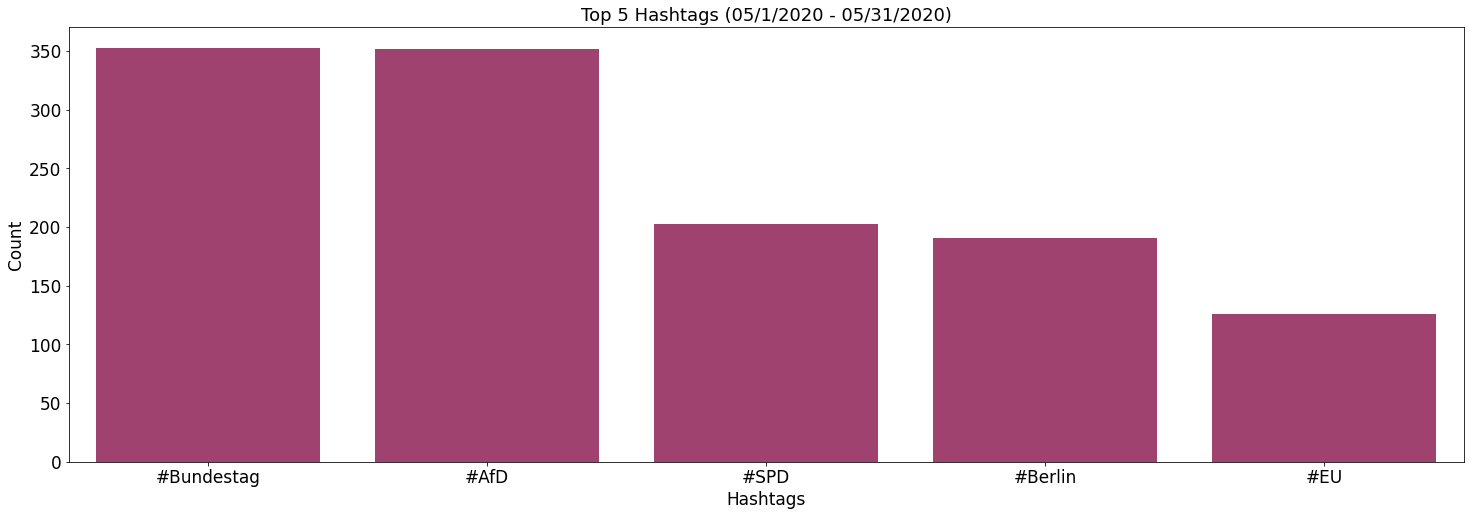

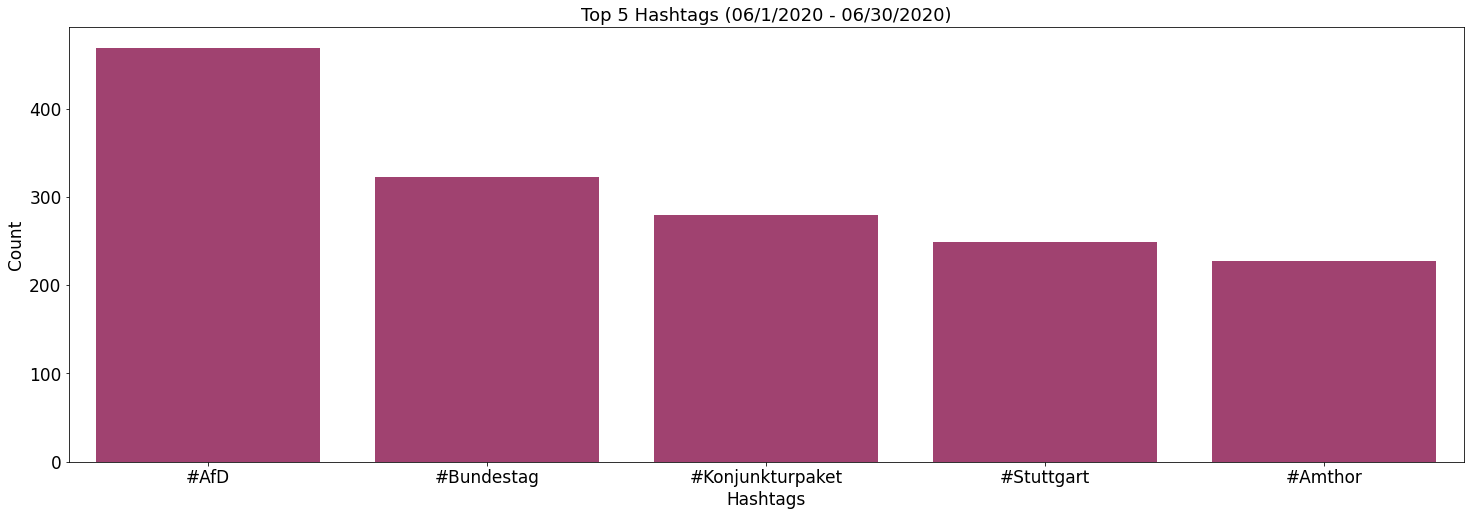

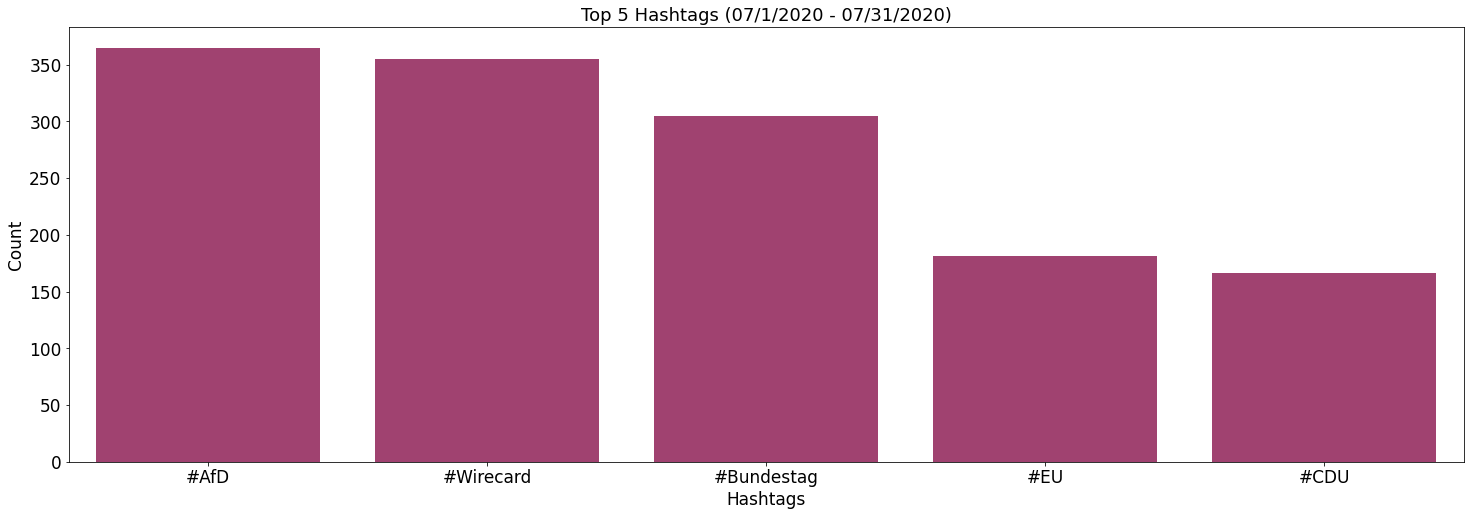

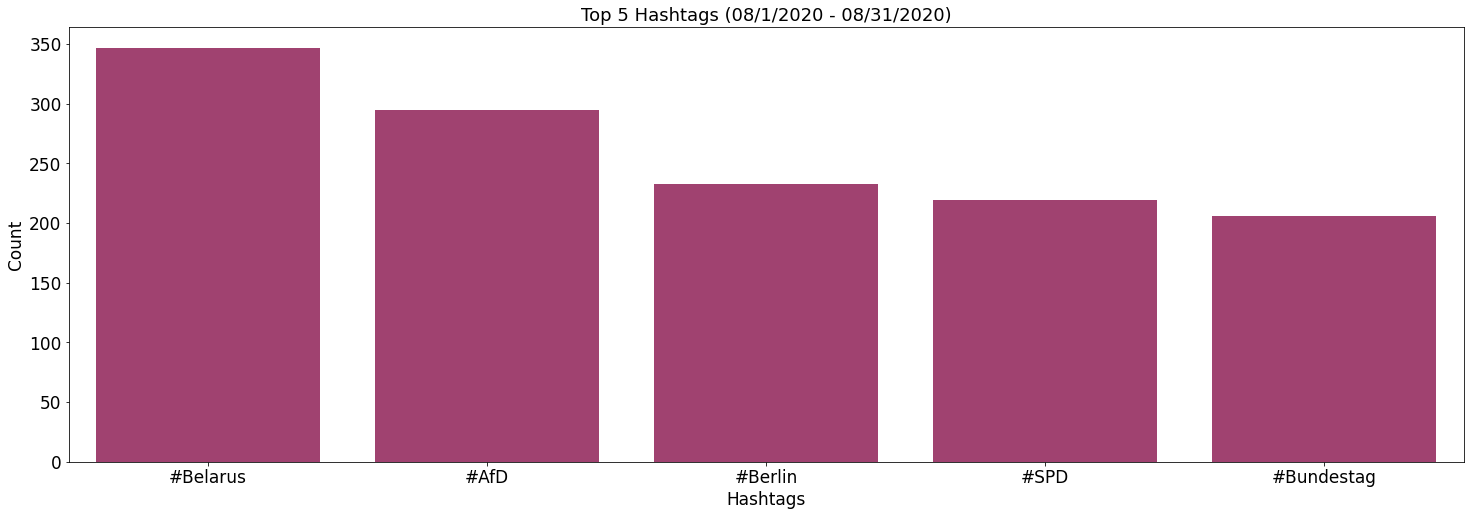

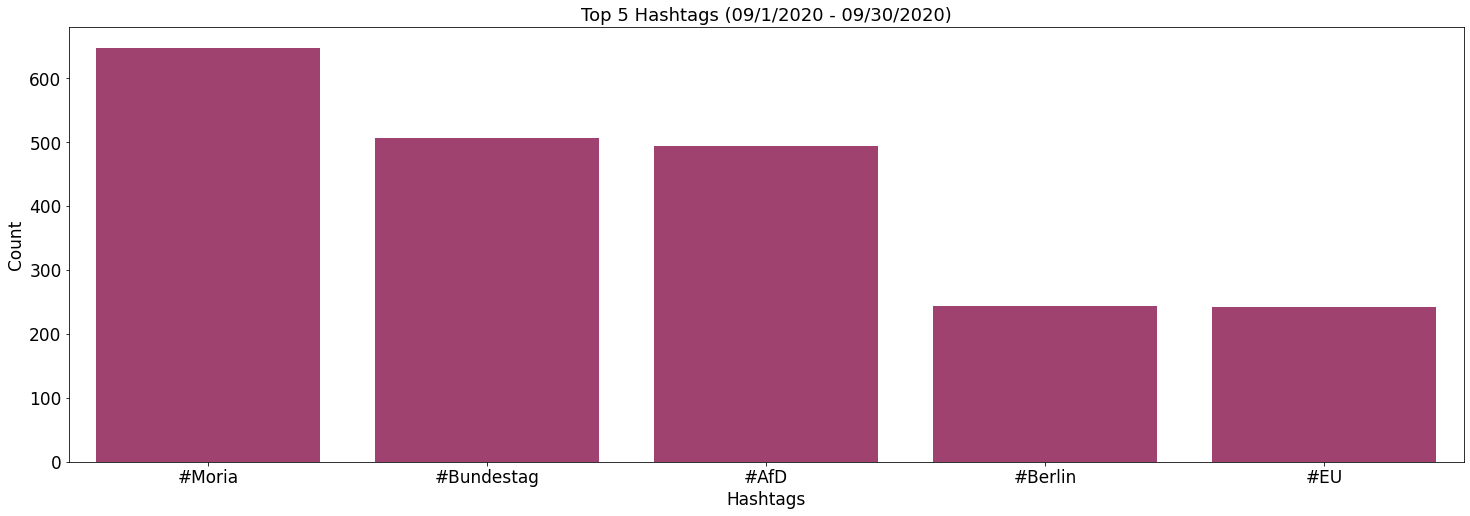

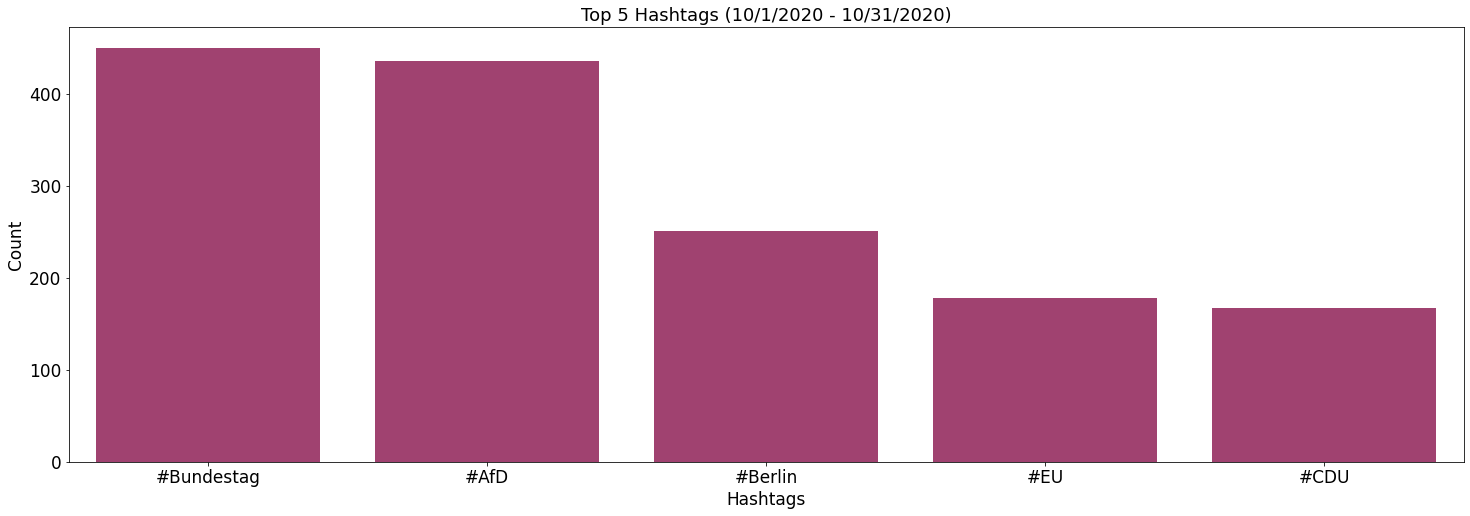

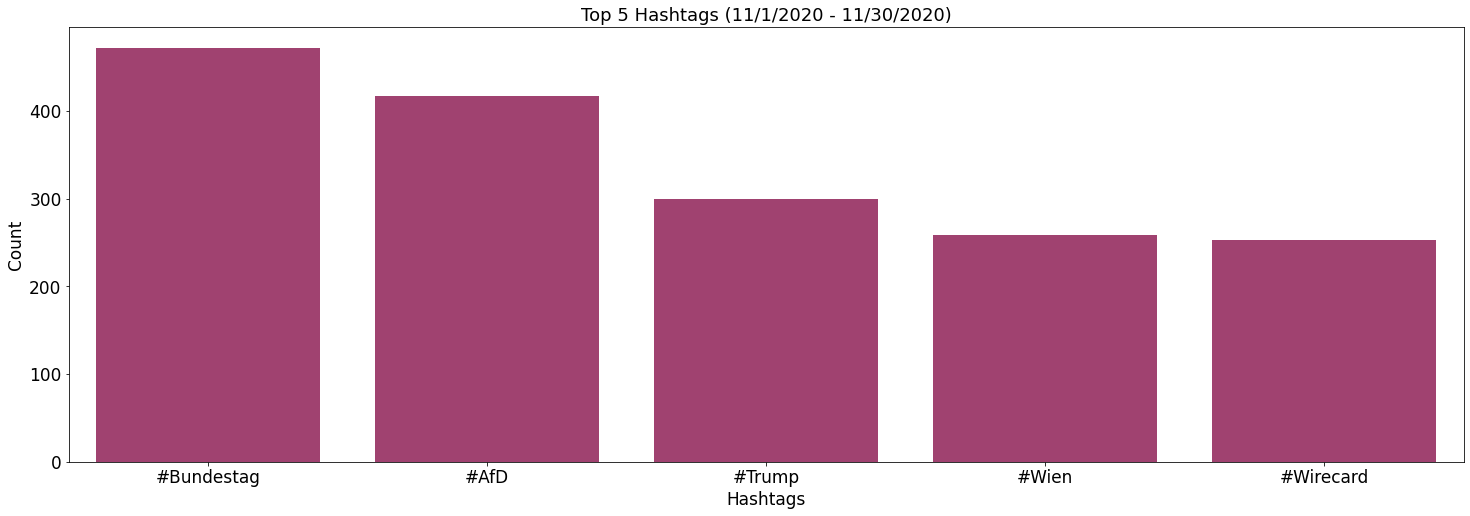

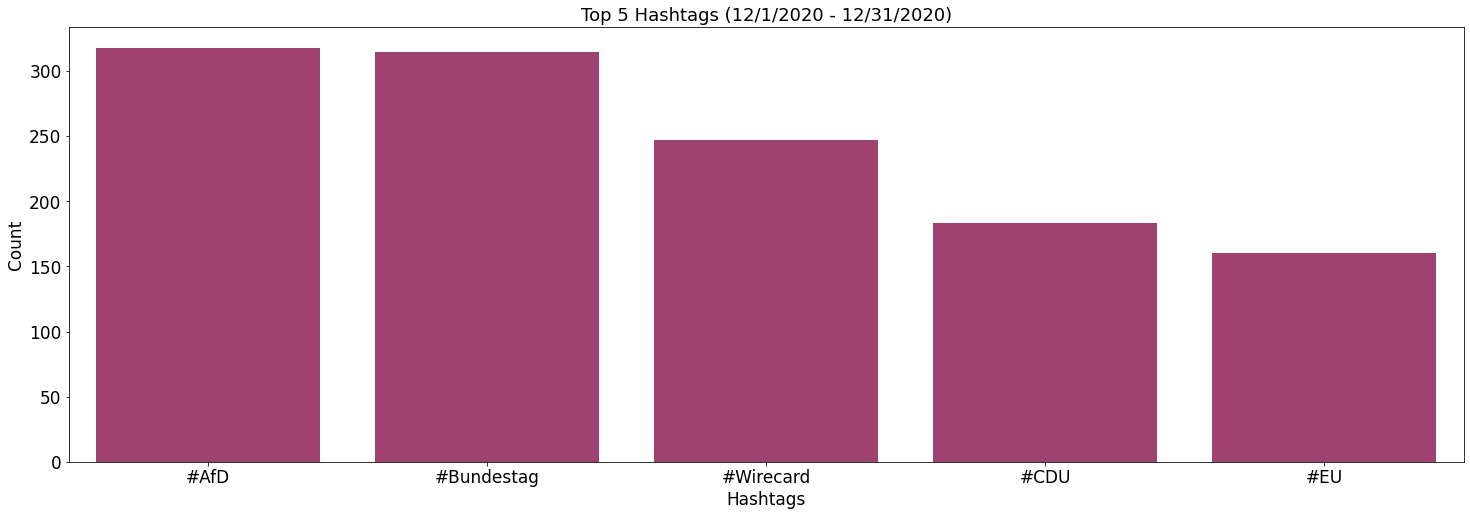

In [36]:
# Non-covid-Tweets: Top Hashtags throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), False)
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_top_hashtags = (df_hashtags_per_month['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)
    plot = get_plot(df_top_hashtags, dates)
    plt.show()

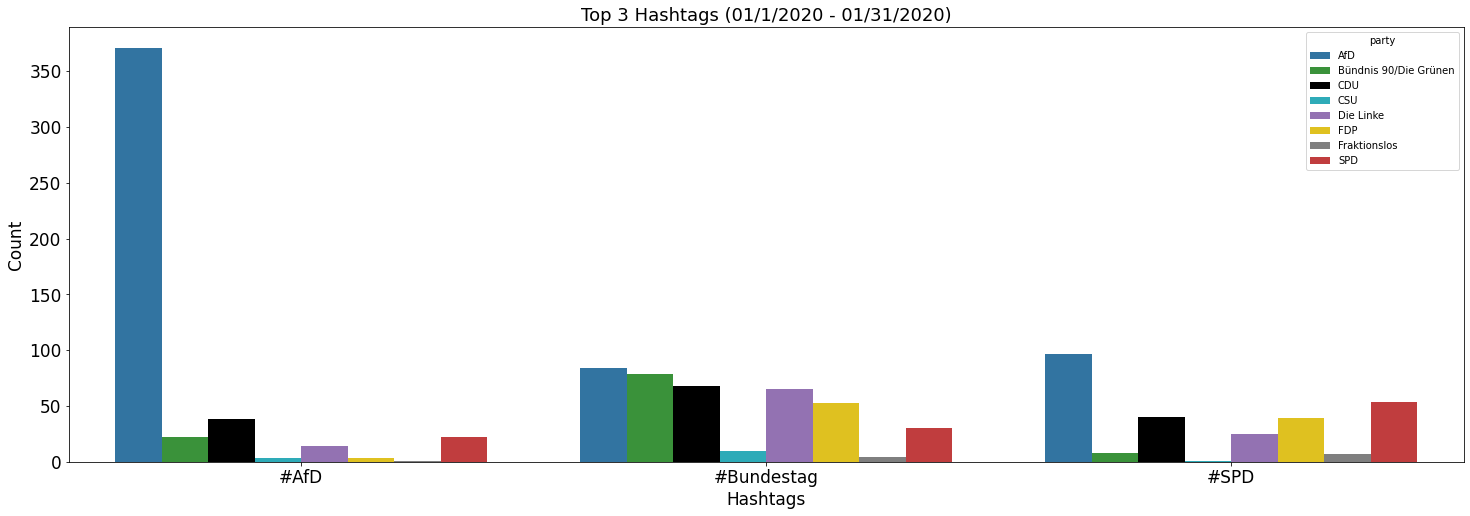

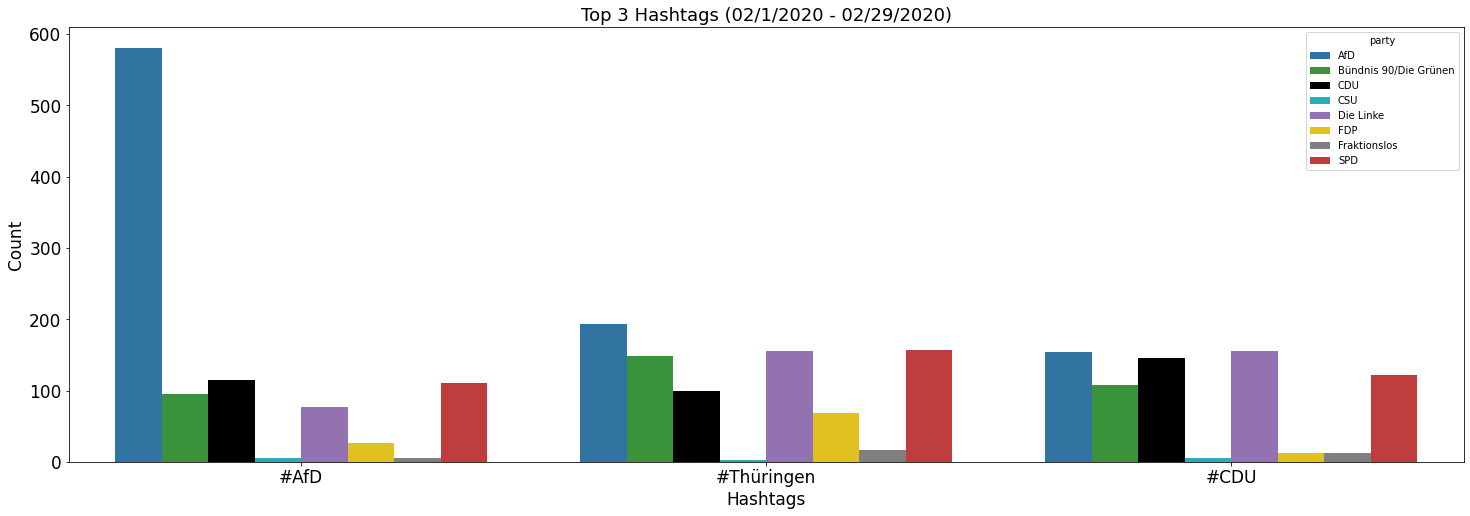

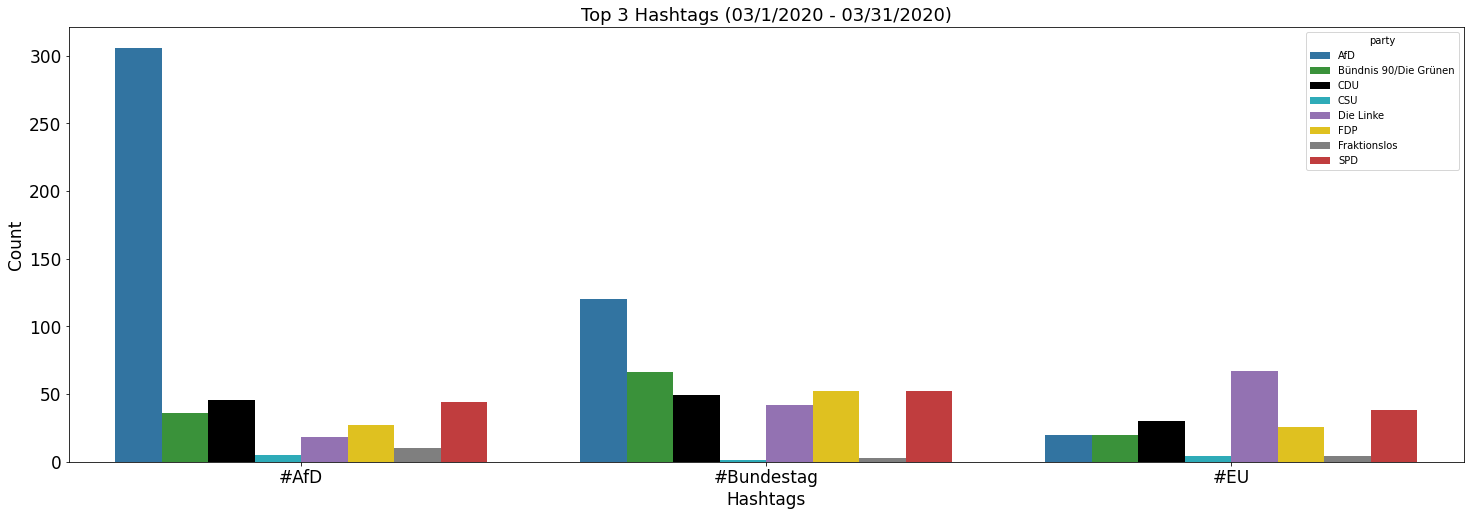

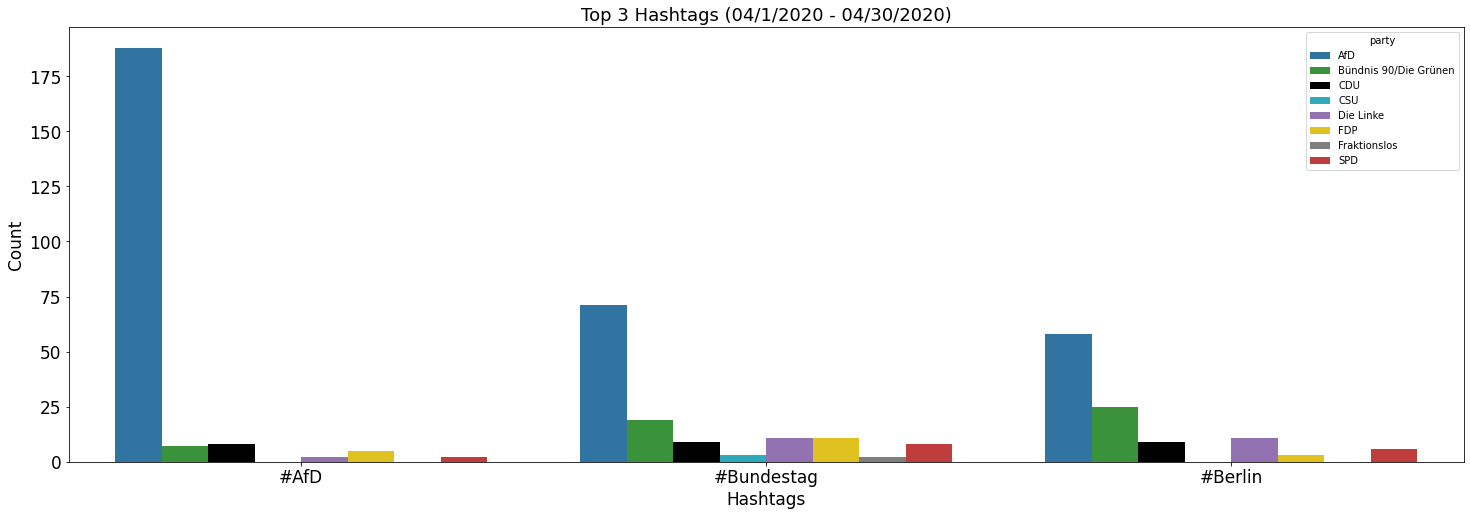

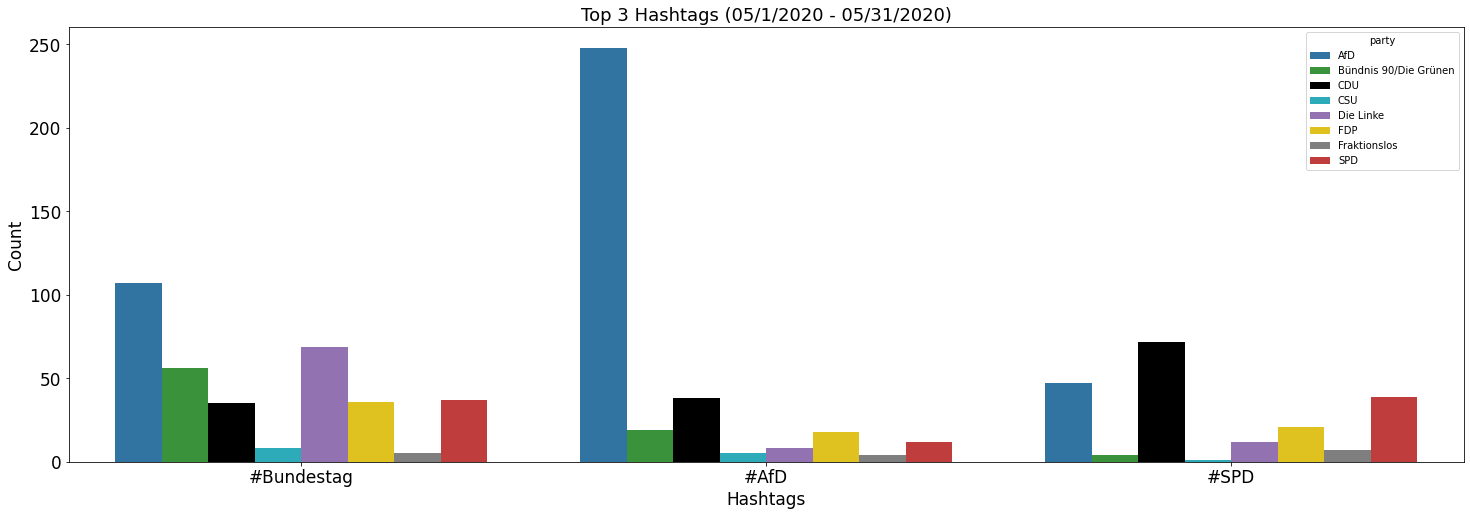

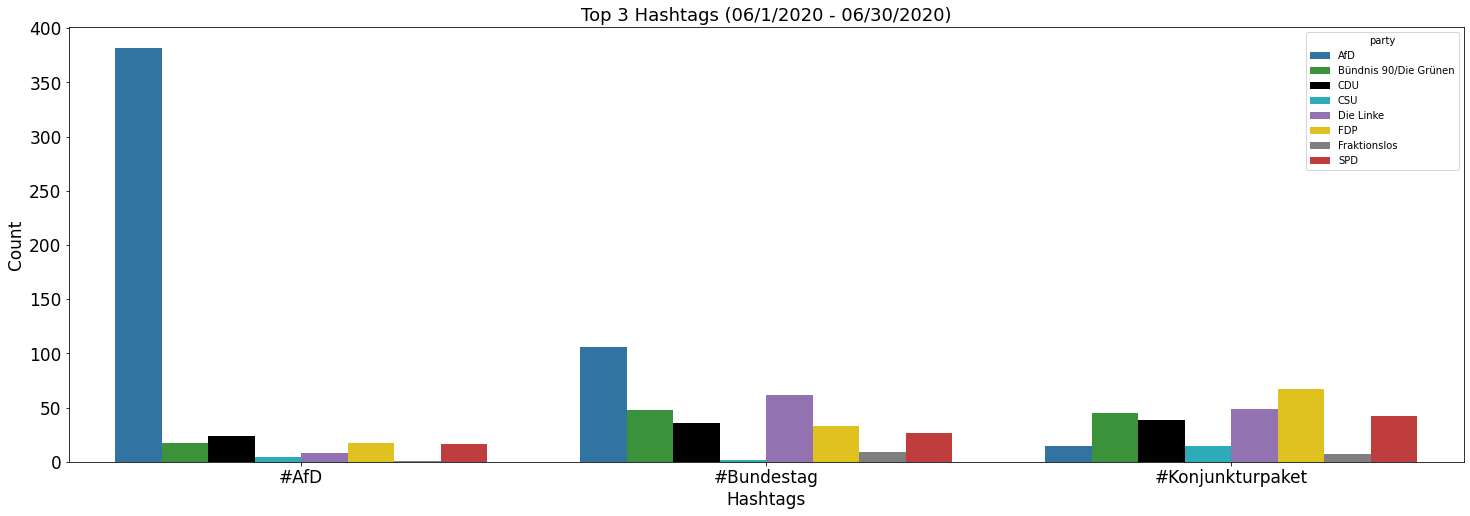

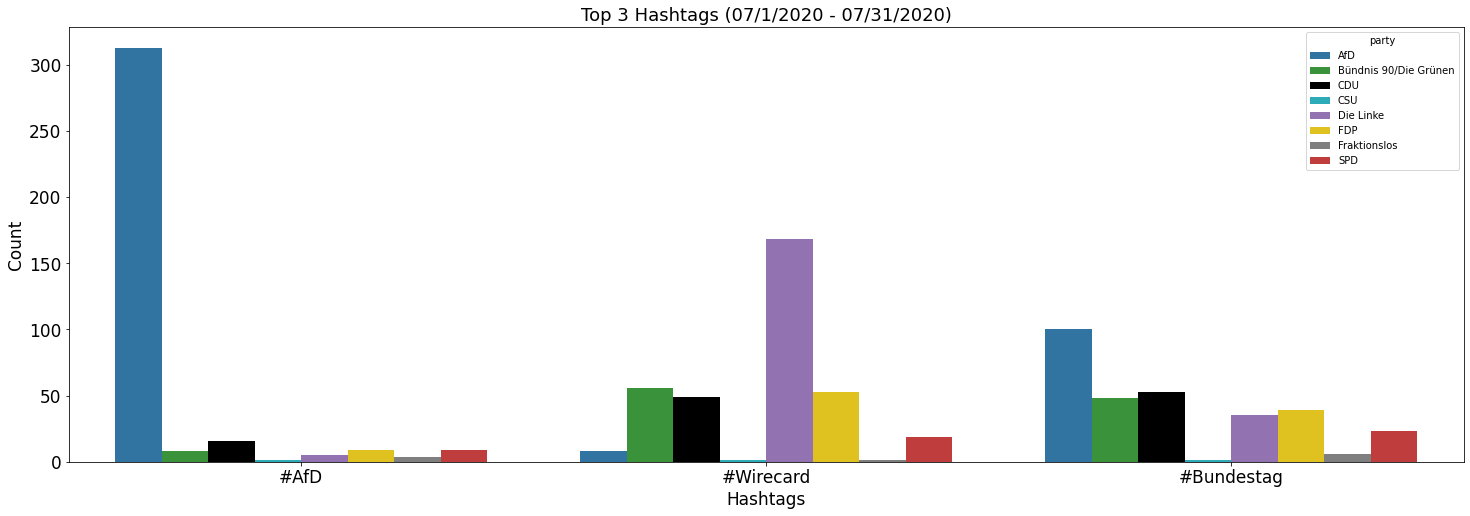

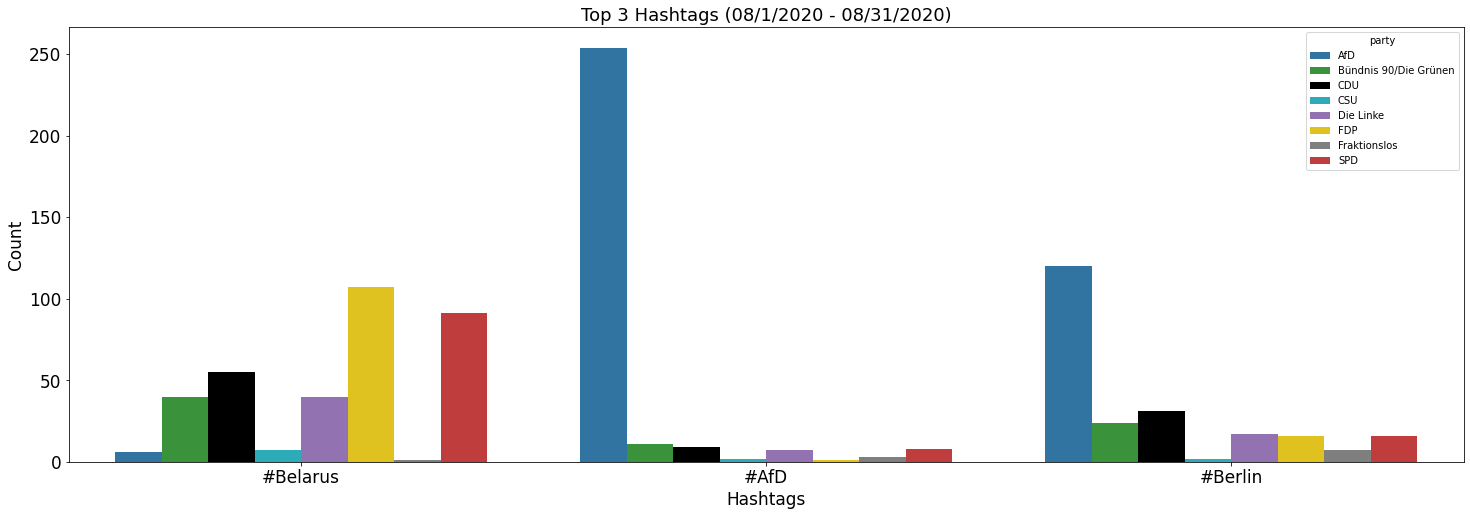

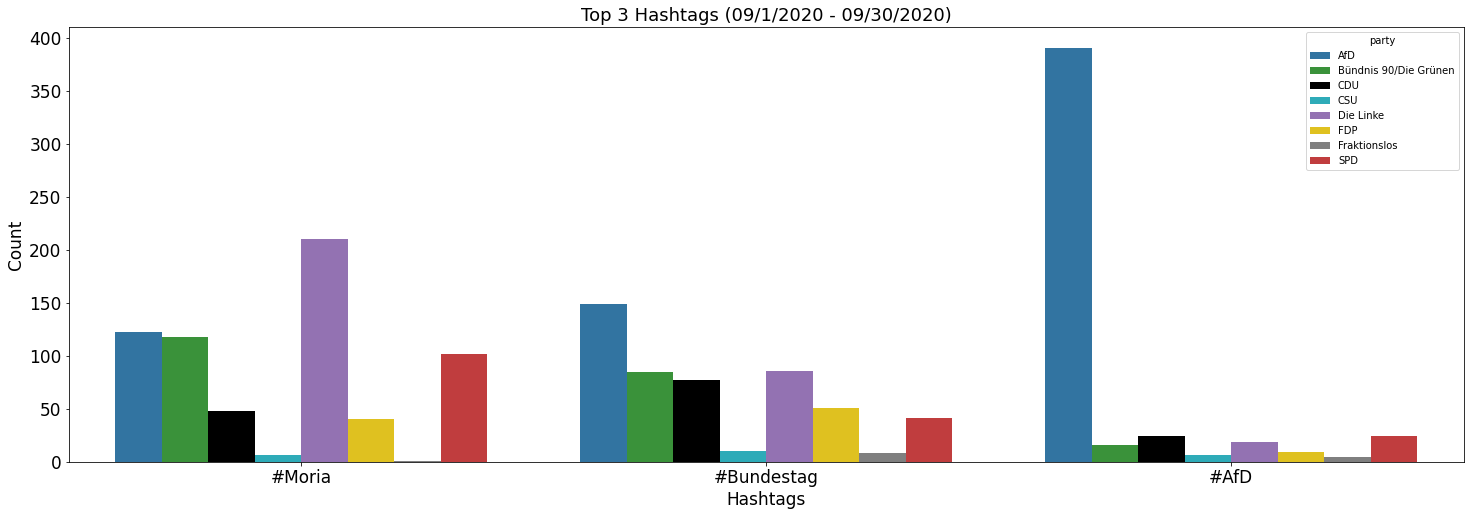

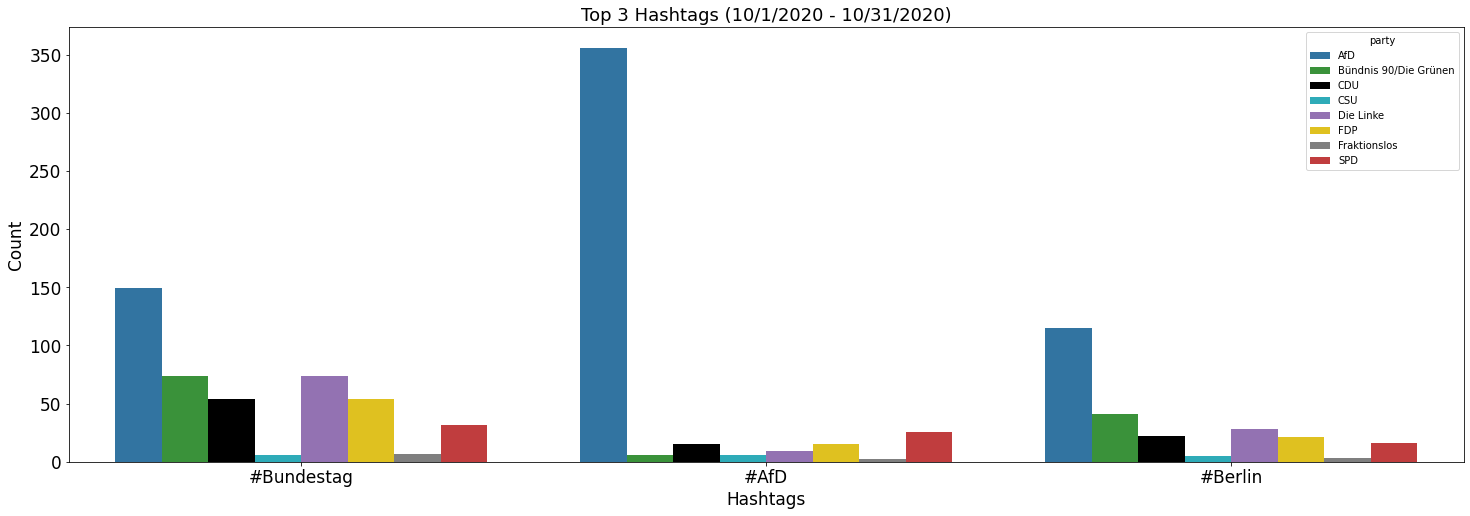

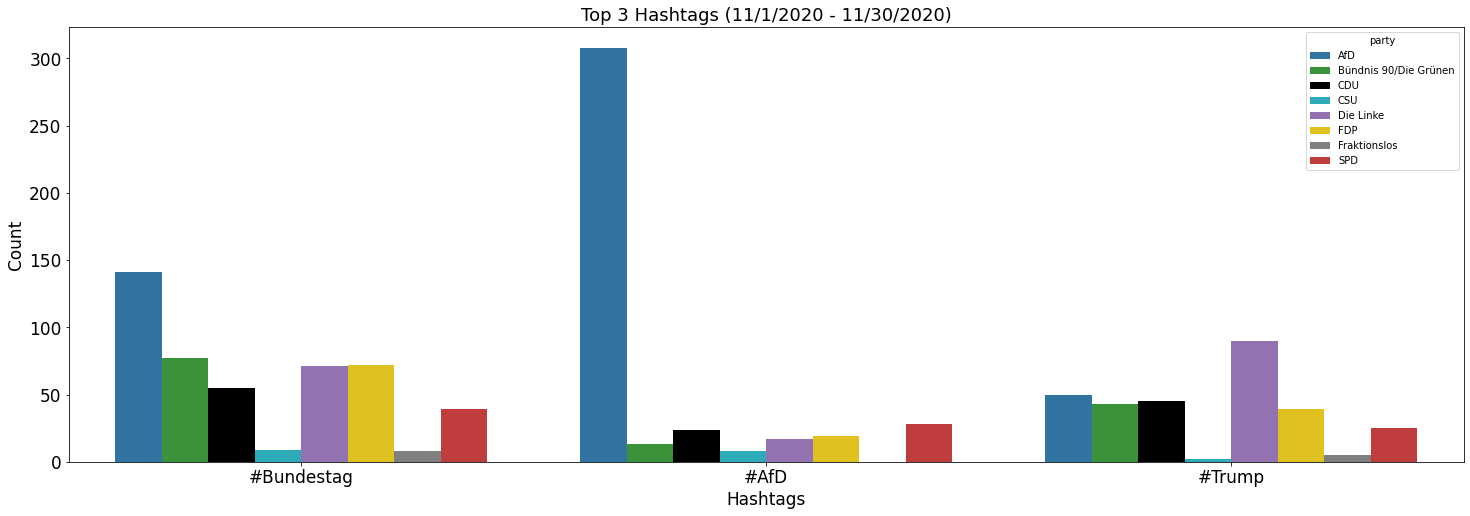

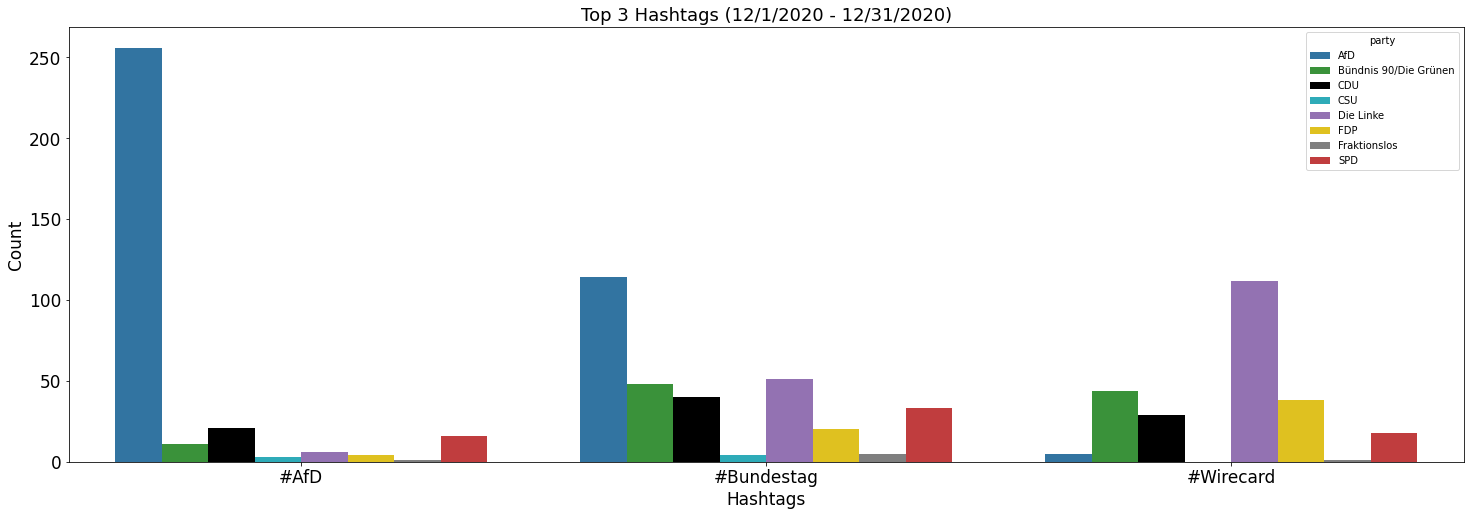

In [37]:
# Non-Covid-Tweets: Top Hashtags used by party throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'screen_name', 'name'], axis='columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), False)
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_relevant_columns = df_hashtags_per_month.drop('date', axis='columns')
    top_hashtags = ((df_relevant_columns['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_hashtags_per_party)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
    df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
    data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
    plot = get_plot_parties(data_top_hashtags, dates)
    plt.show()

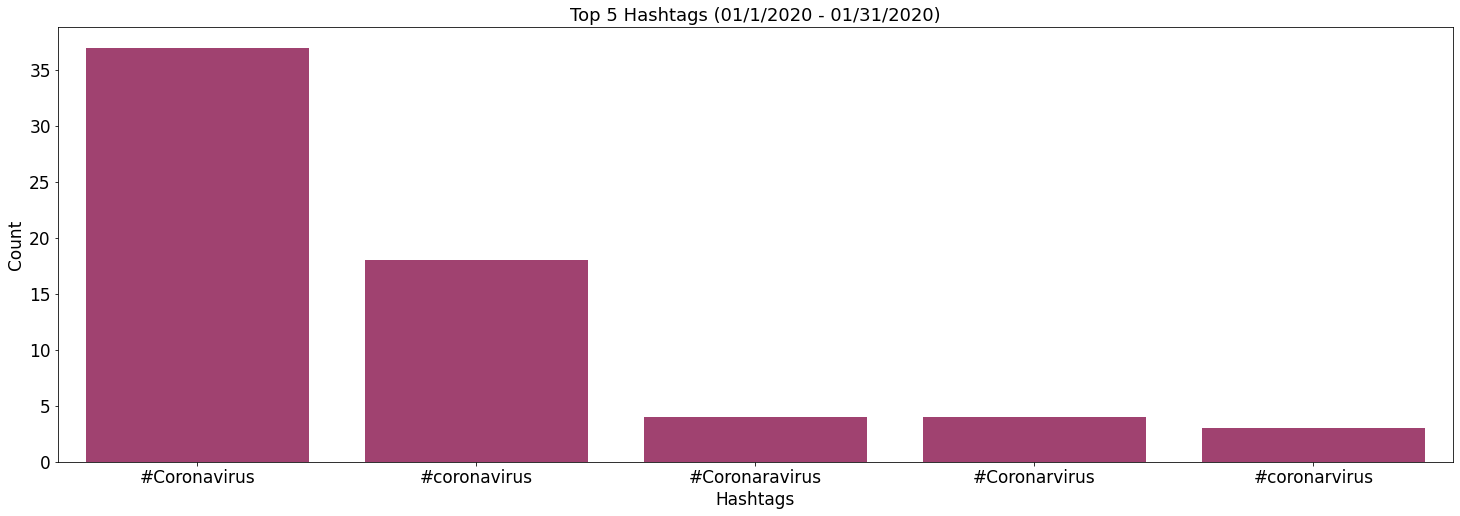

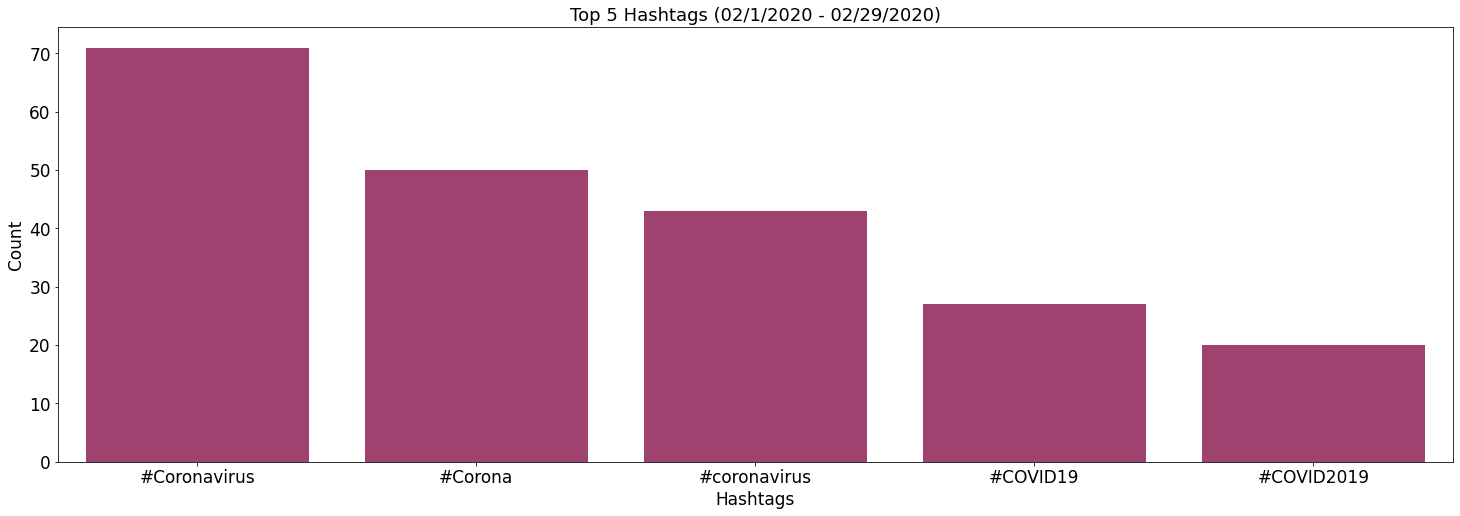

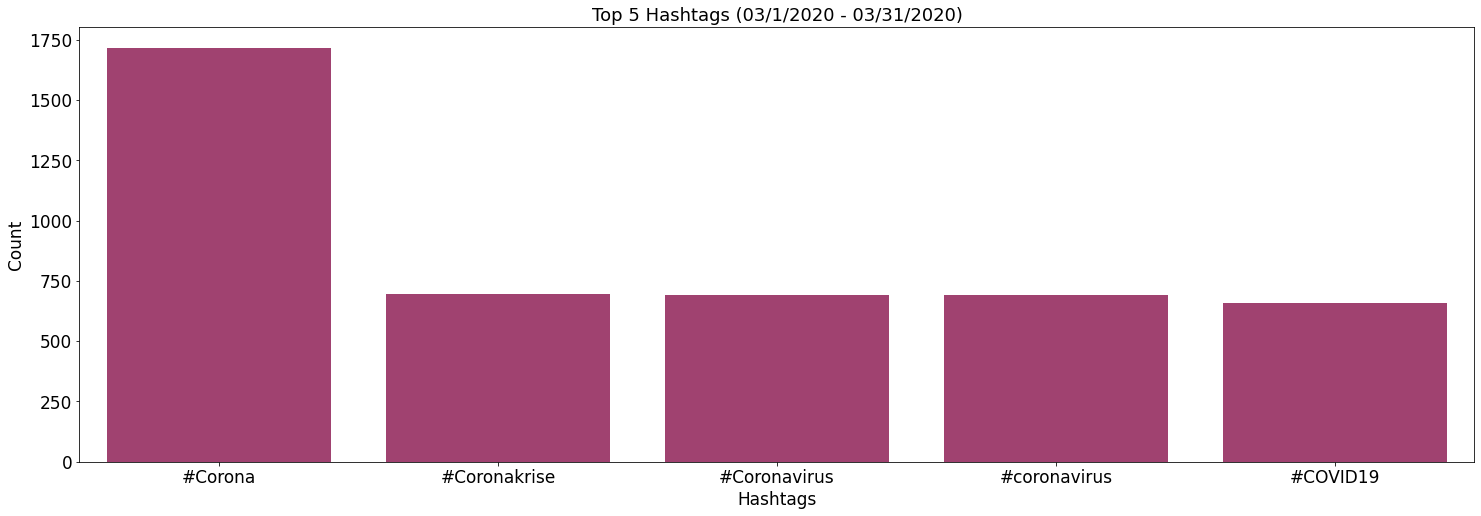

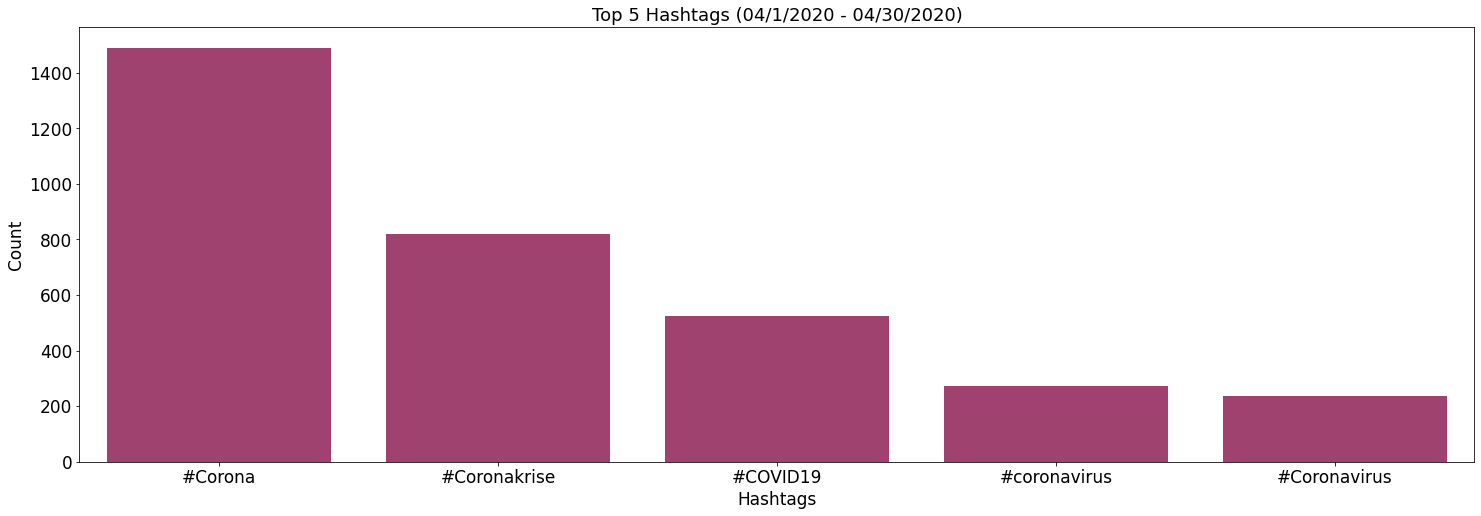

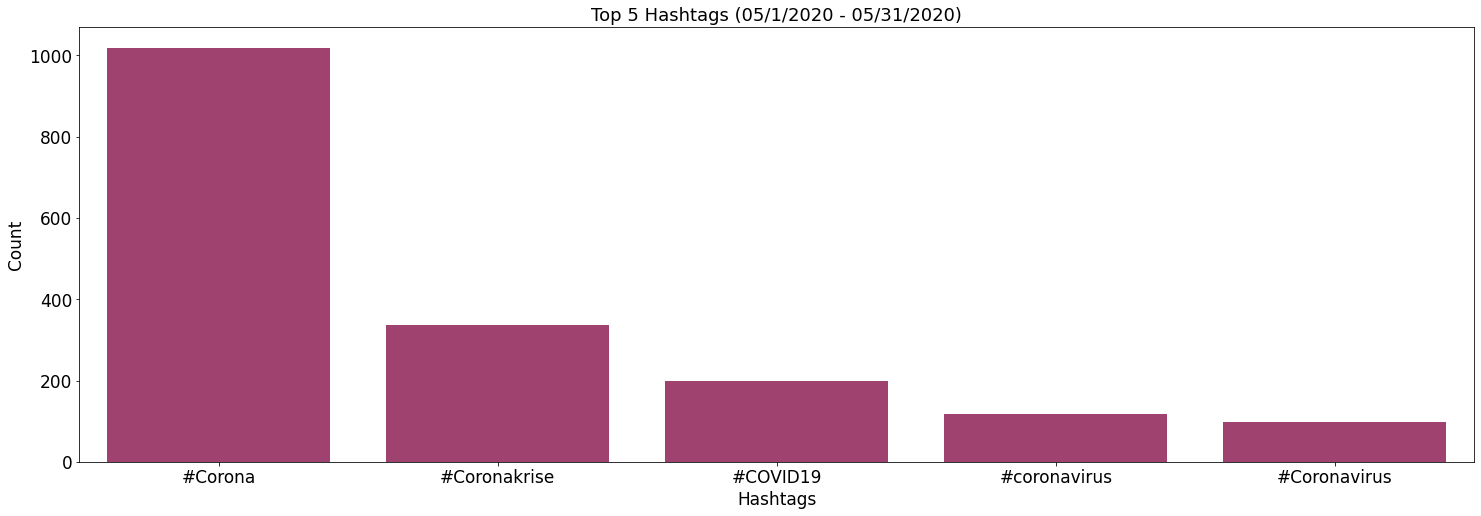

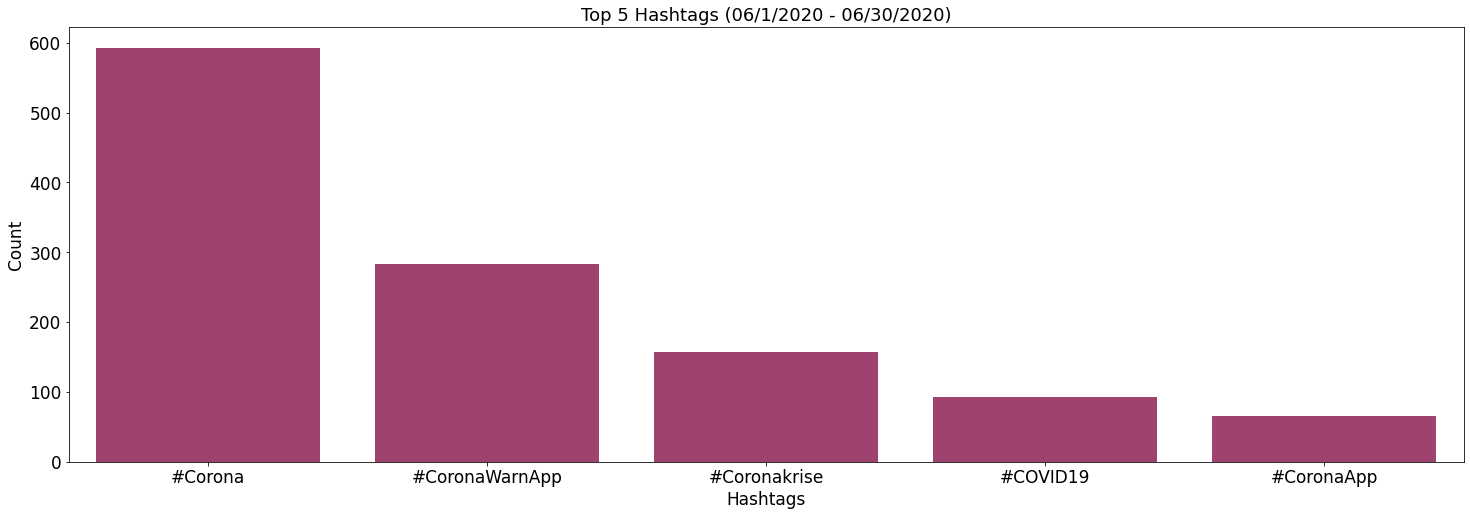

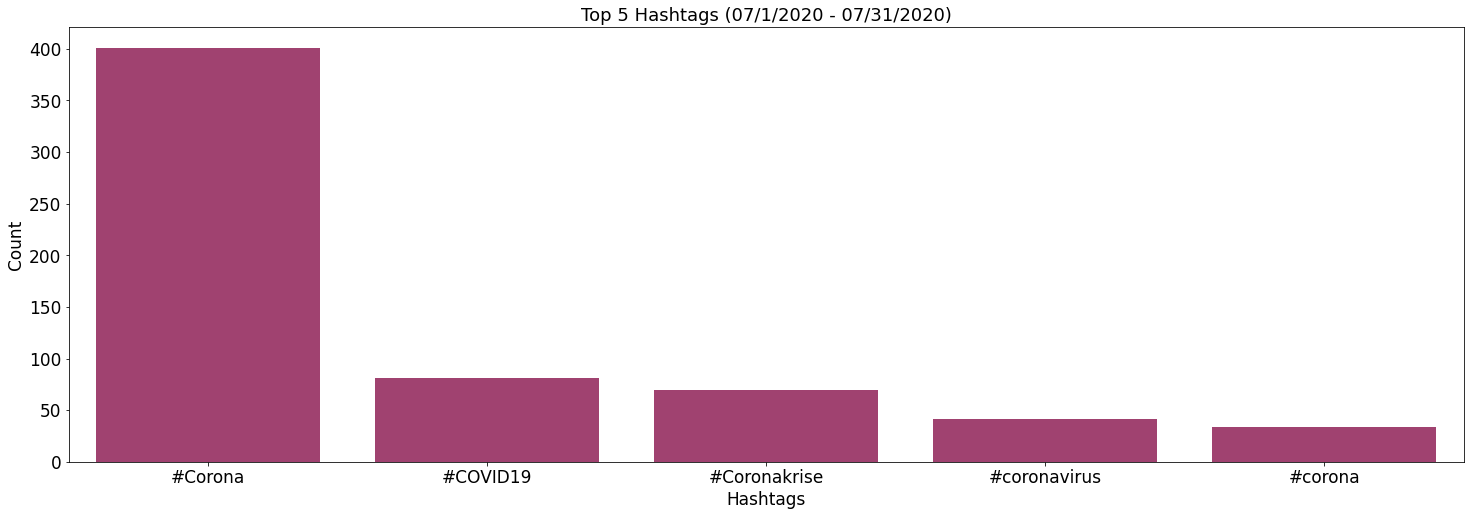

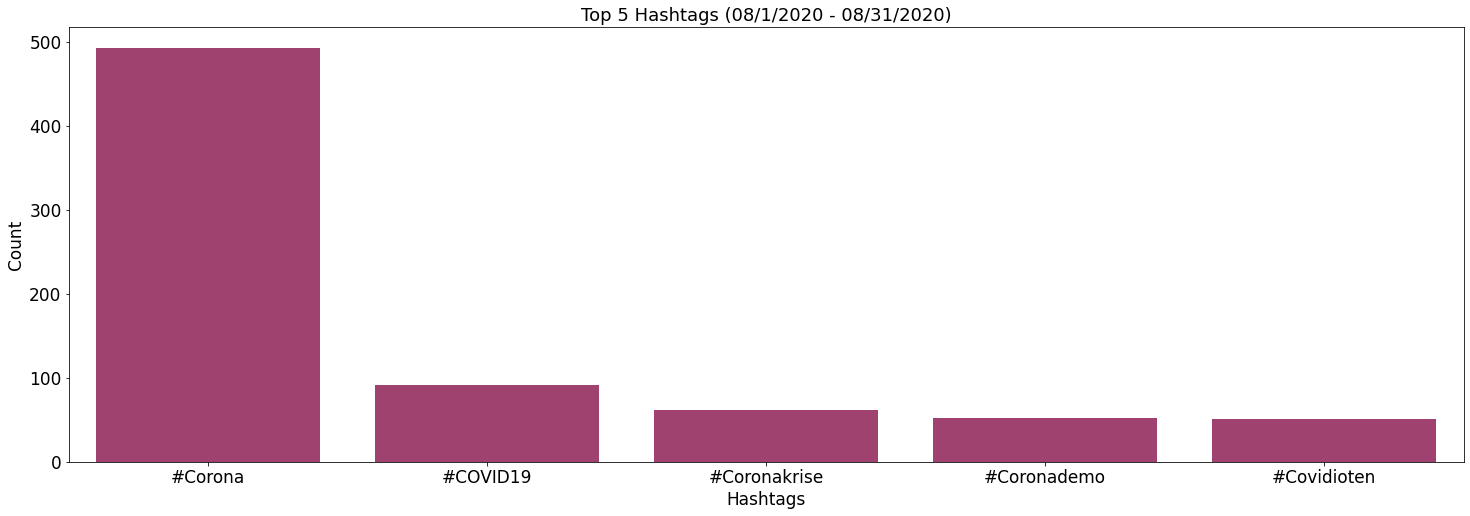

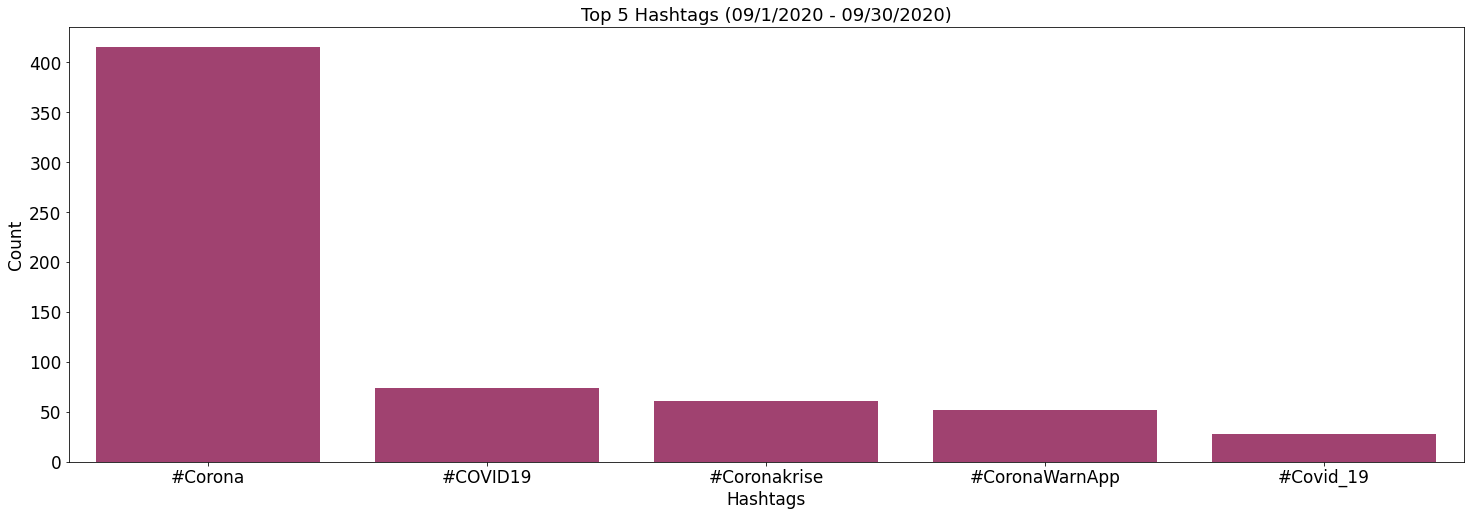

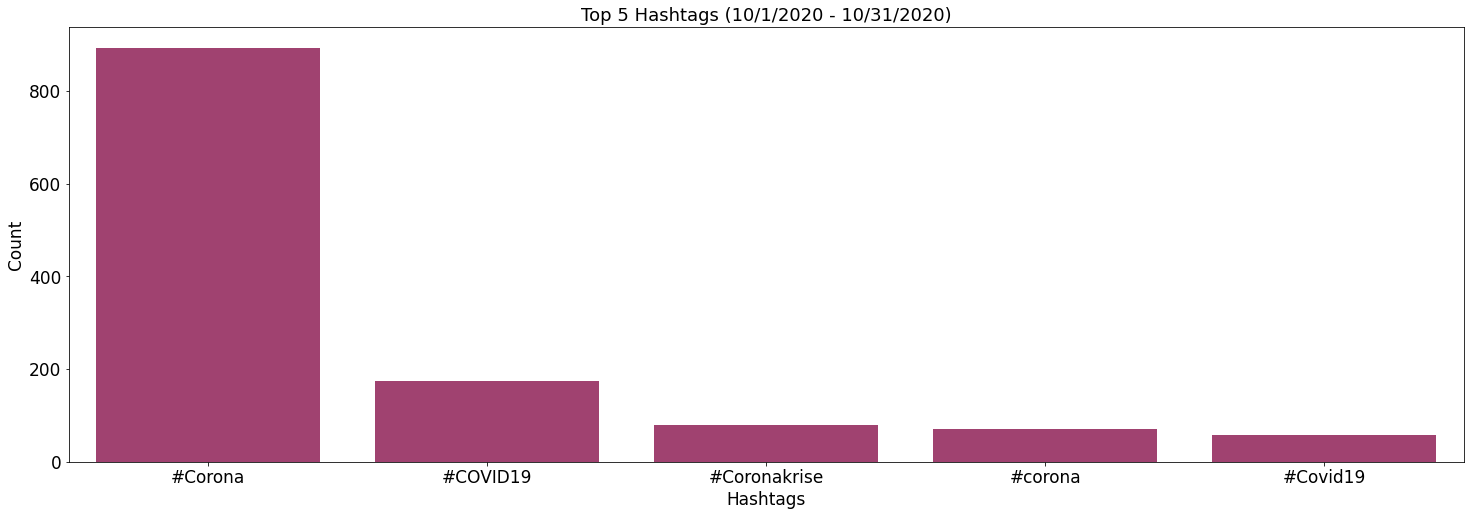

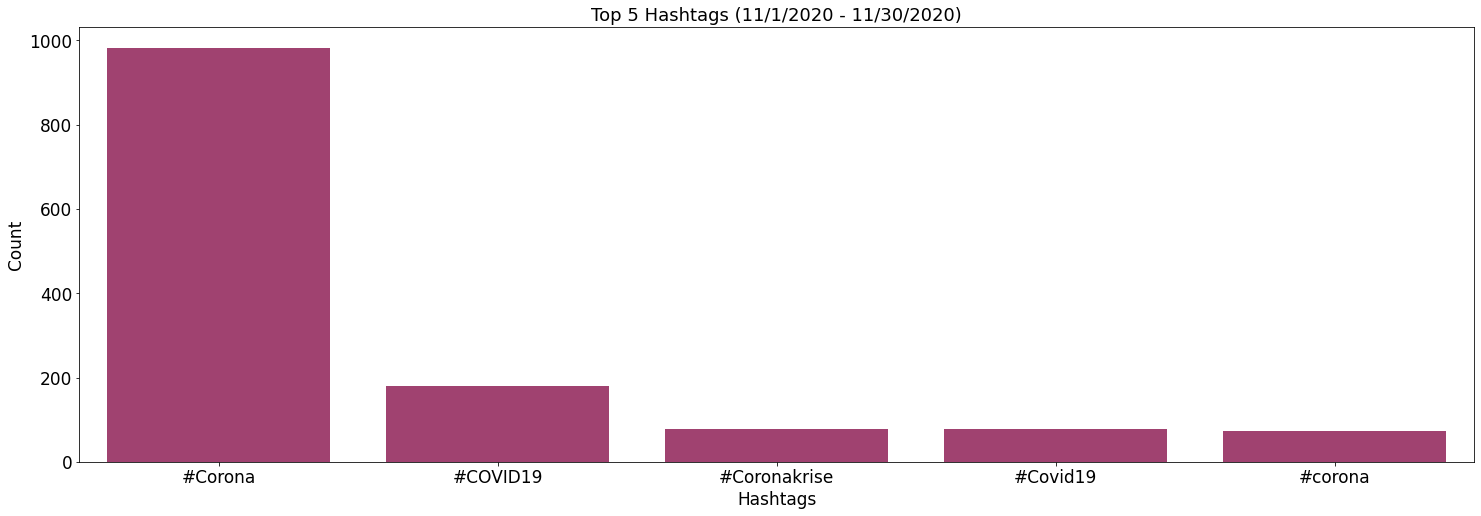

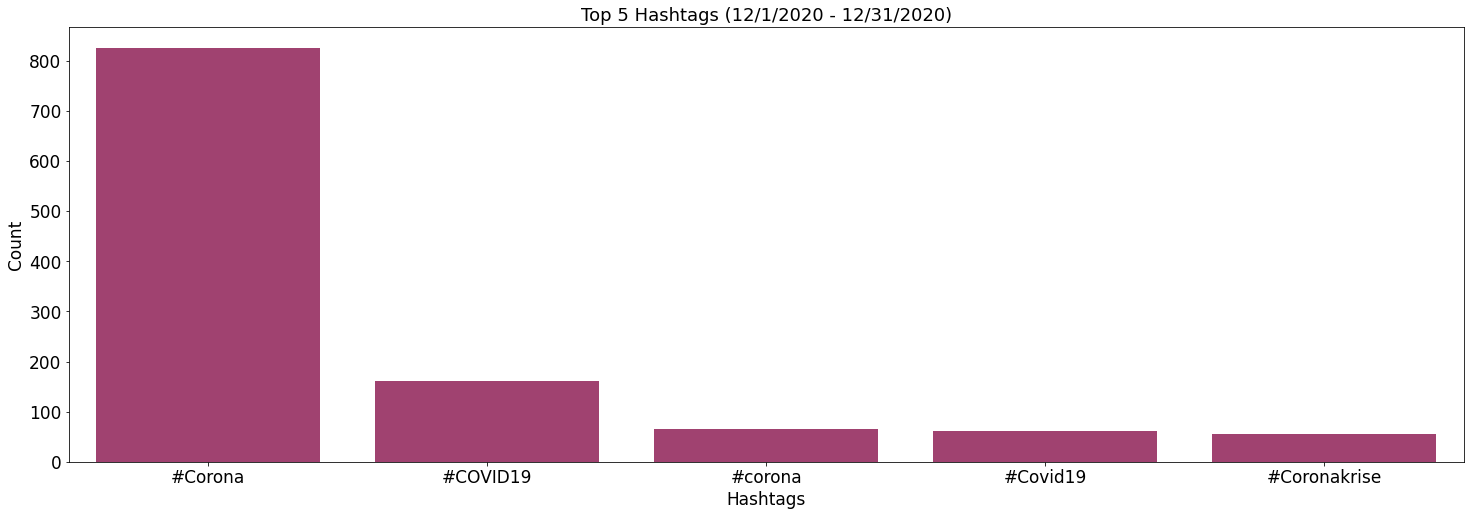

In [38]:
# Just Hashtags with Corona or Covid - Top 5 throughout the year
import re

df_copy = df.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_hashtag_regex = df_hashtags_per_month.loc[df_hashtags_per_month['hashtag'].str.contains('corona|covid', regex=True, case=False)]
    df_top_hashtags = (df_hashtag_regex['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_top_hashtags)
    plot = get_plot(df_top_hashtags, dates)
    plt.show()

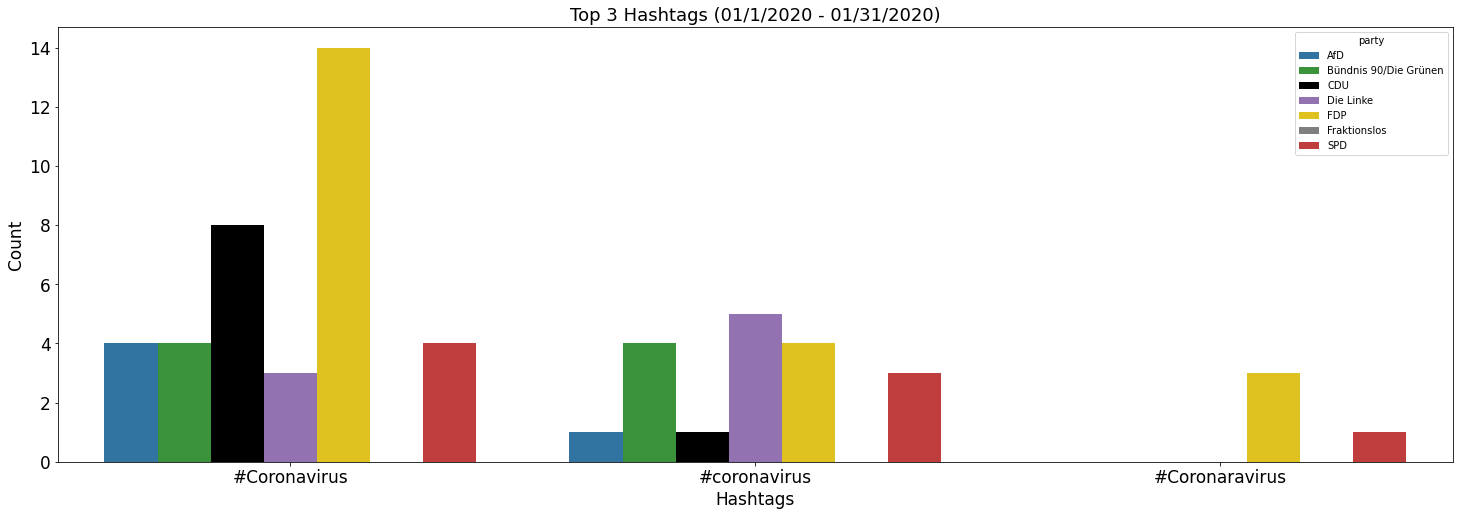

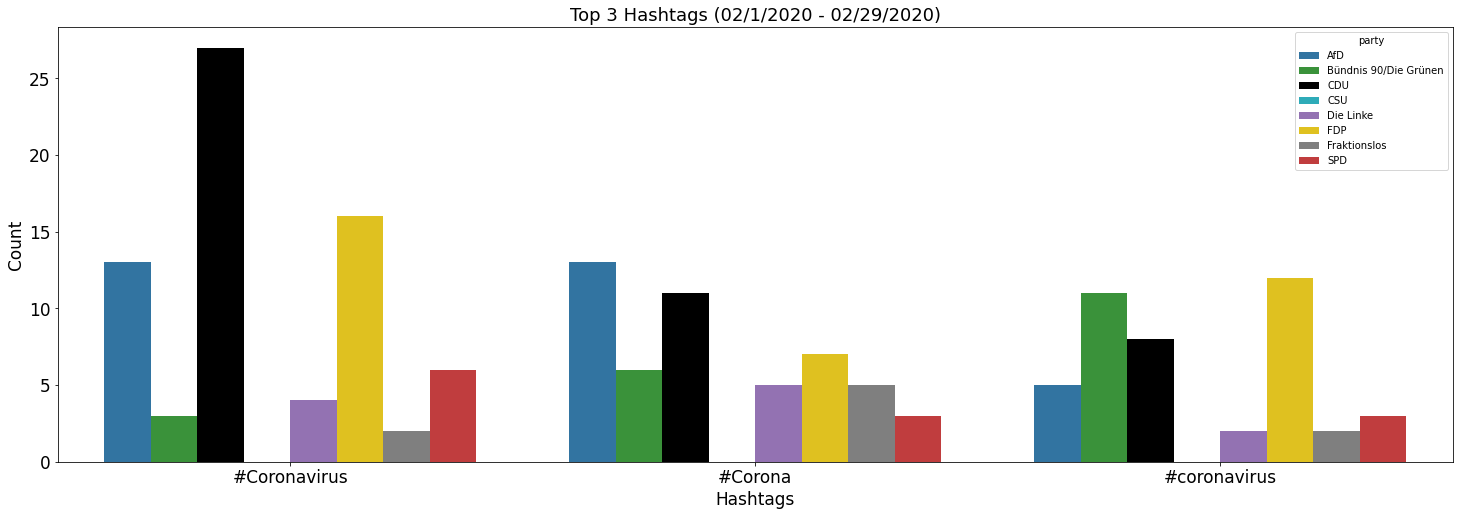

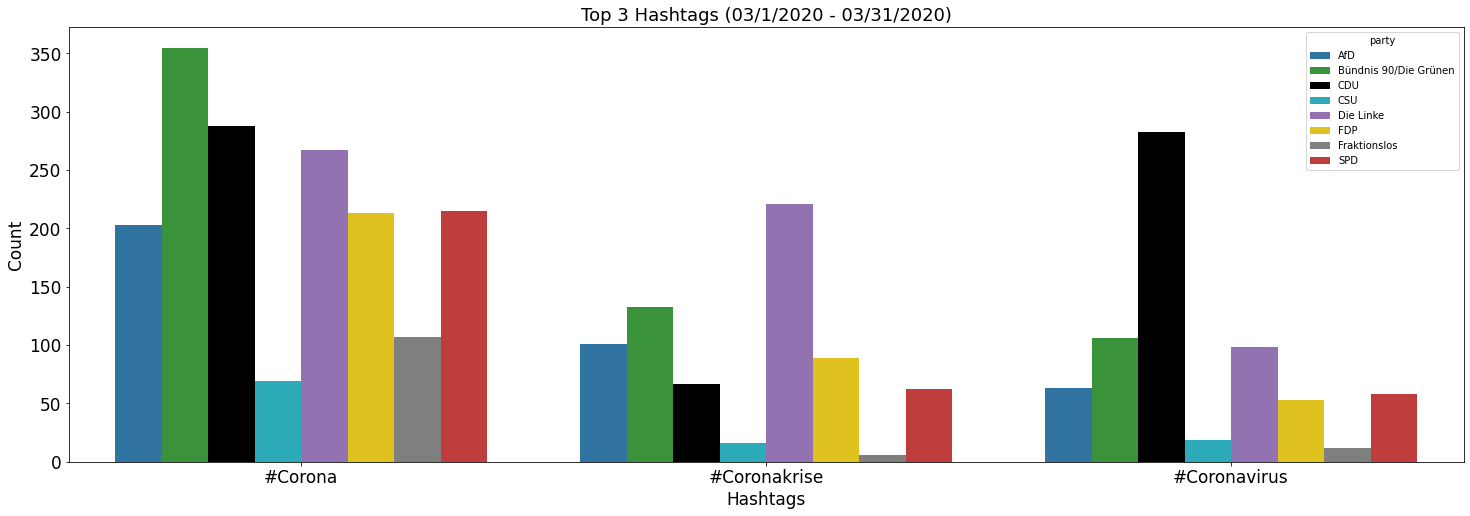

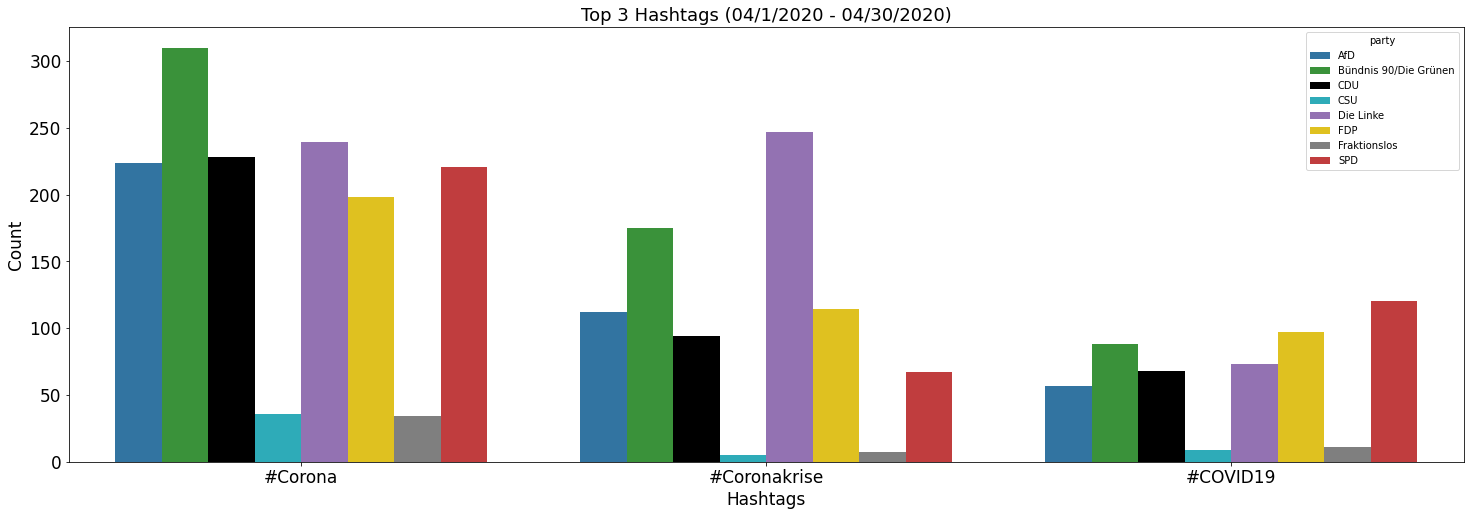

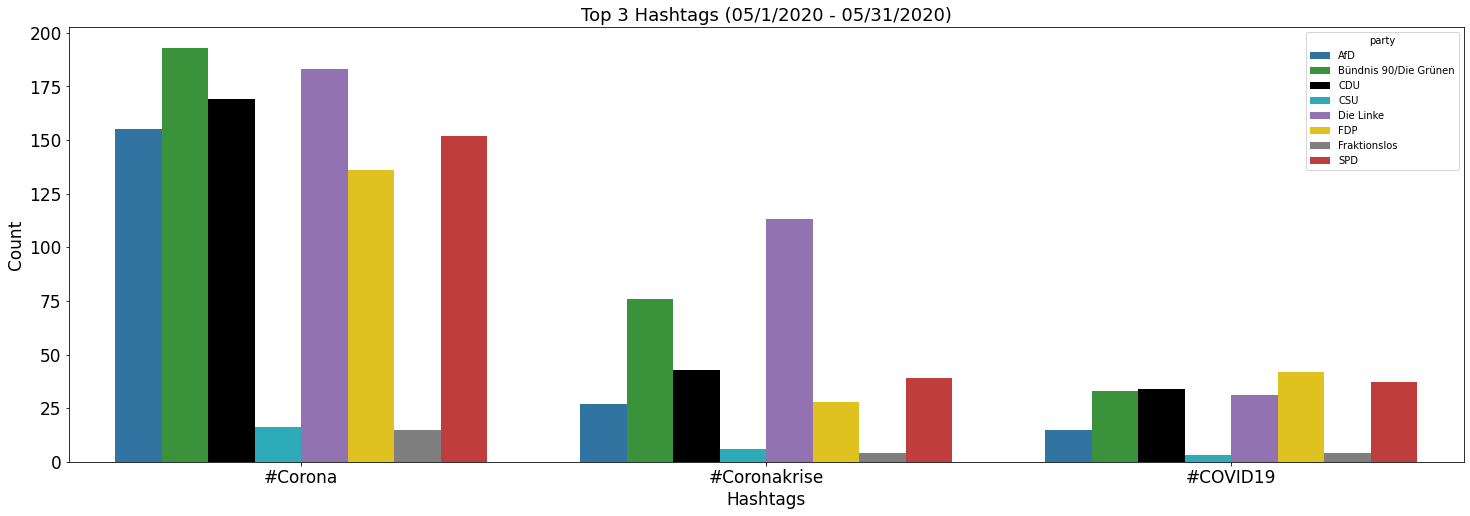

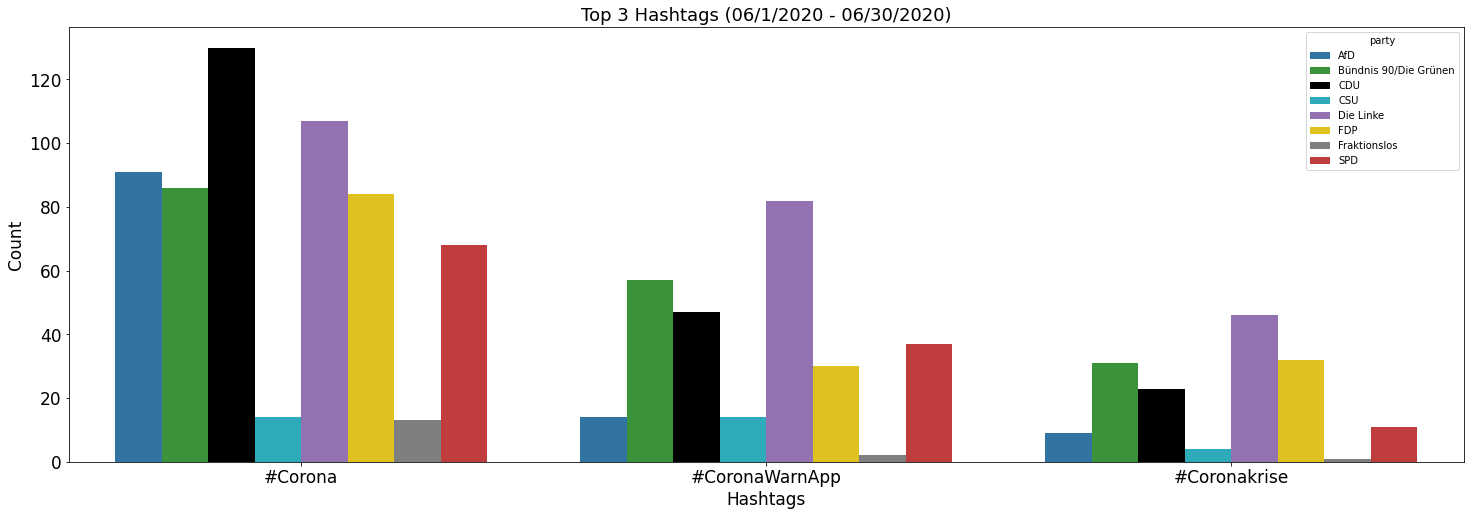

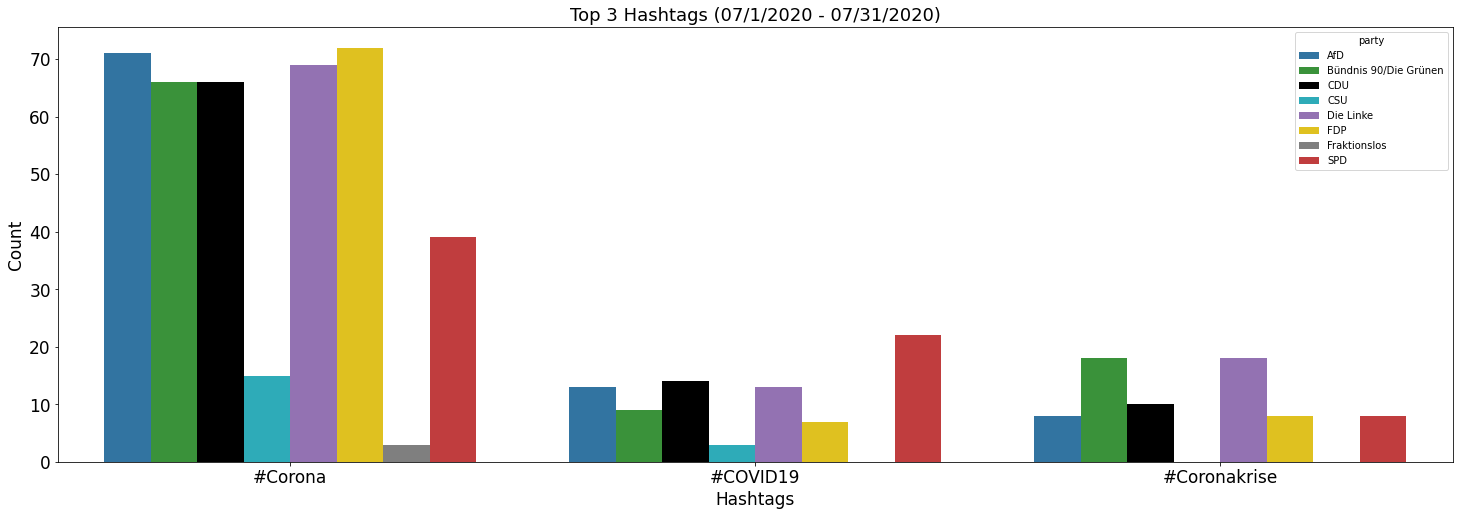

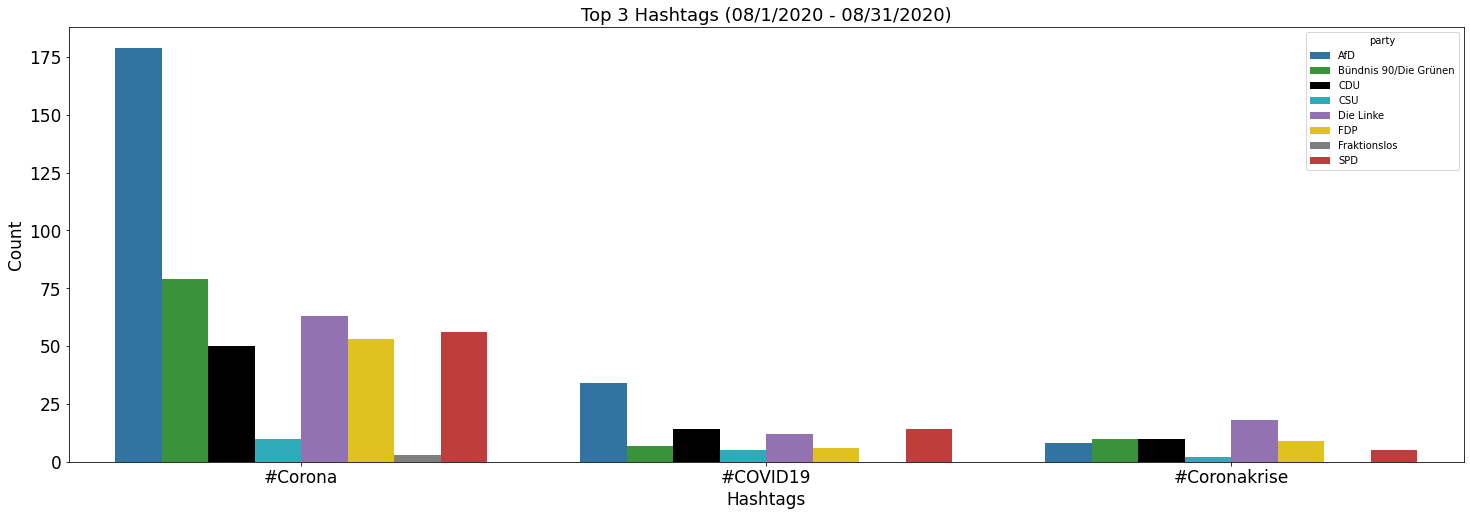

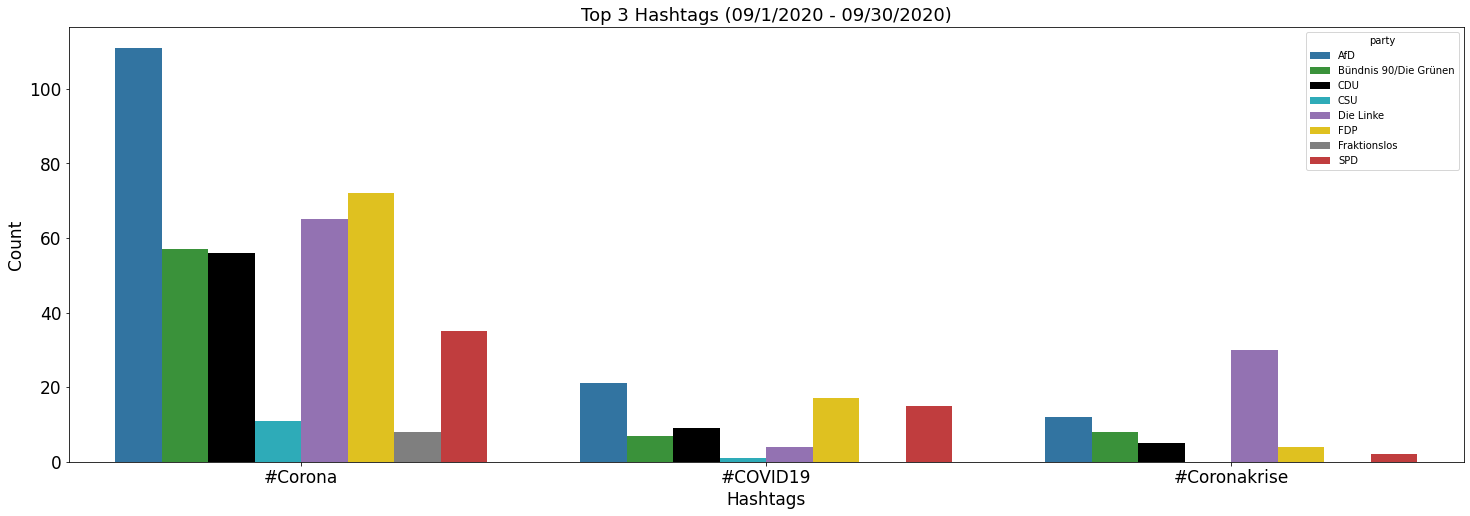

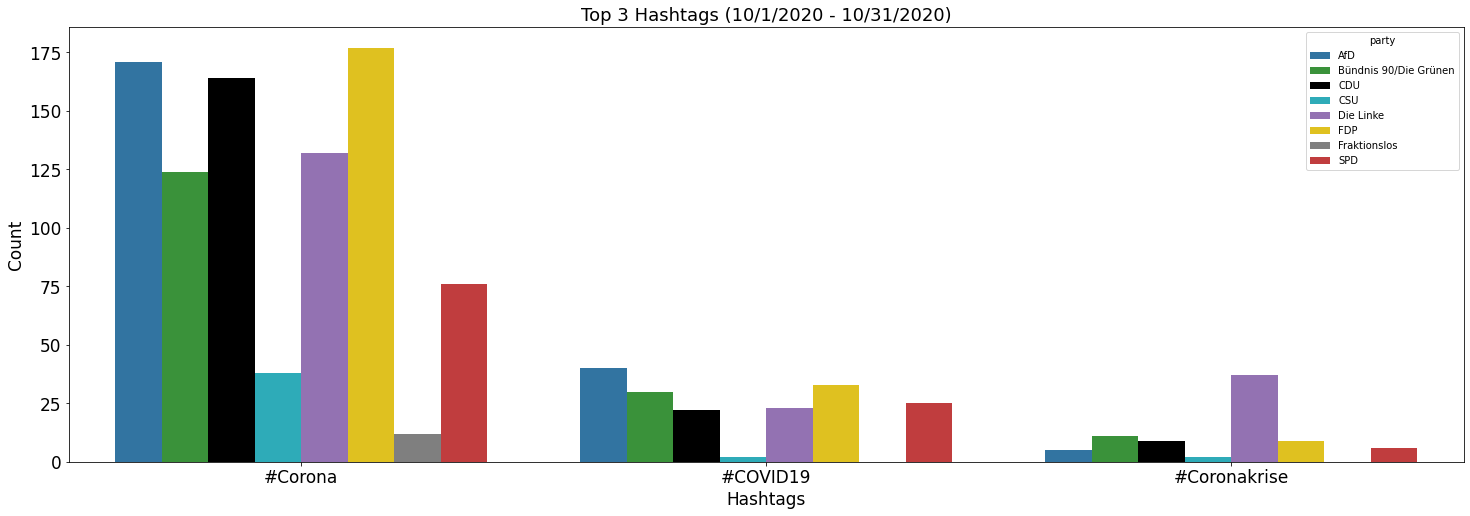

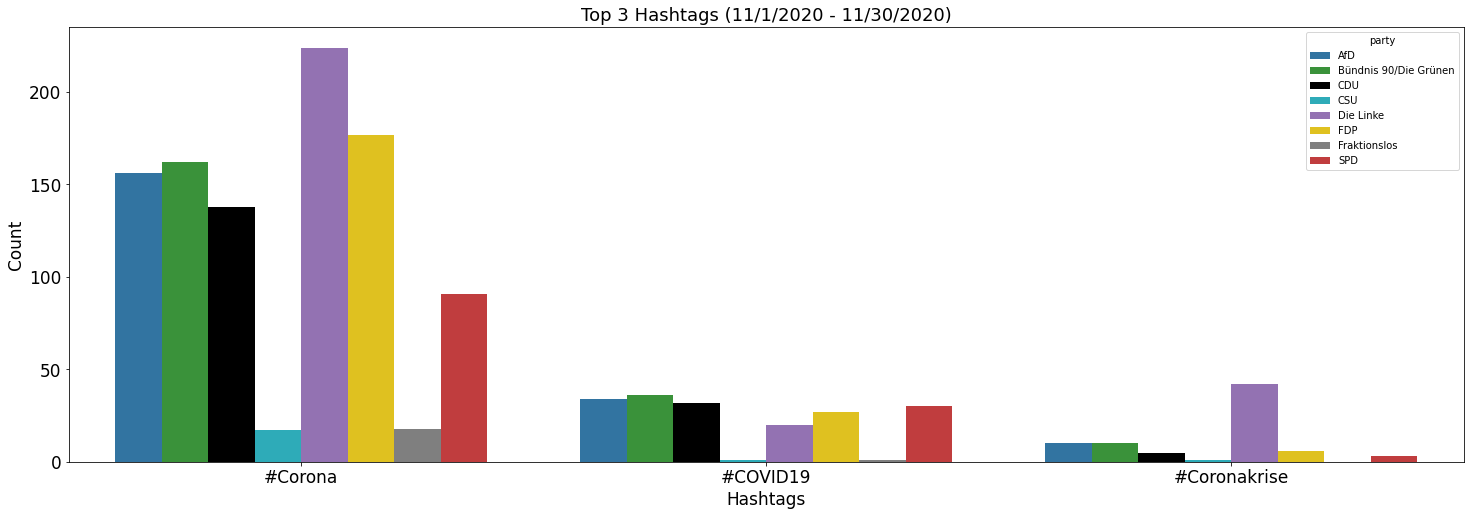

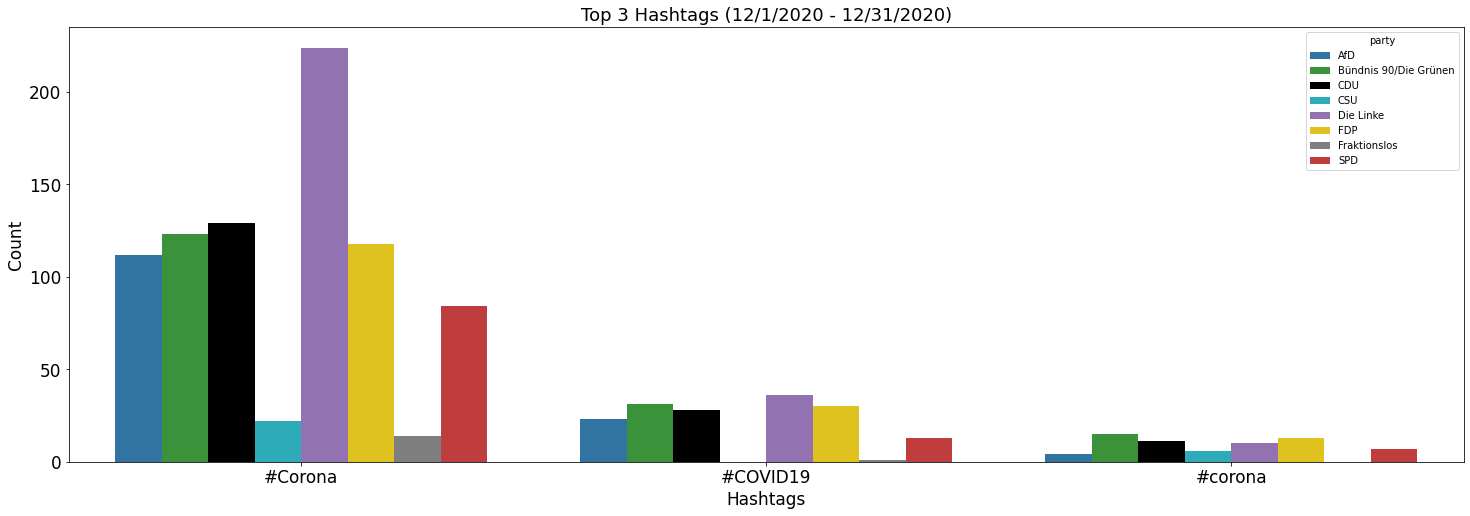

In [39]:
# Just Hashtags with Corona or Covid - Top Hashtags used by party throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'screen_name', 'name'], axis='columns')
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_hashtags_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_hashtag_regex = df_hashtags_per_month.loc[df_hashtags_per_month['hashtag'].str.contains('corona|covid', regex=True, case=False)]
    df_relevant_columns = df_hashtag_regex.drop('date', axis='columns')
    top_hashtags = ((df_relevant_columns['hashtag'].value_counts(sort=True, ascending=False)).head(number_of_hashtags_per_party)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['hashtag'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_hashtags = df_relevant_columns.filter(items=top_hashtags)
    df_top_hashtags = df_top_hashtags.rename_axis(None, axis=1)
    data_top_hashtags = df_top_hashtags.reset_index().melt(id_vars=['party'], value_vars=top_hashtags, var_name='hashtag', value_name='count')
    plot = get_plot_parties(data_top_hashtags, dates)
    plt.show()
